In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

### EDA ➱ IFIS JUNE 19 ↴

In [3]:
df = pd.read_csv(r'C:\Users\SamanthaBusunt\FoodFails\IFISS_june_2019.csv', encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / Reason for fail,Reason for fail-drop,Result/s - drop,Results,Units,Reference,Food Category
0,5/06/2019,Kashmiri chilli powder,India,Anna Aluminium Co Pvt Ltd,Salmonella,NaN,NaN,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails
1,11/06/2019,Frozen cooked prawns,Vietnam,Camau Seafood Processing & Service Jointstock ...,Standard plate count,NaN,NaN,"700 000, 10 000, 6 000, 110 000, 140 000",cfu/g,CRU 03/2019,Risk microbiological and allergen fails
2,13/06/2019,Chocolate halawa,Saudi Arabia,Qoot Food,Salmonella,NaN,NaN,Detected,/125g,SES 05/2014,Risk microbiological and allergen fails
3,17/06/2019,Frozen cooked vannamei prawns,Vietnam,Thalassa Seafoods (Vietnam),Standard plate count,NaN,NaN,"100 000, 110 000, 120 000, 340 000, 8 200",cfu/g,CRU 03/2019,Risk microbiological and allergen fails
4,14/06/2019,Marinara mix,Malaysia,Labuan Food Industries Sdn Bhd,Salmonella,NaN,NaN,Detected,/125g,MSM 11/2018,Risk microbiological and allergen fails
5,16/05/2019,Frozen cooked vannamei prawn meat,China,Zhejiang Ocean Family Co Ltd,Standard plate count,NaN,NaN,"240 000, 360 000, 270 000, 240 000, 630 000",cfu/g,CRU 03/2019,Risk microbiological and allergen fails
6,27/06/2019,Tahini halawah,Syria,Al Asala Foodstuff Co,Salmonella,NaN,NaN,Detected,/125g,SES 05/2014,Risk microbiological and allergen fails
7,25/06/2019,Kashmiri chilli powder,India,Patidar Exports Pvt Limited,Salmonella,NaN,NaN,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails
8,27/06/2019,Tahini halawah,Syria,Al Asala Foodstuff Co,Salmonella,NaN,NaN,Detected,/125g,SES 05/2014,Risk microbiological and allergen fails
9,25/06/2019,Kashmiri chilli powder,India,Patidar Exports Pvt Limited,Salmonella,NaN,NaN,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails


In [4]:
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

(34, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    34 non-null     object
 1   Product description             34 non-null     object
 2   Country of origin               34 non-null     object
 3   Producer name                   34 non-null     object
 4   Test applied / Reason for fail  34 non-null     object
 5   Reason for fail-drop            18 non-null     object
 6   Result/s - drop                 18 non-null     object
 7   Results                         34 non-null     object
 8   Units                           28 non-null     object
 9   Reference                       34 non-null     object
 10  Food Category                   34 non-null     object
dtypes: object(11)
memory usage: 3.0+ KB
None


Date of fail                      object
Product descripti

In [6]:
description = df.describe()
description_table = pd.DataFrame(description)
print(description_table)

       Date of fail     Product description Country of origin   Producer name  \
count            34                      34                34              34   
unique           18                      30                15              27   
top      13/06/2019  Kashmiri chilli powder             India  Ays Mfg Co Ltd   
freq              4                       3                 9               2   

       Test applied / Reason for fail                Reason for fail-drop  \
count                              34                                  18   
unique                             22                                   2   
top                        Salmonella  Fruit and vegetable residue screen   
freq                                7                                  12   

       Result/s - drop   Results  Units  Reference  \
count               18        34     28         34   
unique              16        22      3         12   
top       Chlorpyrifos  Detected  mg/kg  FSC 1

In [7]:
df = df.drop('Reason for fail-drop', axis=1)
df = df.drop('Result/s - drop', axis=1)

In [8]:
columns = df.columns.tolist()
print(columns)
print('\n')
# missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
df.head()

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / Reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


Date of fail - 0%
Product description - 0%
Country of origin - 0%
Producer name - 0%
Test applied / Reason for fail - 0%
Results - 0%
Units - 18%
Reference - 0%
Food Category - 0%


,Date of fail,Product description,Country of origin,Producer name,Test applied / Reason for fail,Results,Units,Reference,Food Category
0,5/06/2019,Kashmiri chilli powder,India,Anna Aluminium Co Pvt Ltd,Salmonella,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails
1,11/06/2019,Frozen cooked prawns,Vietnam,Camau Seafood Processing & Service Jointstock ...,Standard plate count,"700 000, 10 000, 6 000, 110 000, 140 000",cfu/g,CRU 03/2019,Risk microbiological and allergen fails
2,13/06/2019,Chocolate halawa,Saudi Arabia,Qoot Food,Salmonella,Detected,/125g,SES 05/2014,Risk microbiological and allergen fails
3,17/06/2019,Frozen cooked vannamei prawns,Vietnam,Thalassa Seafoods (Vietnam),Standard plate count,"100 000, 110 000, 120 000, 340 000, 8 200",cfu/g,CRU 03/2019,Risk microbiological and allergen fails
4,14/06/2019,Marinara mix,Malaysia,Labuan Food Industries Sdn Bhd,Salmonella,Detected,/125g,MSM 11/2018,Risk microbiological and allergen fails


In [ ]:
#selected_columns = df.columns[:40]
#color_palette = ['#5d916e', '#9e8064']  # green for not missing, brown for missing
#fig, ax = plt.subplots()
#sns.heatmap(df[selected_columns].isnull(), cmap=sns.color_palette(color_palette), ax=ax)

In [9]:
df.duplicated().sum()

2

In [63]:
def find_and_locate_duplicates(df):
    d1 = df.duplicated().sum()
    print(f"Before cleaning, there are {d1} duplicate(s).")
    duplicates = df[df.duplicated(keep=False)]
    df.drop_duplicates(keep='first', inplace=True)
    d2 = df.duplicated().sum()
    print(f"\nAfter cleaning, there are {d2} duplicate(s) remaining. \n")
    return duplicates

In [12]:
result = find_and_locate_duplicates(df)
print(result)

Before cleaning, there are 2 duplicate(s).

After cleaning, there are 0 duplicate(s) remaining. 

  Date of fail     Product description Country of origin  \
6   27/06/2019          Tahini halawah             Syria   
7   25/06/2019  Kashmiri chilli powder             India   
8   27/06/2019          Tahini halawah             Syria   
9   25/06/2019  Kashmiri chilli powder             India   

                 Producer name Test applied / Reason for fail   Results  \
6        Al Asala Foodstuff Co                     Salmonella  Detected   
7  Patidar Exports Pvt Limited                     Salmonella  Detected   
8        Al Asala Foodstuff Co                     Salmonella  Detected   
9  Patidar Exports Pvt Limited                     Salmonella  Detected   

   Units    Reference                            Food Category  
6  /125g  SES 05/2014  Risk microbiological and allergen fails  
7  /125g  SPI 06/2019  Risk microbiological and allergen fails  
8  /125g  SES 05/2014  Risk mi

In [13]:
df.duplicated().sum()

0

In [64]:
def num_values_to_float_n_info(df, column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    #df[column_name].replace(np.nan,'0',inplace = True)
    null_count = df[column_name].isnull().sum()
    print("Null Value:", null_count)
    
    plt.figure(figsize=(10, 6))
    plt.hist(df[column_name].dropna(), bins=10, color='skyblue', edgecolor='black')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column_name)
    plt.show()
    
    plt.figure(figsize=(8, 6))
    df.boxplot(column=column_name)
    plt.ylabel(column_name)
    plt.title('Boxplot of ' + column_name)
    plt.show()
    
    return df

count           32
unique          22
top       Detected
freq             5
Name: Results, dtype: object
Null Value: 21


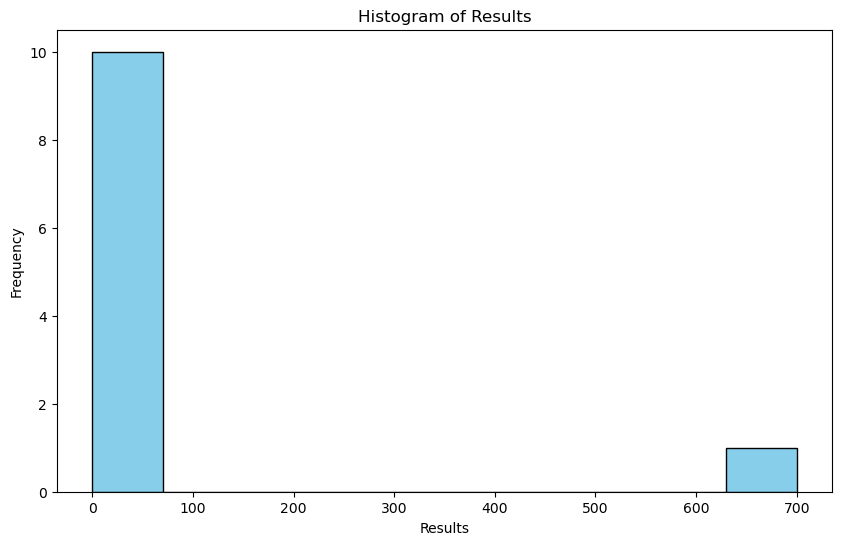

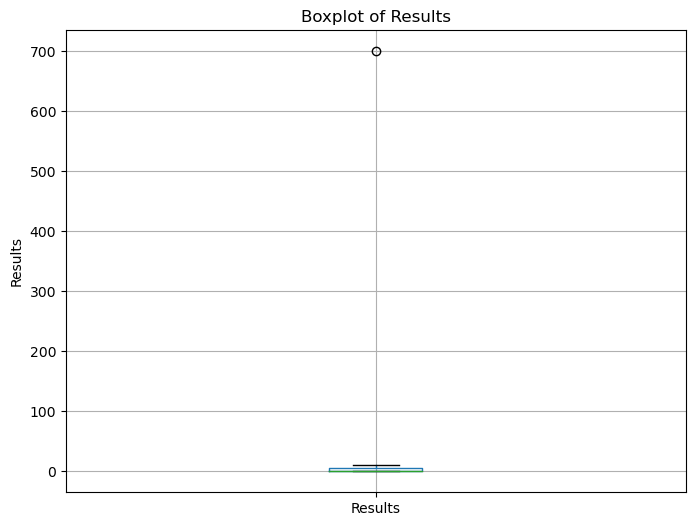

In [15]:
res = df['Results'].describe()
#res_table = pd.DataFrame(description)
print(res)
df = num_values_to_float_n_info(df, 'Results')

In [16]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / Reason for fail,Results,Units,Reference,Food Category
0,5/06/2019,Kashmiri chilli powder,India,Anna Aluminium Co Pvt Ltd,Salmonella,NaN,/125g,SPI 06/2019,Risk microbiological and allergen fails
1,11/06/2019,Frozen cooked prawns,Vietnam,Camau Seafood Processing & Service Jointstock ...,Standard plate count,NaN,cfu/g,CRU 03/2019,Risk microbiological and allergen fails
2,13/06/2019,Chocolate halawa,Saudi Arabia,Qoot Food,Salmonella,NaN,/125g,SES 05/2014,Risk microbiological and allergen fails
3,17/06/2019,Frozen cooked vannamei prawns,Vietnam,Thalassa Seafoods (Vietnam),Standard plate count,NaN,cfu/g,CRU 03/2019,Risk microbiological and allergen fails
4,14/06/2019,Marinara mix,Malaysia,Labuan Food Industries Sdn Bhd,Salmonella,NaN,/125g,MSM 11/2018,Risk microbiological and allergen fails
5,16/05/2019,Frozen cooked vannamei prawn meat,China,Zhejiang Ocean Family Co Ltd,Standard plate count,NaN,cfu/g,CRU 03/2019,Risk microbiological and allergen fails
6,27/06/2019,Tahini halawah,Syria,Al Asala Foodstuff Co,Salmonella,NaN,/125g,SES 05/2014,Risk microbiological and allergen fails
7,25/06/2019,Kashmiri chilli powder,India,Patidar Exports Pvt Limited,Salmonella,NaN,/125g,SPI 06/2019,Risk microbiological and allergen fails
10,6/06/2019,Cassava chips,India,Economic Food Solutions Pvt Ltd,Hydrocyanic acid,11.000,mg/kg,CAS 09/2016,Risk chemical/contaminant/ toxin test results
11,13/06/2019,Dried fish keeramin,Sri Lanka,D&R Exports Pvt Ltd,Histamine,700.000,mg/kg,HIS 12/2016,Risk chemical/contaminant/ toxin test results


In [17]:
df.to_csv('IFIS_19_june.csv') #importing as csv here. changing the order of date (from month/year to YY/MM for organisation purpose)

### EDA ➱ IFIS JULY 19 ↴


In [24]:
df = pd.read_csv(r'C:\Users\SamanthaBusunt\FoodFails\IFIS_july_2019.csv', encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / Reason for fail,Reason for fail - drop,Result/s - drop,Results,Units,Reference,Food Category
0,4/07/2019,Pasteurised cooked crab meat,Vietnam,Phillips Seafood (Vietnam) Co Ltd,Standard plate count,NaN,NaN,"<100, 3 500, <100, \n1 600 000, ~100\n",cfu/g,CRU 03/2019,Risk microbiological and allergen fails
1,4/07/2019,Pata de mulo cheese,Spain,Fco Javier Barrera Alvarez Lacteos Siete Lobas...,Listeria monocytogenes,NaN,NaN,"<100, <100, 100, 300, 500",cfu/g,CHE 07/2018,Risk microbiological and allergen fails
2,18/07/2019,Crushed chilli,Turkey,Narin Bys Dis Ticaret,Salmonella,NaN,NaN,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails
3,25/07/2019,Gialloblu erborinato cheese,Italy,Mantegazza Formaggi,Listeria monocytogenes,NaN,NaN,Detected,/125g,CHE 07/2018,Risk microbiological and allergen fails
4,29/07/2019,Frozen raw whole white clam shells,Vietnam,Ngoc Ha Co Ltd Food Processing And Trading,E. coli,NaN,NaN,"<2.3, <2.3, 15, <2.3, <2.3",MPN/g,MOL 04/2017,Risk microbiological and allergen fails
5,27/07/2019,Frozen scallops,Japan,Jyojirushi Douwasyokuhin Co Ltd,Listeria monocytogenes,NaN,NaN,"ND, ND, ND, ND, Detected",/125g,MOL 04/2017,Risk microbiological and allergen fails
6,2/07/2019,Dried fish tuyo in olive oil,Philippines,Zaragoza Foods Corp,Histamine,NaN,NaN,370,mg/kg,HIS 12/2016,Risk chemical/contaminant/ toxin test results
7,3/07/2019,Tapioca chips,India,Gowri Exports & Imports,Hydrocyanic acid,NaN,NaN,12,mg/kg,CAS 09/2016,Risk chemical/contaminant/ toxin test results
8,8/07/2019,Cassava chips,Indonesia,"Arira Pangindo (Bogor, Indonesia)",Hydrocyanic acid,NaN,NaN,11,mg/kg,CAS 09/2016,Risk chemical/contaminant/ toxin test results
9,9/07/2019,Roasted peanuts,China,Qingdao Zest Foods Co Ltd,Aflatoxin,NaN,NaN,0.044,mg/kg,NUT 11/208,Risk chemical/contaminant/ toxin test results


In [25]:
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

(46, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    46 non-null     object
 1   Product description             46 non-null     object
 2   Country of origin               46 non-null     object
 3   Producer name                   46 non-null     object
 4   Test applied / Reason for fail  46 non-null     object
 5   Reason for fail - drop          29 non-null     object
 6   Result/s - drop                 29 non-null     object
 7   Results                         46 non-null     object
 8   Units                           34 non-null     object
 9   Reference                       46 non-null     object
 10  Food Category                   46 non-null     object
dtypes: object(11)
memory usage: 4.1+ KB
None


Date of fail                      object
Product descripti

In [26]:
df = df.drop('Reason for fail - drop', axis=1)
df = df.drop('Result/s - drop', axis=1)

In [27]:
columns = df.columns.tolist()
print(columns)
print('\n')
# missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
df.head()

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / Reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


Date of fail - 0%
Product description - 0%
Country of origin - 0%
Producer name - 0%
Test applied / Reason for fail - 0%
Results - 0%
Units - 26%
Reference - 0%
Food Category - 0%


,Date of fail,Product description,Country of origin,Producer name,Test applied / Reason for fail,Results,Units,Reference,Food Category
0,4/07/2019,Pasteurised cooked crab meat,Vietnam,Phillips Seafood (Vietnam) Co Ltd,Standard plate count,"<100, 3 500, <100, \n1 600 000, ~100\n",cfu/g,CRU 03/2019,Risk microbiological and allergen fails
1,4/07/2019,Pata de mulo cheese,Spain,Fco Javier Barrera Alvarez Lacteos Siete Lobas...,Listeria monocytogenes,"<100, <100, 100, 300, 500",cfu/g,CHE 07/2018,Risk microbiological and allergen fails
2,18/07/2019,Crushed chilli,Turkey,Narin Bys Dis Ticaret,Salmonella,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails
3,25/07/2019,Gialloblu erborinato cheese,Italy,Mantegazza Formaggi,Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk microbiological and allergen fails
4,29/07/2019,Frozen raw whole white clam shells,Vietnam,Ngoc Ha Co Ltd Food Processing And Trading,E. coli,"<2.3, <2.3, 15, <2.3, <2.3",MPN/g,MOL 04/2017,Risk microbiological and allergen fails


In [28]:
df.duplicated().sum()

0

count     23.000000
mean      33.018091
std       94.936281
min        0.003100
25%        0.060000
50%        0.087000
75%       11.500000
max      370.000000
Name: Results, dtype: float64
Null Value: 23


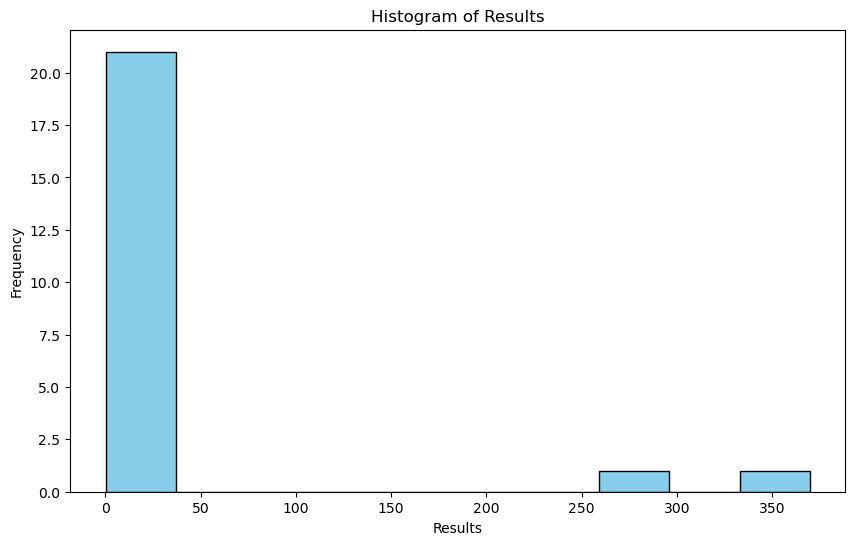

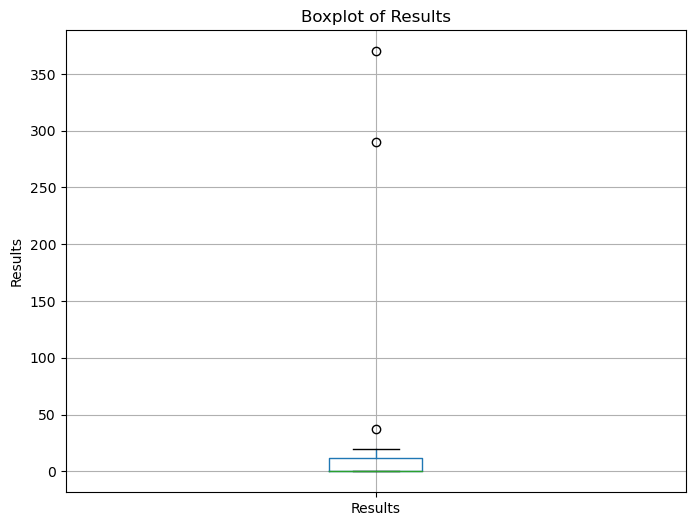

Date of fail                       object
Product description                object
Country of origin                  object
Producer name                      object
Test applied / Reason for fail     object
Results                           float64
Units                              object
Reference                          object
Food Category                      object
dtype: object


In [35]:
res = df['Results'].describe()
print(res)
df = num_values_to_float_n_info(df, 'Results')
print(df.dtypes)

In [36]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / Reason for fail,Results,Units,Reference,Food Category
0,4/07/2019,Pasteurised cooked crab meat,Vietnam,Phillips Seafood (Vietnam) Co Ltd,Standard plate count,NaN,cfu/g,CRU 03/2019,Risk microbiological and allergen fails
1,4/07/2019,Pata de mulo cheese,Spain,Fco Javier Barrera Alvarez Lacteos Siete Lobas...,Listeria monocytogenes,NaN,cfu/g,CHE 07/2018,Risk microbiological and allergen fails
2,18/07/2019,Crushed chilli,Turkey,Narin Bys Dis Ticaret,Salmonella,NaN,/125g,SPI 06/2019,Risk microbiological and allergen fails
3,25/07/2019,Gialloblu erborinato cheese,Italy,Mantegazza Formaggi,Listeria monocytogenes,NaN,/125g,CHE 07/2018,Risk microbiological and allergen fails
4,29/07/2019,Frozen raw whole white clam shells,Vietnam,Ngoc Ha Co Ltd Food Processing And Trading,E. coli,NaN,MPN/g,MOL 04/2017,Risk microbiological and allergen fails
5,27/07/2019,Frozen scallops,Japan,Jyojirushi Douwasyokuhin Co Ltd,Listeria monocytogenes,NaN,/125g,MOL 04/2017,Risk microbiological and allergen fails
6,2/07/2019,Dried fish tuyo in olive oil,Philippines,Zaragoza Foods Corp,Histamine,370.0000,mg/kg,HIS 12/2016,Risk chemical/contaminant/ toxin test results
7,3/07/2019,Tapioca chips,India,Gowri Exports & Imports,Hydrocyanic acid,12.0000,mg/kg,CAS 09/2016,Risk chemical/contaminant/ toxin test results
8,8/07/2019,Cassava chips,Indonesia,"Arira Pangindo (Bogor, Indonesia)",Hydrocyanic acid,11.0000,mg/kg,CAS 09/2016,Risk chemical/contaminant/ toxin test results
9,9/07/2019,Roasted peanuts,China,Qingdao Zest Foods Co Ltd,Aflatoxin,0.0440,mg/kg,NUT 11/208,Risk chemical/contaminant/ toxin test results


In [37]:
df.to_csv('IFIS_19_july.csv') 

### EDA ➱ IFIS AUGUST 19 ↴


In [46]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_august_2019.csv", encoding='latin-1')
df


,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Reason for fail - drop,Result/s drop,Results,Units,Reference,Holding order number,Food Category
0,1/08/2019,Frozen cooked whole craw fish,China,"Zhejiang Tianhe Aquatic Products Inc., Ltd",Standard plate count,NaN,NaN,"630 000, 600 000, 4 000 000, 300 000, 28 000 000",cfu/g,CRU 03/2019\n\n,NaN,Risk microbiological and allergen fails
1,5/08/2019,Chilli powder,India,Kottackal Agro Foods,Salmonella,NaN,NaN,Detected,/125g,SPI 06/2019,NaN,Risk microbiological and allergen fails
2,6/08/2019,Diced mozzarella cheese,Italy,Europomella Spa (It 12/009 Ce),Listeria monocytogenes,NaN,NaN,Detected,/125g,CHE 07/2018,NaN,Risk microbiological and allergen fails
3,22/08/2019,Chilli powder,India,Spectrum International,Salmonella,NaN,NaN,Detected,/125g,SPI 06/2019,NaN,Risk microbiological and allergen fails
4,23/08/2019,Tahini,Pakistan,Tat Pakistan Sesame Mills,Salmonella,NaN,NaN,Detected,/125g,SES 05/2014,NaN,Risk microbiological and allergen fails
5,30/08/2019,Halawah with pistachio,Syria,Al Asala Foodstuff Co,Listeria monocytogenes,NaN,NaN,Detected,/125g,SES 05/2014,NaN,Risk microbiological and allergen fails
6,5/08/2019,Spiced peanuts,India,Raghuvanshi Exports,Aflatoxin,NaN,NaN,0.214,mg/kg,NUT 11/208,NaN,Risk chemical/contaminant/ toxin test results
7,14/08/2019,Dried herring,Philippines,Kaelen Phils Inc,Histamine,NaN,NaN,360,mg/kg,HIS 12/2016,NaN,Risk chemical/contaminant/ toxin test results
8,12/08/2019,Kelp slices,China,Fuzhou Hailin Food Co Ltd,Iodine,NaN,NaN,3900,mg/kg,BSW 12/2016,NaN,Risk chemical/contaminant/ toxin test results
9,12/08/2019,Kelp shreds,China,Fuzhou Hailin Food Co Ltd,Iodine,NaN,NaN,3300,mg/kg,BSW 12/2016,NaN,Risk chemical/contaminant/ toxin test results


In [47]:
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

(28, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    28 non-null     object
 1   Product description             28 non-null     object
 2   Country of origin               28 non-null     object
 3   Producer name                   28 non-null     object
 4   Test applied / reason for fail  28 non-null     object
 5   Reason for fail - drop          14 non-null     object
 6   Result/s drop                   14 non-null     object
 7   Results                         28 non-null     object
 8   Units                           21 non-null     object
 9   Reference                       28 non-null     object
 10  Holding order number            14 non-null     object
 11  Food Category                   28 non-null     object
dtypes: object(12)
memory usage: 2.8+ KB
None


In [48]:
df = df.drop('Reason for fail - drop', axis=1)
df = df.drop('Result/s drop', axis=1)

In [41]:
columns = df.columns.tolist()
print(columns)
print('\n')
# missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
df.head()

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Holding order number', 'Food Category']


Date of fail - 0%
Product description - 0%
Country of origin - 0%
Producer name - 0%
Test applied / reason for fail - 0%
Results - 11%
Units - 14%
Reference - 0%
Holding order number - 50%
Food Category - 0%


,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,1/08/2019,Frozen cooked whole craw fish,China,"Zhejiang Tianhe Aquatic Products Inc., Ltd",Standard plate count,"630 000, 600 000, 4 000 000, 300 000, 28 000 000",cfu/g,CRU 03/2019\n\n,NaN,Risk microbiological and allergen fails
1,5/08/2019,Chilli powder,India,Kottackal Agro Foods,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk microbiological and allergen fails
2,6/08/2019,Diced mozzarella cheese,Italy,Europomella Spa (It 12/009 Ce),Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk microbiological and allergen fails
3,22/08/2019,Chilli powder,India,Spectrum International,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk microbiological and allergen fails
4,23/08/2019,Tahini,Pakistan,Tat Pakistan Sesame Mills,Salmonella,Detected,/125g,SES 05/2014,NaN,Risk microbiological and allergen fails


In [49]:
df.duplicated().sum()

0

count                             28
unique                            19
top       Not permitted in this food
freq                               6
Name: Results, dtype: object
Null Value: 15


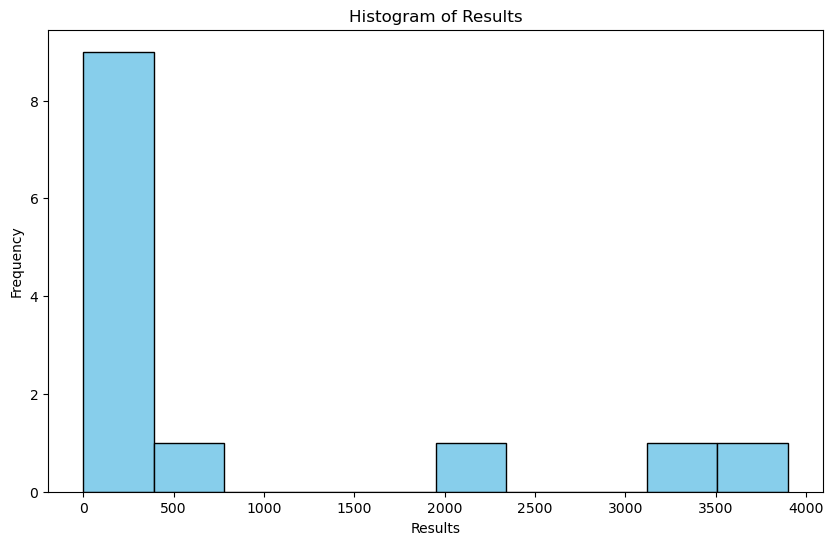

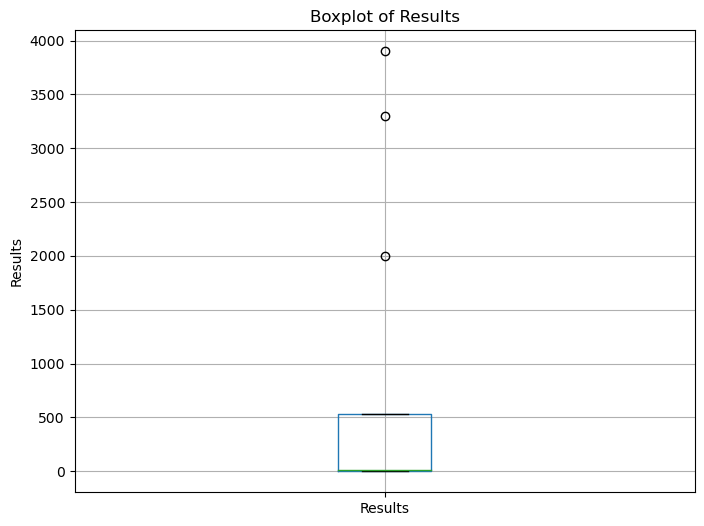

Date of fail                       object
Product description                object
Country of origin                  object
Producer name                      object
Test applied / reason for fail     object
Results                           float64
Units                              object
Reference                          object
Holding order number               object
Food Category                      object
dtype: object


In [51]:
res = df['Results'].describe()
print(res)
df = num_values_to_float_n_info(df, 'Results')
print(df.dtypes)

In [52]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,1/08/2019,Frozen cooked whole craw fish,China,"Zhejiang Tianhe Aquatic Products Inc., Ltd",Standard plate count,NaN,cfu/g,CRU 03/2019\n\n,NaN,Risk microbiological and allergen fails
1,5/08/2019,Chilli powder,India,Kottackal Agro Foods,Salmonella,NaN,/125g,SPI 06/2019,NaN,Risk microbiological and allergen fails
2,6/08/2019,Diced mozzarella cheese,Italy,Europomella Spa (It 12/009 Ce),Listeria monocytogenes,NaN,/125g,CHE 07/2018,NaN,Risk microbiological and allergen fails
3,22/08/2019,Chilli powder,India,Spectrum International,Salmonella,NaN,/125g,SPI 06/2019,NaN,Risk microbiological and allergen fails
4,23/08/2019,Tahini,Pakistan,Tat Pakistan Sesame Mills,Salmonella,NaN,/125g,SES 05/2014,NaN,Risk microbiological and allergen fails
5,30/08/2019,Halawah with pistachio,Syria,Al Asala Foodstuff Co,Listeria monocytogenes,NaN,/125g,SES 05/2014,NaN,Risk microbiological and allergen fails
6,5/08/2019,Spiced peanuts,India,Raghuvanshi Exports,Aflatoxin,0.214,mg/kg,NUT 11/208,NaN,Risk chemical/contaminant/ toxin test results
7,14/08/2019,Dried herring,Philippines,Kaelen Phils Inc,Histamine,360.000,mg/kg,HIS 12/2016,NaN,Risk chemical/contaminant/ toxin test results
8,12/08/2019,Kelp slices,China,Fuzhou Hailin Food Co Ltd,Iodine,3900.000,mg/kg,BSW 12/2016,NaN,Risk chemical/contaminant/ toxin test results
9,12/08/2019,Kelp shreds,China,Fuzhou Hailin Food Co Ltd,Iodine,3300.000,mg/kg,BSW 12/2016,NaN,Risk chemical/contaminant/ toxin test results


In [53]:
df.to_csv('IFIS_19_august.csv') 

### EDA ➱ IFIS SEPTEMBER 19 ↴

In [55]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_september_2019.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,Test applied - drop,dropp,Test applied / reason for fail,Result/s,Units,Reference,Holding order number,Food Category
0,3/09/2019,Extra hot chilli powder,India,Shah Exim Pvt Ltd,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk microbiological and allergen fails
1,16/09/2019,Frozen marinara mix,China,Shandong Tongxing Foodstuffs Co Ltd,NaN,NaN,E. coli,"<2.3, <2.3, 43.0, <2.3, <2.3",MPN/g,MSM 11/2018,NaN,Risk microbiological and allergen fails
2,16/09/2019,Frozen whole cooked brandy crawfish,China,Standard Plate Count,NaN,NaN,Standard plate count,"19000, 2100000, 22000, 26000, 27000",cfu/g,CRU 03/2019,NaN,Risk microbiological and allergen fails
3,2/09/2019,Cheese,Italy,Casa Madaio,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk microbiological and allergen fails
4,3/09/2019,Seasoned seaweed,Japan,Kurakon Foods Corporation,NaN,NaN,Iodine,3400,mg/kg,BSW 12/2016,NaN,Risk chemical/contaminant/ toxin test results
5,9/09/2019,Sardines in tomato sauce,China,Sunny Success International Ltd,NaN,NaN,Histamine,280,mg/kg,HIS 12/2016,NaN,Risk chemical/contaminant/ toxin test results
6,16/09/2019,Spicy gram flour coated peanuts,India,Sunshine Food Products,NaN,NaN,Aflatoxin,0.015,mg/kg,NUT 11/2018,NaN,Risk chemical/contaminant/ toxin test results
7,18/09/2019,Satay sauce,Indonesia,Pt Enak Jaya Makmur,NaN,NaN,Aflatoxin,0.025,mg/kg,NUT 11/2018,NaN,Risk chemical/contaminant/ toxin test results
8,16/09/2019,Dried thora fish,Sri Lanka,Damayanthi Ent & Exp (Sri Lanka),NaN,NaN,Histamine,210,mg/kg,HIS 12/2016,NaN,Risk chemical/contaminant/ toxin test results
9,29/08/2019,Kelp powder,China,Xi'an Pincredit Bio-Tech Co Ltd,NaN,NaN,Iodine,6660,mg/kg,BSW 12/2016,NaN,Risk chemical/contaminant/ toxin test results


In [56]:
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

(27, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    27 non-null     object
 1   Product description             27 non-null     object
 2   Country of origin               27 non-null     object
 3   Producer name                   27 non-null     object
 4   Test applied - drop             16 non-null     object
 5   dropp                           15 non-null     object
 6   Test applied / reason for fail  27 non-null     object
 7   Result/s                        24 non-null     object
 8   Units                           14 non-null     object
 9   Reference                       27 non-null     object
 10  Holding order number            16 non-null     object
 11  Food Category                   27 non-null     object
dtypes: object(12)
memory usage: 2.7+ KB
None


In [57]:
df = df.drop('Test applied - drop', axis=1)
df = df.drop('dropp', axis=1)

In [58]:
columns = df.columns.tolist()
print(columns)
print('\n')
# missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
df.head()

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Result/s', 'Units', 'Reference', 'Holding order number', 'Food Category']


Date of fail - 0%
Product description - 0%
Country of origin - 0%
Producer name - 0%
Test applied / reason for fail - 0%
Result/s - 11%
Units - 48%
Reference - 0%
Holding order number - 41%
Food Category - 0%


,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Result/s,Units,Reference,Holding order number,Food Category
0,3/09/2019,Extra hot chilli powder,India,Shah Exim Pvt Ltd,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk microbiological and allergen fails
1,16/09/2019,Frozen marinara mix,China,Shandong Tongxing Foodstuffs Co Ltd,E. coli,"<2.3, <2.3, 43.0, <2.3, <2.3",MPN/g,MSM 11/2018,NaN,Risk microbiological and allergen fails
2,16/09/2019,Frozen whole cooked brandy crawfish,China,Standard Plate Count,Standard plate count,"19000, 2100000, 22000, 26000, 27000",cfu/g,CRU 03/2019,NaN,Risk microbiological and allergen fails
3,2/09/2019,Cheese,Italy,Casa Madaio,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk microbiological and allergen fails
4,3/09/2019,Seasoned seaweed,Japan,Kurakon Foods Corporation,Iodine,3400,mg/kg,BSW 12/2016,NaN,Risk chemical/contaminant/ toxin test results


In [59]:
df.duplicated().sum()

0

In [66]:
df = df.rename(columns={'Result/s': 'Results'})

count       9.000000
mean     1172.271111
std      2336.400117
min         0.015000
25%         0.090000
50%         0.200000
75%       280.000000
max      6660.000000
Name: Results, dtype: float64
Null Value: 18


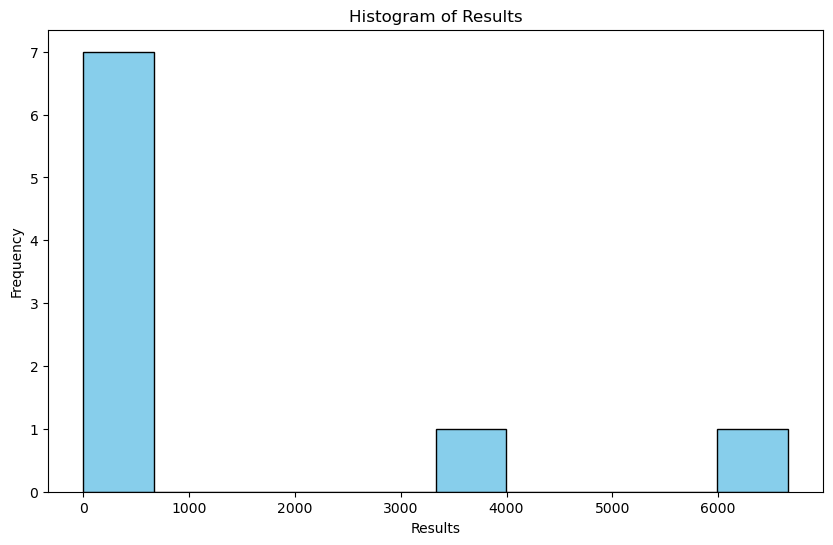

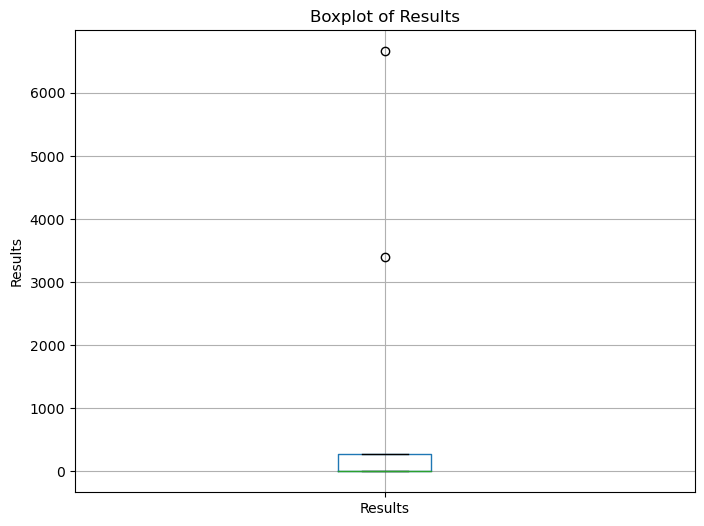

In [68]:
res = df['Results'].describe()
#res_table = pd.DataFrame(description)
print(res)
df = num_values_to_float_n_info(df, 'Results')

In [69]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,3/09/2019,Extra hot chilli powder,India,Shah Exim Pvt Ltd,Salmonella,NaN,/125g,SPI 06/2019,NaN,Risk microbiological and allergen fails
1,16/09/2019,Frozen marinara mix,China,Shandong Tongxing Foodstuffs Co Ltd,E. coli,NaN,MPN/g,MSM 11/2018,NaN,Risk microbiological and allergen fails
2,16/09/2019,Frozen whole cooked brandy crawfish,China,Standard Plate Count,Standard plate count,NaN,cfu/g,CRU 03/2019,NaN,Risk microbiological and allergen fails
3,2/09/2019,Cheese,Italy,Casa Madaio,Listeria monocytogenes,NaN,/125g,CHE 07/2018,NaN,Risk microbiological and allergen fails
4,3/09/2019,Seasoned seaweed,Japan,Kurakon Foods Corporation,Iodine,3400.000,mg/kg,BSW 12/2016,NaN,Risk chemical/contaminant/ toxin test results
5,9/09/2019,Sardines in tomato sauce,China,Sunny Success International Ltd,Histamine,280.000,mg/kg,HIS 12/2016,NaN,Risk chemical/contaminant/ toxin test results
6,16/09/2019,Spicy gram flour coated peanuts,India,Sunshine Food Products,Aflatoxin,0.015,mg/kg,NUT 11/2018,NaN,Risk chemical/contaminant/ toxin test results
7,18/09/2019,Satay sauce,Indonesia,Pt Enak Jaya Makmur,Aflatoxin,0.025,mg/kg,NUT 11/2018,NaN,Risk chemical/contaminant/ toxin test results
8,16/09/2019,Dried thora fish,Sri Lanka,Damayanthi Ent & Exp (Sri Lanka),Histamine,210.000,mg/kg,HIS 12/2016,NaN,Risk chemical/contaminant/ toxin test results
9,29/08/2019,Kelp powder,China,Xi'an Pincredit Bio-Tech Co Ltd,Iodine,6660.000,mg/kg,BSW 12/2016,NaN,Risk chemical/contaminant/ toxin test results


In [70]:
df.to_csv('IFIS_19_september.csv') 

### EDA ➱ IFIS OCTOBER 19 ↴

In [71]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_october_2019.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,9/10/2019,Petit Agour cheese,France,Agour Sasu,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk microbiological and allergen fails
1,11/10/2019,Cooked crawfish,China,Zhongyang Fishery (Shanghai),NaN,NaN,Standard plate count,"120 000, 230 000, \n90 000, 380 000, 280 000\n",/125g,CRU 03/2019,NaN,Risk microbiological and allergen fails
2,21/10/2019,Frozen cooked prawns,Vietnam,Bac Lieu Fisheries Joint Stock Company,NaN,NaN,Vibrio cholerae,Detected,/125g,CRU 03/2019,NaN,Risk microbiological and allergen fails
3,30/10/2019,Cooked ark shell meat,Republic of Korea,"Namdo Kkomak Co., Ltd",NaN,NaN,E. coli,"17, <2, 7, 8, 2",MPN/g,MOL 04/2017,NaN,Risk microbiological and allergen fails
4,31/10/2019,Dry mizithra cheese,Greece,Metsovo-Vlahotirokomikh Tsoutsoplides (Greece),NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk microbiological and allergen fails
5,31/10/2019,Frozen cooked prawns,Thailand,Top Product Food Co. Ltd,NaN,NaN,Standard plate count,"20 000, 5 200 000, \n5 800 000, 2 000, 110 000\n",cfu/g,CRU 03/2019,NaN,Risk microbiological and allergen fails
6,4/10/2019\n,Maldive fish chips,Sri Lanka,Leela Exorts & Imports (Sri Lanka),NaN,NaN,Histamine,210,mg/kg,HIS 12/2016\n\n,NaN,Risk chemical/contaminant/Composition/toxin te...
7,4/10/2019,Dried seaweed,Japan,Kurakon Foods Corporation,NaN,NaN,Iodine,3900,mg/kg,BSW 12/2016\n\n,NaN,Risk chemical/contaminant/Composition/toxin te...
8,8/10/2019,Fresh whole yellowfin tuna,Maldives,Cmf Fish Processing Factory,NaN,NaN,Histamine,309,mg/kg,HIS 12/2016\n\n,NaN,Risk chemical/contaminant/Composition/toxin te...
9,8/10/2019,Fresh whole yellowfin tuna,Maldives,Cmf Fish Processing Factory,NaN,NaN,Histamine,218,mg/kg,HIS 12/2016\n\n,NaN,Risk chemical/contaminant/Composition/toxin te...


In [72]:
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

(33, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    33 non-null     object
 1   Product description             33 non-null     object
 2   Country of origin               33 non-null     object
 3   Producer name                   33 non-null     object
 4   drop1                           13 non-null     object
 5   drop2                           13 non-null     object
 6   Test applied / reason for fail  33 non-null     object
 7   Results                         33 non-null     object
 8   Units                           32 non-null     object
 9   Reference                       33 non-null     object
 10  Holding order number            13 non-null     object
 11  Food Category                   33 non-null     object
dtypes: object(12)
memory usage: 3.2+ KB
None


In [73]:
df = df.drop('drop1', axis=1)
df = df.drop('drop2', axis=1)

In [74]:
columns = df.columns.tolist()
print(columns)
print('\n')
# missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
df.head()

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Holding order number', 'Food Category']


Date of fail - 0%
Product description - 0%
Country of origin - 0%
Producer name - 0%
Test applied / reason for fail - 0%
Results - 0%
Units - 3%
Reference - 0%
Holding order number - 61%
Food Category - 0%


,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,9/10/2019,Petit Agour cheese,France,Agour Sasu,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk microbiological and allergen fails
1,11/10/2019,Cooked crawfish,China,Zhongyang Fishery (Shanghai),Standard plate count,"120 000, 230 000, \n90 000, 380 000, 280 000\n",/125g,CRU 03/2019,NaN,Risk microbiological and allergen fails
2,21/10/2019,Frozen cooked prawns,Vietnam,Bac Lieu Fisheries Joint Stock Company,Vibrio cholerae,Detected,/125g,CRU 03/2019,NaN,Risk microbiological and allergen fails
3,30/10/2019,Cooked ark shell meat,Republic of Korea,"Namdo Kkomak Co., Ltd",E. coli,"17, <2, 7, 8, 2",MPN/g,MOL 04/2017,NaN,Risk microbiological and allergen fails
4,31/10/2019,Dry mizithra cheese,Greece,Metsovo-Vlahotirokomikh Tsoutsoplides (Greece),Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk microbiological and allergen fails


In [75]:
df.duplicated().sum()

0

count      23.000000
mean      371.789783
std       838.730414
min         0.022000
25%         0.080000
50%        24.000000
75%       308.500000
max      3900.000000
Name: Results, dtype: float64
Null Value: 10


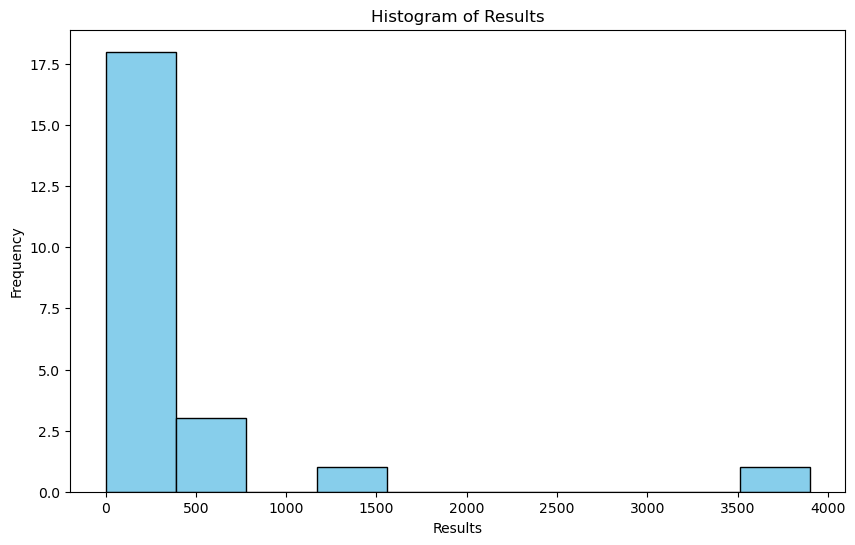

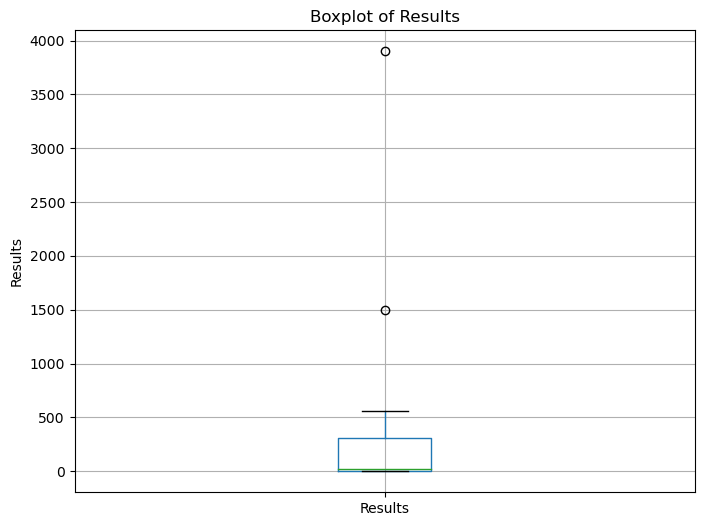

In [82]:
res = df['Results'].describe()
#res_table = pd.DataFrame(description)
print(res)
df = num_values_to_float_n_info(df, 'Results')

In [77]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,9/10/2019,Petit Agour cheese,France,Agour Sasu,Listeria monocytogenes,NaN,/125g,CHE 07/2018,NaN,Risk microbiological and allergen fails
1,11/10/2019,Cooked crawfish,China,Zhongyang Fishery (Shanghai),Standard plate count,NaN,/125g,CRU 03/2019,NaN,Risk microbiological and allergen fails
2,21/10/2019,Frozen cooked prawns,Vietnam,Bac Lieu Fisheries Joint Stock Company,Vibrio cholerae,NaN,/125g,CRU 03/2019,NaN,Risk microbiological and allergen fails
3,30/10/2019,Cooked ark shell meat,Republic of Korea,"Namdo Kkomak Co., Ltd",E. coli,NaN,MPN/g,MOL 04/2017,NaN,Risk microbiological and allergen fails
4,31/10/2019,Dry mizithra cheese,Greece,Metsovo-Vlahotirokomikh Tsoutsoplides (Greece),Listeria monocytogenes,NaN,/125g,CHE 07/2018,NaN,Risk microbiological and allergen fails
5,31/10/2019,Frozen cooked prawns,Thailand,Top Product Food Co. Ltd,Standard plate count,NaN,cfu/g,CRU 03/2019,NaN,Risk microbiological and allergen fails
6,4/10/2019\n,Maldive fish chips,Sri Lanka,Leela Exorts & Imports (Sri Lanka),Histamine,210.000,mg/kg,HIS 12/2016\n\n,NaN,Risk chemical/contaminant/Composition/toxin te...
7,4/10/2019,Dried seaweed,Japan,Kurakon Foods Corporation,Iodine,3900.000,mg/kg,BSW 12/2016\n\n,NaN,Risk chemical/contaminant/Composition/toxin te...
8,8/10/2019,Fresh whole yellowfin tuna,Maldives,Cmf Fish Processing Factory,Histamine,309.000,mg/kg,HIS 12/2016\n\n,NaN,Risk chemical/contaminant/Composition/toxin te...
9,8/10/2019,Fresh whole yellowfin tuna,Maldives,Cmf Fish Processing Factory,Histamine,218.000,mg/kg,HIS 12/2016\n\n,NaN,Risk chemical/contaminant/Composition/toxin te...


In [78]:
df.to_csv('IFIS_19_october.csv') 

### EDA ➱ IFIS NOVEMBER 19 ↴

In [83]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_november_2019.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,5/11/2019,Caprotto cheese,Italy,Casa Madaio Srl (It 15/061ce),NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
1,1/11/2019,Frozen roasted eel,China,Jiangxi Donghai Food Co Lyd,NaN,NaN,Listeria monocytogenes,Detected,/125g,FSH 07/2018,NaN,Risk food tests
2,4/11/2019,Frozen whole cooked lobster,Brazil,J3 Industria E Comercio De Pescados Ltda,NaN,NaN,Salmonella,Detected,/125g,CRU 03/2019,NaN,Risk food tests
3,20/11/2019,Taleggio DOP cheese,Italy,Carozzi Roberto & C.S.N.C I03/416cee (Lecco It...,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
4,22/11/2019,Ground red pepper,Nigeria,Oceanwaves Import and Export Ltd,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
5,28/11/2019,Frozen cooked vannamei prawns,China,Zhejiang Ocean Family Co Ltd,NaN,NaN,Standard plate count,"240 000, 110 000, 160 000, 450 000, 68 000",cfu/g,CRU 03/2019,NaN,Risk food tests
6,26/11/2019,Chilli powder (deggi mirch),India,Mahashian Di Hatti Ltd (India),NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
7,1/11/2019,Seasoned seaweed,Japan,Kurakon Foods Corporation,NaN,NaN,Iodine,3000,mg/kg,BSW 12/2016,NaN,Risk food tests
8,1/11/2019,Dried seaweed,Japan,Kurakon Foods Corporation,NaN,NaN,Iodine,4000,mg/kg,BSW 12/2016,NaN,Risk food tests
9,7/11/2019,Spice coated fried peanuts,India,Haldiram Snacks Pvt Ltd,NaN,NaN,Aflatoxin,0.033,mg/kg,NUT 11/2018,NaN,Risk food tests


In [84]:
df = df.drop('drop1', axis=1)
df = df.drop('drop2', axis=1)

In [85]:
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

(31, 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    31 non-null     object
 1   Product description             31 non-null     object
 2   Country of origin               31 non-null     object
 3   Producer name                   31 non-null     object
 4   Test applied / reason for fail  31 non-null     object
 5   Results                         31 non-null     object
 6   Units                           25 non-null     object
 7   Reference                       30 non-null     object
 8   Holding order number            18 non-null     object
 9   Food Category                   31 non-null     object
dtypes: object(10)
memory usage: 2.5+ KB
None


Date of fail                      object
Product description               object
Country of origin                 ob

In [86]:
columns = df.columns.tolist()
print(columns)
print('\n')
# missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
df.head()

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Holding order number', 'Food Category']


Date of fail - 0%
Product description - 0%
Country of origin - 0%
Producer name - 0%
Test applied / reason for fail - 0%
Results - 0%
Units - 19%
Reference - 3%
Holding order number - 42%
Food Category - 0%


,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,5/11/2019,Caprotto cheese,Italy,Casa Madaio Srl (It 15/061ce),Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
1,1/11/2019,Frozen roasted eel,China,Jiangxi Donghai Food Co Lyd,Listeria monocytogenes,Detected,/125g,FSH 07/2018,NaN,Risk food tests
2,4/11/2019,Frozen whole cooked lobster,Brazil,J3 Industria E Comercio De Pescados Ltda,Salmonella,Detected,/125g,CRU 03/2019,NaN,Risk food tests
3,20/11/2019,Taleggio DOP cheese,Italy,Carozzi Roberto & C.S.N.C I03/416cee (Lecco It...,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
4,22/11/2019,Ground red pepper,Nigeria,Oceanwaves Import and Export Ltd,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests


In [87]:
df.duplicated().sum()

0

count           31
unique          20
top       Detected
freq             7
Name: Results, dtype: object
Null Value: 15


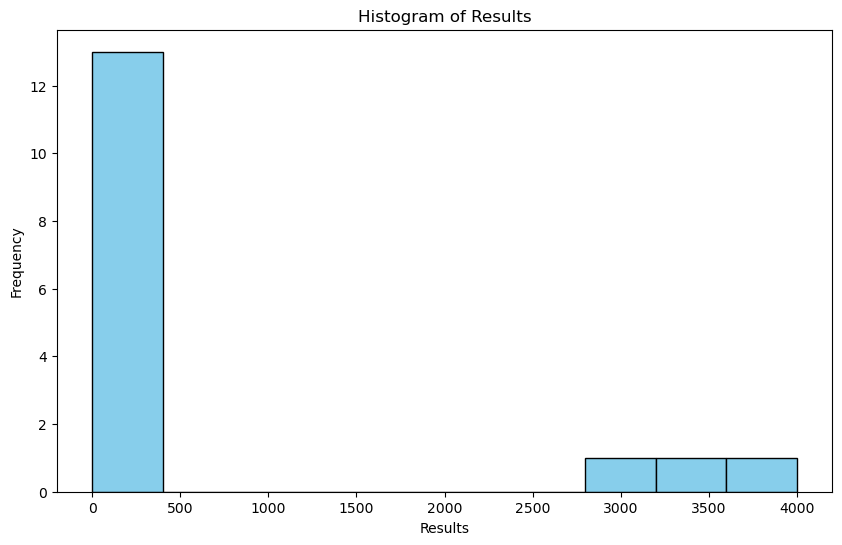

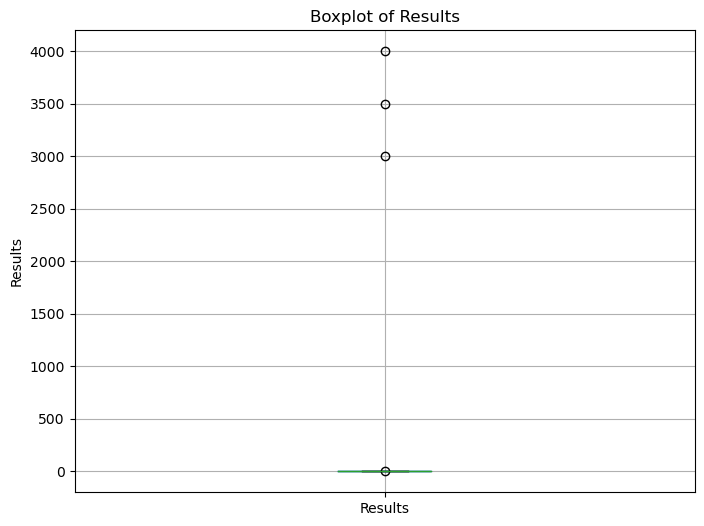

In [88]:
res = df['Results'].describe()
print(res)
df = num_values_to_float_n_info(df, 'Results')

In [89]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,5/11/2019,Caprotto cheese,Italy,Casa Madaio Srl (It 15/061ce),Listeria monocytogenes,NaN,/125g,CHE 07/2018,NaN,Risk food tests
1,1/11/2019,Frozen roasted eel,China,Jiangxi Donghai Food Co Lyd,Listeria monocytogenes,NaN,/125g,FSH 07/2018,NaN,Risk food tests
2,4/11/2019,Frozen whole cooked lobster,Brazil,J3 Industria E Comercio De Pescados Ltda,Salmonella,NaN,/125g,CRU 03/2019,NaN,Risk food tests
3,20/11/2019,Taleggio DOP cheese,Italy,Carozzi Roberto & C.S.N.C I03/416cee (Lecco It...,Listeria monocytogenes,NaN,/125g,CHE 07/2018,NaN,Risk food tests
4,22/11/2019,Ground red pepper,Nigeria,Oceanwaves Import and Export Ltd,Salmonella,NaN,/125g,SPI 06/2019,NaN,Risk food tests
5,28/11/2019,Frozen cooked vannamei prawns,China,Zhejiang Ocean Family Co Ltd,Standard plate count,NaN,cfu/g,CRU 03/2019,NaN,Risk food tests
6,26/11/2019,Chilli powder (deggi mirch),India,Mahashian Di Hatti Ltd (India),Salmonella,NaN,/125g,SPI 06/2019,NaN,Risk food tests
7,1/11/2019,Seasoned seaweed,Japan,Kurakon Foods Corporation,Iodine,3000.0000,mg/kg,BSW 12/2016,NaN,Risk food tests
8,1/11/2019,Dried seaweed,Japan,Kurakon Foods Corporation,Iodine,4000.0000,mg/kg,BSW 12/2016,NaN,Risk food tests
9,7/11/2019,Spice coated fried peanuts,India,Haldiram Snacks Pvt Ltd,Aflatoxin,0.0330,mg/kg,NUT 11/2018,NaN,Risk food tests


In [90]:
df.to_csv('IFIS_19_november.csv') 

### EDA ➱ IFIS DECEMBER 19 ↴

In [91]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_december_2019.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food category
0,11/12/2019,Smoked paprika,Spain,Pimenton El Angel S.L,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019\n\n,NaN,Risk food tests
1,23/12/2019,Frozen cooked prawn cutlets,Vietnam,Ca Mau Seafood Processing and Service Joint St...,NaN,NaN,Vibrio cholerae,Detected,/125g,CRU 03/2019,NaN,Risk food tests
2,30/12/2019,Cooked salad prawns,China,Fijian Dongshan County Shunfa Aquatic Co. Ltd.,NaN,NaN,Coagulase-positive staphylococci,"<100, <100, <100, 2700, <100",cfu/g,CRU 03/2019,NaN,Risk food tests
3,4/12/2019,Peanut candy,Malaysia,Desa Southern Agency (Kl) Sdn Bhd,NaN,NaN,Aflatoxin,0.048,mg/kg,NUT 11/2018,NaN,Risk food tests
4,6/12/2019,Spanish mackerel,Indonesia,Pt Iambeu Mina Utama,NaN,NaN,Histamine,1459,mg/kg,HIS 12/2016,NaN,Risk food tests
5,6/12/2019,Yellowfin tuna,Maldives,Cmf Fish Processing Factory,NaN,NaN,Histamine,710,mg/kg,HIS 12/2016,NaN,Risk food tests
6,6/12/2019,Yellowfin tuna,Maldives,Cmf Fish Processing Factory,NaN,NaN,Histamine,439,mg/kg,HIS 12/2016,NaN,Risk food tests
7,6/12/2019,Yellowfin tuna,Maldives,Cmf Fish Processing Factory,NaN,NaN,Histamine,234,mg/kg,HIS 12/2016,NaN,Risk food tests
8,6/12/2019,Yellowfin tuna,Maldives,Cmf Fish Processing Factory,NaN,NaN,Histamine,485,mg/kg,HIS 12/2016,NaN,Risk food tests
9,6/12/2019,Yellowfin tuna,Maldives,Cmf Fish Processing Factory,NaN,NaN,Histamine,265,mg/kg,HIS 12/2016,NaN,Risk food tests


In [92]:
df = df.drop('drop1', axis=1)
df = df.drop('drop2', axis=1)

In [94]:
df = df.drop('Holding order number', axis=1)

In [95]:
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

(34, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    34 non-null     object
 1   Product description             34 non-null     object
 2   Country of origin               34 non-null     object
 3   Producer name                   34 non-null     object
 4   Test applied / reason for fail  34 non-null     object
 5   Results                         34 non-null     object
 6   Units                           28 non-null     object
 7   Reference                       34 non-null     object
 8   Food category                   34 non-null     object
dtypes: object(9)
memory usage: 2.5+ KB
None


Date of fail                      object
Product description               object
Country of origin                 object
Producer name                     object
Test applied / re

In [96]:
columns = df.columns.tolist()
print(columns)
print('\n')
# missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
df.head()

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food category']


Date of fail - 0%
Product description - 0%
Country of origin - 0%
Producer name - 0%
Test applied / reason for fail - 0%
Results - 0%
Units - 18%
Reference - 0%
Food category - 0%


,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food category
0,11/12/2019,Smoked paprika,Spain,Pimenton El Angel S.L,Salmonella,Detected,/125g,SPI 06/2019\n\n,Risk food tests
1,23/12/2019,Frozen cooked prawn cutlets,Vietnam,Ca Mau Seafood Processing and Service Joint St...,Vibrio cholerae,Detected,/125g,CRU 03/2019,Risk food tests
2,30/12/2019,Cooked salad prawns,China,Fijian Dongshan County Shunfa Aquatic Co. Ltd.,Coagulase-positive staphylococci,"<100, <100, <100, 2700, <100",cfu/g,CRU 03/2019,Risk food tests
3,4/12/2019,Peanut candy,Malaysia,Desa Southern Agency (Kl) Sdn Bhd,Aflatoxin,0.048,mg/kg,NUT 11/2018,Risk food tests
4,6/12/2019,Spanish mackerel,Indonesia,Pt Iambeu Mina Utama,Histamine,1459,mg/kg,HIS 12/2016,Risk food tests


In [97]:
df.duplicated().sum()

0

count                   34
unique                  30
top       Prohibited plant
freq                     3
Name: Results, dtype: object
Null Value: 13


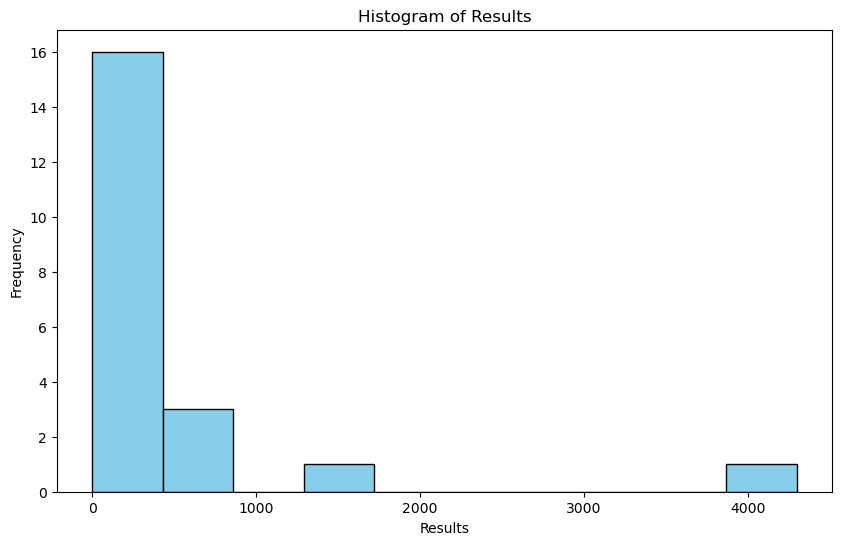

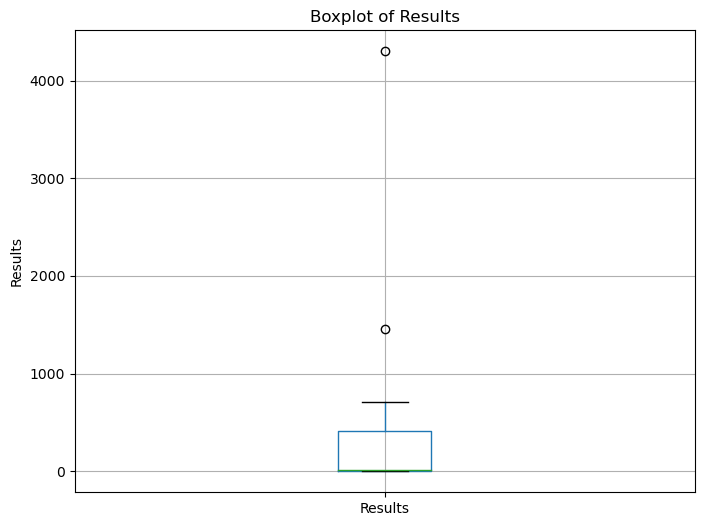

In [98]:
res = df['Results'].describe()
print(res)
df = num_values_to_float_n_info(df, 'Results')

In [99]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food category
0,11/12/2019,Smoked paprika,Spain,Pimenton El Angel S.L,Salmonella,NaN,/125g,SPI 06/2019\n\n,Risk food tests
1,23/12/2019,Frozen cooked prawn cutlets,Vietnam,Ca Mau Seafood Processing and Service Joint St...,Vibrio cholerae,NaN,/125g,CRU 03/2019,Risk food tests
2,30/12/2019,Cooked salad prawns,China,Fijian Dongshan County Shunfa Aquatic Co. Ltd.,Coagulase-positive staphylococci,NaN,cfu/g,CRU 03/2019,Risk food tests
3,4/12/2019,Peanut candy,Malaysia,Desa Southern Agency (Kl) Sdn Bhd,Aflatoxin,0.048,mg/kg,NUT 11/2018,Risk food tests
4,6/12/2019,Spanish mackerel,Indonesia,Pt Iambeu Mina Utama,Histamine,1459.000,mg/kg,HIS 12/2016,Risk food tests
5,6/12/2019,Yellowfin tuna,Maldives,Cmf Fish Processing Factory,Histamine,710.000,mg/kg,HIS 12/2016,Risk food tests
6,6/12/2019,Yellowfin tuna,Maldives,Cmf Fish Processing Factory,Histamine,439.000,mg/kg,HIS 12/2016,Risk food tests
7,6/12/2019,Yellowfin tuna,Maldives,Cmf Fish Processing Factory,Histamine,234.000,mg/kg,HIS 12/2016,Risk food tests
8,6/12/2019,Yellowfin tuna,Maldives,Cmf Fish Processing Factory,Histamine,485.000,mg/kg,HIS 12/2016,Risk food tests
9,6/12/2019,Yellowfin tuna,Maldives,Cmf Fish Processing Factory,Histamine,265.000,mg/kg,HIS 12/2016,Risk food tests


In [100]:
df.to_csv('IFIS_19_december.csv') 

## EDA ➱ IFIS JANUARY 2020 --HAPPY NEW YEAR | heaps of surprise this year :)) ↴

### as of now I will stop to do boxplots and histogram as there are not enough data from one to one. I will just create a new function that will convert strings into floats for relevant numerical values

In [116]:
def num_values_to_floats(df, column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    null_count = df[column_name].isnull().sum()
    print("Null Value:", null_count)
    return df

In [117]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_january_2020.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,7/01/2020,Frozen cooked black tiger prawns,Vietnam,Trong Nhan Seafood Company,NaN,NaN,Vibrio alginolyticus,Detected,/125g,NaN,NaN,Risk food tests
1,9/01/2020,Cooked pasted crab,Vietnam,Hai Chau Aquatic Product Company Limited,NaN,NaN,Standard plate count,"100 000, 150 000, 73 000, 77 000, 290 0000",cfu/g,CRU 03/2019,NaN,Risk food tests
2,21/01/2020,Black pepper,Iran,Golha Food Industries,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
3,21/01/2020,Gorgonzola dolce intero DOP cheese,Italy,La Casearia Carpenedo,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
4,28/01/2020,Crushed chilli,Myanmar,H-Htet Company Limited,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
5,30/01/2020,Frozen cooked and peeled vannamei shrimp,Vietnam,Ocean Shine Food Ltd Co (Osc),NaN,NaN,Standard plate count,"59 000, 33 000, 16 000, 210 000, 1 100 000",cfu/g,CRU 03/2019,NaN,Risk food tests
6,7/01/2020,Peanut cake,Malaysia,Meng Choon Food Industries Sdn Bhd,NaN,NaN,Aflatoxin,0.057,mg/kg,NUT 11/2018,NaN,Risk food tests
7,17/01/2020,Tapioca chips,India,Malabar Natural Foods Pvt Ltd,NaN,NaN,Hydrocyanic acid,20,mg/kg,CAS 09/2016,NaN,Risk food tests
8,17/01/2020,Tapioca chips masala flavour,India,Malabar Natural Foods Pvt Ltd,NaN,NaN,Hydrocyanic acid,24,mg/kg,CAS 09/2016,NaN,Risk food tests
9,23/01/2020,Tapioca chilli strips,India,Malabar Natural Foods Pvt Ltd,NaN,NaN,Hydrocyanic acid,11,mg/kg,CAS 09/2016,NaN,Risk food tests


In [118]:
df = df.drop('drop1', axis=1)
df = df.drop('drop2', axis=1)
df = df.drop('Holding order number', axis=1)

In [119]:
columns = df.columns.tolist()
print(columns)
print('\n')
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(27, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    27 non-null     object
 1   Product description             27 non-null     object
 2   Country of origin               27 non-null     object
 3   Producer name                   27 non-null     object
 4   Test applied / reason for fail  27 non-null     object
 5   Results                         27 non-null     object
 6   Units                           25 non-null     object
 7   Reference                       26 non-null     object
 8   Food Category                   27 non-null     object
dtypes: object(9)
memory usage: 2.0+ KB
None


Date of fail     

In [120]:
df.duplicated().sum()

1

In [121]:
result = find_and_locate_duplicates(df)
print(result)

Before cleaning, there are 1 duplicate(s).

After cleaning, there are 0 duplicate(s) remaining. 

   Date of fail     Product description Country of origin  \
23   21/01/2020  Frozen soft shell crab           Myanmar   
24   21/01/2020  Frozen soft shell crab           Myanmar   

                      Producer name  \
23  Gallant Ocean Trading Co., Ltd.   
24  Gallant Ocean Trading Co., Ltd.   

               Test applied / reason for fail Results  Units  Reference  \
23  Seafood antimicrobial tests Nitrofurazone   0.003  mg/kg  FSC 1.4.2   
24  Seafood antimicrobial tests Nitrofurazone   0.003  mg/kg  FSC 1.4.2   

              Food Category  
23  Surveillance food tests  
24  Surveillance food tests  


In [125]:
res = df['Results'].describe()
print(res)
df = num_values_to_floats(df, 'Results')
#print(df.dtypes)


count     15.000000
mean      24.661067
std       66.090401
min        0.002000
25%        0.018000
50%        0.045000
75%       20.500000
max      260.000000
Name: Results, dtype: float64
Null Value: 11


In [123]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,7/01/2020,Frozen cooked black tiger prawns,Vietnam,Trong Nhan Seafood Company,Vibrio alginolyticus,NaN,/125g,NaN,Risk food tests
1,9/01/2020,Cooked pasted crab,Vietnam,Hai Chau Aquatic Product Company Limited,Standard plate count,NaN,cfu/g,CRU 03/2019,Risk food tests
2,21/01/2020,Black pepper,Iran,Golha Food Industries,Salmonella,NaN,/125g,SPI 06/2019,Risk food tests
3,21/01/2020,Gorgonzola dolce intero DOP cheese,Italy,La Casearia Carpenedo,Listeria monocytogenes,NaN,/125g,CHE 07/2018,Risk food tests
4,28/01/2020,Crushed chilli,Myanmar,H-Htet Company Limited,Salmonella,NaN,/125g,SPI 06/2019,Risk food tests
5,30/01/2020,Frozen cooked and peeled vannamei shrimp,Vietnam,Ocean Shine Food Ltd Co (Osc),Standard plate count,NaN,cfu/g,CRU 03/2019,Risk food tests
6,7/01/2020,Peanut cake,Malaysia,Meng Choon Food Industries Sdn Bhd,Aflatoxin,0.057,mg/kg,NUT 11/2018,Risk food tests
7,17/01/2020,Tapioca chips,India,Malabar Natural Foods Pvt Ltd,Hydrocyanic acid,20.000,mg/kg,CAS 09/2016,Risk food tests
8,17/01/2020,Tapioca chips masala flavour,India,Malabar Natural Foods Pvt Ltd,Hydrocyanic acid,24.000,mg/kg,CAS 09/2016,Risk food tests
9,23/01/2020,Tapioca chilli strips,India,Malabar Natural Foods Pvt Ltd,Hydrocyanic acid,11.000,mg/kg,CAS 09/2016,Risk food tests


In [126]:
df.to_csv('IFIS_20_january.csv')

### EDA ➱ IFIS Febuary 2020 ↴

In [128]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_february_2020.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,11/02/2020,Ground pepper,Taiwan,Rich Care Co Ltd,NaN,NaN,Salmonella,Detected,/125g,SPI06/2019\n\n,NaN,Risk food tests
1,12/02/2020,Dried ground chilli,Vietnam,Bach Mai Enterprise,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
2,20/02/2020,Sesame paste,China,Sichuan Hongya Uniseed Food Co Ltd,NaN,NaN,Salmonella,Detected,/125g,SES 05/2014,NaN,Risk food tests
3,3/02/2020,Salted mackerel fish in oil,Thailand,Chonburi Lc Co Ltd (Establishment 3106),NaN,NaN,Histamine,310,mg/kg,HIS 12/2016,NaN,Risk food tests
4,7/02/2020,Kelp shreds,China,Fuzhou Hailin Food Co Ltd,NaN,NaN,Iodine,3600,mg/kg,BSW 12/2016,NaN,Risk food tests
5,7/02/2020,Chilled tuna loins,Indonesia,Pt Iambeu Mina Utama,NaN,NaN,Histamine,387,mg/kg,HIS 12/2016,NaN,Risk food tests
6,12/02/2020,Organic kelp flakes,New Zealand,Ceres Enterprises Ltd,NaN,NaN,Iodine,3700,mg/kg,BSW 12/2016,NaN,Risk food tests
7,12/02/2020,Organic kelp flakes,New Zealand,Ceres Enterprises Ltd,NaN,NaN,Iodine,4000,mg/kg,BSW 12/2016,NaN,Risk food tests
8,6/02/2020,Crispy paprika coated peanuts,Turkey,Suterco Gida Urun,NaN,NaN,Aflatoxin,0.055,mg/kg,NUT 11/2018,NaN,Risk food tests
9,12/02/2020,Chilled mackerel,Indonesia,Pt Iambeu Mina Utama,NaN,NaN,Histamine,1200,mg/kg,HIS 12/2016,NaN,Risk food tests


In [129]:
df = df.drop('drop1', axis=1)
df = df.drop('drop2', axis=1)
df = df.drop('Holding order number', axis=1)

In [130]:
columns = df.columns.tolist()
print(columns)
print('\n')
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(39, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    39 non-null     object
 1   Product description             39 non-null     object
 2   Country of origin               39 non-null     object
 3   Producer name                   39 non-null     object
 4   Test applied / reason for fail  39 non-null     object
 5   Results                         39 non-null     object
 6   Units                           30 non-null     object
 7   Reference                       39 non-null     object
 8   Food Category                   39 non-null     object
dtypes: object(9)
memory usage: 2.9+ KB
None


Date of fail     

In [131]:
df.duplicated().sum()

0

In [132]:
res = df['Results'].describe()
print(res)
df = num_values_to_floats(df, 'Results')

count                             39
unique                            28
top       Not permitted in this food
freq                               9
Name: Results, dtype: object
Null Value: 21


In [133]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,11/02/2020,Ground pepper,Taiwan,Rich Care Co Ltd,Salmonella,NaN,/125g,SPI06/2019\n\n,Risk food tests
1,12/02/2020,Dried ground chilli,Vietnam,Bach Mai Enterprise,Salmonella,NaN,/125g,SPI 06/2019,Risk food tests
2,20/02/2020,Sesame paste,China,Sichuan Hongya Uniseed Food Co Ltd,Salmonella,NaN,/125g,SES 05/2014,Risk food tests
3,3/02/2020,Salted mackerel fish in oil,Thailand,Chonburi Lc Co Ltd (Establishment 3106),Histamine,310.000,mg/kg,HIS 12/2016,Risk food tests
4,7/02/2020,Kelp shreds,China,Fuzhou Hailin Food Co Ltd,Iodine,3600.000,mg/kg,BSW 12/2016,Risk food tests
5,7/02/2020,Chilled tuna loins,Indonesia,Pt Iambeu Mina Utama,Histamine,387.000,mg/kg,HIS 12/2016,Risk food tests
6,12/02/2020,Organic kelp flakes,New Zealand,Ceres Enterprises Ltd,Iodine,3700.000,mg/kg,BSW 12/2016,Risk food tests
7,12/02/2020,Organic kelp flakes,New Zealand,Ceres Enterprises Ltd,Iodine,4000.000,mg/kg,BSW 12/2016,Risk food tests
8,6/02/2020,Crispy paprika coated peanuts,Turkey,Suterco Gida Urun,Aflatoxin,0.055,mg/kg,NUT 11/2018,Risk food tests
9,12/02/2020,Chilled mackerel,Indonesia,Pt Iambeu Mina Utama,Histamine,1200.000,mg/kg,HIS 12/2016,Risk food tests


In [134]:
df.to_csv('IFIS_20_febuary.csv') 

### EDA ➱ IFIS MARCH 20 ↴

In [135]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_march_2020.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,3/03/2020,Kashmiri chilli powder,India,Brahmins Foods India (P) Ltd,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
1,11/03/2020,Frozen boiled king crab legs,Japan,Yutaka Suisan,NaN,NaN,Listeria monocytogenes,Detected,/125g,CRU 03/2019,NaN,Risk food tests
2,2/03/2020,Caffeine tablets,United States,Arnet Pharmaceuticals,NaN,NaN,Caffeine,30.8,g/100g,CAF 12/2019,NaN,Risk food tests
3,16/03/2020,Powdered herring,Ghana,Gorgino Enterprise,NaN,NaN,Histamine,292,mg/kg,HIS 12/2016,NaN,Risk food tests
4,17/03/2020,Curry paste,Thailand,D&G Food Supply Co Ltd,NaN,NaN,Aflatoxin,0.244,mg/kg,NUT 11/2018,NaN,Risk food tests
5,27/03/2020,Peanut satay sauce,Indonesia,Pt Enak Jaya Makmur (Indonesia),NaN,NaN,Aflatoxin,0.041,mg/kg,NUT 11/2018,NaN,Risk food tests
6,30/03/2020,Formulated supplementary sports food,United States,Granite Supplements,NaN,NaN,Caffeine,10,g/100g,CAF 12/2019,NaN,Risk food tests
7,30/03/2020,Formulated supplementary sports food,United States,Granite Supplements,NaN,NaN,Caffeine,8.33,g/100g,CAF 12/2019,NaN,Risk food tests
8,30/03/2020,Peanut masala,India,Malabar Natural Foods Pvt Ltd,NaN,NaN,Aflatoxin,0.022,mg/kg,NUT 11/2018,NaN,Risk food tests
9,30/03/2020,Peanut candy bar,India,Malabar Natural Foods Pvt Ltd,NaN,NaN,Aflatoxin,0.012,mg/kg,NUT 11/2018,NaN,Risk food tests


In [136]:
df = df.drop('drop1', axis=1)
df = df.drop('drop2', axis=1)
df = df.drop('Holding order number', axis=1)

In [137]:
columns = df.columns.tolist()
print(columns)
print('\n')
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(31, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    31 non-null     object
 1   Product description             31 non-null     object
 2   Country of origin               31 non-null     object
 3   Producer name                   31 non-null     object
 4   Test applied / reason for fail  31 non-null     object
 5   Results                         31 non-null     object
 6   Units                           24 non-null     object
 7   Reference                       31 non-null     object
 8   Food Category                   31 non-null     object
dtypes: object(9)
memory usage: 2.3+ KB
None


Date of fail     

In [138]:
df.duplicated().sum()

0

In [139]:
res = df['Results'].describe()
print(res)
df = num_values_to_floats(df, 'Results')

count                             31
unique                            25
top       Not permitted in this food
freq                               5
Name: Results, dtype: object
Null Value: 13


In [140]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,3/03/2020,Kashmiri chilli powder,India,Brahmins Foods India (P) Ltd,Salmonella,NaN,/125g,SPI 06/2019,Risk food tests
1,11/03/2020,Frozen boiled king crab legs,Japan,Yutaka Suisan,Listeria monocytogenes,NaN,/125g,CRU 03/2019,Risk food tests
2,2/03/2020,Caffeine tablets,United States,Arnet Pharmaceuticals,Caffeine,30.800,g/100g,CAF 12/2019,Risk food tests
3,16/03/2020,Powdered herring,Ghana,Gorgino Enterprise,Histamine,292.000,mg/kg,HIS 12/2016,Risk food tests
4,17/03/2020,Curry paste,Thailand,D&G Food Supply Co Ltd,Aflatoxin,0.244,mg/kg,NUT 11/2018,Risk food tests
5,27/03/2020,Peanut satay sauce,Indonesia,Pt Enak Jaya Makmur (Indonesia),Aflatoxin,0.041,mg/kg,NUT 11/2018,Risk food tests
6,30/03/2020,Formulated supplementary sports food,United States,Granite Supplements,Caffeine,10.000,g/100g,CAF 12/2019,Risk food tests
7,30/03/2020,Formulated supplementary sports food,United States,Granite Supplements,Caffeine,8.330,g/100g,CAF 12/2019,Risk food tests
8,30/03/2020,Peanut masala,India,Malabar Natural Foods Pvt Ltd,Aflatoxin,0.022,mg/kg,NUT 11/2018,Risk food tests
9,30/03/2020,Peanut candy bar,India,Malabar Natural Foods Pvt Ltd,Aflatoxin,0.012,mg/kg,NUT 11/2018,Risk food tests


In [141]:
df.to_csv('IFIS_20_march.csv') 

### EDA ➱ IFIS APRIL 2020 ↴

In [142]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_april_2020.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,9/04/2020,Ossau Iraty cheese (sheeps milk cheese),France,Agour Distrib Sarl 64640 F64259100cee (Helette...,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
1,8/04/2020,Tapioca chips,India,Malabar Natural Foods Pvt Ltd,NaN,NaN,Hydrocyanic acid,21,mg/kg,CAS 09/2016\n\n,NaN,Risk food tests
2,8/04/2020,Tapioca chips masala,India,Malabar Natural Foods Pvt Ltd,NaN,NaN,Hydrocyanic acid,22,mg/kg,CAS 09/2016,NaN,Risk food tests
3,21/04/2020,Salted anchovies,Philippines,P.O.P Export Trading,NaN,NaN,Histamine,260,mg/kg,HIS 12/2016,NaN,Risk food tests
4,22/04/2020,Spice coated fried peanuts,India,Haldirams Snacks,NaN,NaN,Aflatoxin,0.048,mg/kg,NUT 11/2018,NaN,Risk food tests
5,22/04/2020,Pistachios,Iran,Ratin Khosh Co,NaN,NaN,Aflatoxin,0.087,mg/kg,NUT 11/2018,NaN,Risk food tests
6,28/04/2020,Dried balaya fish (skipjack tuna),Sri Lanka,Damayanthi Ent & Exp (Sri Lanka),NaN,NaN,Histamine,4500,mg/kg,HIS 12/2016,NaN,Risk food tests
7,28/04/2020,Maldive fish chips,Sri Lanka,Consolidated Business Systems Limited,NaN,NaN,Histamine,260,mg/kg,HIS 12/2016,NaN,Risk food tests
8,24/04/2020,Dried anchovies,Myanmar,Evershine Trading Co Ltd,NaN,NaN,Histamine,410,mg/kg,HIS 12/2016,NaN,Risk food tests
9,24/04/2020,Dried anchovies,Myanmar,Evershine Trading Co Ltd,NaN,NaN,Histamine,970,mg/kg,HIS 12/2016,NaN,Risk food tests


In [143]:
df = df.drop('drop1', axis=1)
df = df.drop('drop2', axis=1)
df = df.drop('Holding order number', axis=1)

In [144]:
columns = df.columns.tolist()
print(columns)
print('\n')
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(37, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    37 non-null     object
 1   Product description             37 non-null     object
 2   Country of origin               37 non-null     object
 3   Producer name                   37 non-null     object
 4   Test applied / reason for fail  37 non-null     object
 5   Results                         37 non-null     object
 6   Units                           28 non-null     object
 7   Reference                       37 non-null     object
 8   Food Category                   37 non-null     object
dtypes: object(9)
memory usage: 2.7+ KB
None


Date of fail     

In [145]:
df.duplicated().sum()

0

In [146]:
res = df['Results'].describe()
print(res)
df = num_values_to_floats(df, 'Results')

count                             37
unique                            29
top       Not permitted in this food
freq                               8
Name: Results, dtype: object
Null Value: 15


In [147]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,9/04/2020,Ossau Iraty cheese (sheeps milk cheese),France,Agour Distrib Sarl 64640 F64259100cee (Helette...,Listeria monocytogenes,NaN,/125g,CHE 07/2018,Risk food tests
1,8/04/2020,Tapioca chips,India,Malabar Natural Foods Pvt Ltd,Hydrocyanic acid,21.000,mg/kg,CAS 09/2016\n\n,Risk food tests
2,8/04/2020,Tapioca chips masala,India,Malabar Natural Foods Pvt Ltd,Hydrocyanic acid,22.000,mg/kg,CAS 09/2016,Risk food tests
3,21/04/2020,Salted anchovies,Philippines,P.O.P Export Trading,Histamine,260.000,mg/kg,HIS 12/2016,Risk food tests
4,22/04/2020,Spice coated fried peanuts,India,Haldirams Snacks,Aflatoxin,0.048,mg/kg,NUT 11/2018,Risk food tests
5,22/04/2020,Pistachios,Iran,Ratin Khosh Co,Aflatoxin,0.087,mg/kg,NUT 11/2018,Risk food tests
6,28/04/2020,Dried balaya fish (skipjack tuna),Sri Lanka,Damayanthi Ent & Exp (Sri Lanka),Histamine,4500.000,mg/kg,HIS 12/2016,Risk food tests
7,28/04/2020,Maldive fish chips,Sri Lanka,Consolidated Business Systems Limited,Histamine,260.000,mg/kg,HIS 12/2016,Risk food tests
8,24/04/2020,Dried anchovies,Myanmar,Evershine Trading Co Ltd,Histamine,410.000,mg/kg,HIS 12/2016,Risk food tests
9,24/04/2020,Dried anchovies,Myanmar,Evershine Trading Co Ltd,Histamine,970.000,mg/kg,HIS 12/2016,Risk food tests


In [148]:
df.to_csv('IFIS_20_april.csv') 

### EDA ➱ IFIS MAY 2020 ↴

In [149]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_may_2020.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,1/05/2020,Crushed chilli,Sri Lanka,Cmb Lanka (Private) Limited,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
1,13/05/2020,Agour goat cheese,France,Agour Distrib Sarl 64640 F64259100cee (Helette...,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
2,13/05/2020,Compostelle cheese,France,Agour Distrib Sarl 64640 F64259100cee (Helette...,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
3,13/05/2020,Chalosse cheese,France,Agour Distrib Sarl 64640 F64259100cee (Helette...,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
4,18/05/2020,Frozen cooked vannamei prawns,Thailand,Top Product Food Co. Ltd.,NaN,NaN,Standard plate count,"16 000 000 , 13 000 , 6 000, \n5 200 000, 4 000",cfu/g,CRU 03/2019,NaN,Risk food tests
5,6/05/2020,Dried Kelawalla Fish,Sri Lanka,St Anne's Enterprises (Sri Lanka),NaN,NaN,Histamine,660,mg/kg,HIS 12/2016,NaN,Risk food tests
6,6/05/2020,Dried Kelawalla Fish,Sri Lanka,D & R Exports Pvt Ltd,NaN,NaN,Histamine,2200,mg/kg,HIS 12/2016,NaN,Risk food tests
7,6/05/2020,Dried Balaya Fish,Sri Lanka,D & R Exports Pvt Ltd,NaN,NaN,Histamine,3600,mg/kg,HIS 12/2016,NaN,Risk food tests
8,6/05/2020,Maldive fish chips,Sri Lanka,D & R Exports Pvt Ltd,NaN,NaN,Histamine,230,mg/kg,HIS 12/2016,NaN,Risk food tests
9,6/05/2020,Dried mackerel shavings,Japan,Fukushima Katsuo Co Ltd,NaN,NaN,Histamine,520,mg/kg,HIS 12/2016,NaN,Risk food tests


In [150]:
df = df.drop('drop1', axis=1)
df = df.drop('drop2', axis=1)
df = df.drop('Holding order number', axis=1)

In [151]:
columns = df.columns.tolist()
print(columns)
print('\n')
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(59, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    59 non-null     object
 1   Product description             58 non-null     object
 2   Country of origin               58 non-null     object
 3   Producer name                   58 non-null     object
 4   Test applied / reason for fail  58 non-null     object
 5   Results                         58 non-null     object
 6   Units                           39 non-null     object
 7   Reference                       58 non-null     object
 8   Food Category                   58 non-null     object
dtypes: object(9)
memory usage: 4.3+ KB
None


Date of fail     

In [152]:
df.duplicated().sum()

1

In [153]:
result = find_and_locate_duplicates(df)
print(result)

Before cleaning, there are 1 duplicate(s).

After cleaning, there are 0 duplicate(s) remaining. 

   Date of fail Product description Country of origin    Producer name  \
52   26/05/2020           Betel nut  Papua New Guinea  MAGDALINE MAINO   
54   26/05/2020           Betel nut  Papua New Guinea  MAGDALINE MAINO   

           Test applied / reason for fail           Results Units  Reference  \
52  Composition Areca catechu (Betel nut)  Prohibited plant   NaN  FSC 1.4.4   
54  Composition Areca catechu (Betel nut)  Prohibited plant   NaN  FSC 1.4.4   

              Food Category  
52  Surveillance food tests  
54  Surveillance food tests  


In [154]:
res = df['Results'].describe()
print(res)
df = num_values_to_floats(df, 'Results')

count                             57
unique                            38
top       Not permitted in this food
freq                              13
Name: Results, dtype: object
Null Value: 35


In [155]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,1/05/2020,Crushed chilli,Sri Lanka,Cmb Lanka (Private) Limited,Salmonella,NaN,/125g,SPI 06/2019,Risk food tests
1,13/05/2020,Agour goat cheese,France,Agour Distrib Sarl 64640 F64259100cee (Helette...,Listeria monocytogenes,NaN,/125g,CHE 07/2018,Risk food tests
2,13/05/2020,Compostelle cheese,France,Agour Distrib Sarl 64640 F64259100cee (Helette...,Listeria monocytogenes,NaN,/125g,CHE 07/2018,Risk food tests
3,13/05/2020,Chalosse cheese,France,Agour Distrib Sarl 64640 F64259100cee (Helette...,Listeria monocytogenes,NaN,/125g,CHE 07/2018,Risk food tests
4,18/05/2020,Frozen cooked vannamei prawns,Thailand,Top Product Food Co. Ltd.,Standard plate count,NaN,cfu/g,CRU 03/2019,Risk food tests
5,6/05/2020,Dried Kelawalla Fish,Sri Lanka,St Anne's Enterprises (Sri Lanka),Histamine,660.000,mg/kg,HIS 12/2016,Risk food tests
6,6/05/2020,Dried Kelawalla Fish,Sri Lanka,D & R Exports Pvt Ltd,Histamine,2200.000,mg/kg,HIS 12/2016,Risk food tests
7,6/05/2020,Dried Balaya Fish,Sri Lanka,D & R Exports Pvt Ltd,Histamine,3600.000,mg/kg,HIS 12/2016,Risk food tests
8,6/05/2020,Maldive fish chips,Sri Lanka,D & R Exports Pvt Ltd,Histamine,230.000,mg/kg,HIS 12/2016,Risk food tests
9,6/05/2020,Dried mackerel shavings,Japan,Fukushima Katsuo Co Ltd,Histamine,520.000,mg/kg,HIS 12/2016,Risk food tests


In [156]:
df.to_csv('IFIS_20_may.csv') 

### EDA ➱ IFIS JUNE 2020 ↴

In [157]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_june_2020.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,10/06/2020,Peanut brittle,Pakistan,Oasis Corporation,NaN,NaN,Aflatoxin,0.028,mg/kg,NUT 11/2018,NaN,Risk food tests
1,8/06/2020,Frozen cooked peeled prawns,Thailand,Lee Heng Seafood Co Ltd (Establishment 1177),NaN,NaN,Standard plate count,"1 000, 1 000 000, 71 000, 690 000, 190 000",cfu/g,CRU 03/2019,NaN,Risk food tests
2,11/06/2020,Maldive fish chips,Sri Lanka,Derana Marketing Services Pvt Ltd,NaN,NaN,Histamine,580,mg/kg,HIS 12/2016,NaN,Risk food tests
3,11/06/2020,Smoked salmon,Poland,Bg Production Sp Zoo,NaN,NaN,Listeria monocytogenes,Detected,/125g,FSH 07/2018,NaN,Risk food tests
4,12/06/2020,Bonito flakes,Japan,Kaneshichi Co Ltd,NaN,NaN,Histamine,519,mg/kg,HIS 12/2016,NaN,Risk food tests
5,16/06/2020,Cassava chips,Indonesia,Pt.Arira Pangindo,NaN,NaN,Hydrocyanic acid,12,mg/kg,CAS 09/2019,NaN,Risk food tests
6,16/06/2020,Cassava chips,Indonesia,Pt.Arira Pangindo,NaN,NaN,Hydrocyanic acid,15,mg/kg,CAS 09/2019,NaN,Risk food tests
7,12/06/2020,Seaweed,China,Fuzhou Hailin Food Co Ltd,NaN,NaN,Iodine,2600,mg/kg,BSW 12/2016,NaN,Risk food tests
8,22/06/2020,Compostelle cheese,France,Agour Distrib Sarl 64640 F64259100cee (Helette...,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
9,24/06/2020,Salted peanuts,China,"Dongguan City Shaerge Food Co., Ltd",NaN,NaN,Aflatoxin,0.25,mg/kg,NUT 11/2018,NaN,Risk food tests


In [158]:
df = df.drop('drop1', axis=1)
df = df.drop('drop2', axis=1)
df = df.drop('Holding order number', axis=1)

In [159]:
columns = df.columns.tolist()
print(columns)
print('\n')
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(38, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    38 non-null     object
 1   Product description             38 non-null     object
 2   Country of origin               38 non-null     object
 3   Producer name                   38 non-null     object
 4   Test applied / reason for fail  38 non-null     object
 5   Results                         38 non-null     object
 6   Units                           29 non-null     object
 7   Reference                       38 non-null     object
 8   Food Category                   38 non-null     object
dtypes: object(9)
memory usage: 2.8+ KB
None


Date of fail     

In [160]:
df.duplicated().sum()

0

In [161]:
res = df['Results'].describe()
print(res)
df = num_values_to_floats(df, 'Results')

count                             38
unique                            28
top       Not permitted in this food
freq                               7
Name: Results, dtype: object
Null Value: 16


In [162]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,10/06/2020,Peanut brittle,Pakistan,Oasis Corporation,Aflatoxin,0.028,mg/kg,NUT 11/2018,Risk food tests
1,8/06/2020,Frozen cooked peeled prawns,Thailand,Lee Heng Seafood Co Ltd (Establishment 1177),Standard plate count,NaN,cfu/g,CRU 03/2019,Risk food tests
2,11/06/2020,Maldive fish chips,Sri Lanka,Derana Marketing Services Pvt Ltd,Histamine,580.000,mg/kg,HIS 12/2016,Risk food tests
3,11/06/2020,Smoked salmon,Poland,Bg Production Sp Zoo,Listeria monocytogenes,NaN,/125g,FSH 07/2018,Risk food tests
4,12/06/2020,Bonito flakes,Japan,Kaneshichi Co Ltd,Histamine,519.000,mg/kg,HIS 12/2016,Risk food tests
5,16/06/2020,Cassava chips,Indonesia,Pt.Arira Pangindo,Hydrocyanic acid,12.000,mg/kg,CAS 09/2019,Risk food tests
6,16/06/2020,Cassava chips,Indonesia,Pt.Arira Pangindo,Hydrocyanic acid,15.000,mg/kg,CAS 09/2019,Risk food tests
7,12/06/2020,Seaweed,China,Fuzhou Hailin Food Co Ltd,Iodine,2600.000,mg/kg,BSW 12/2016,Risk food tests
8,22/06/2020,Compostelle cheese,France,Agour Distrib Sarl 64640 F64259100cee (Helette...,Listeria monocytogenes,NaN,/125g,CHE 07/2018,Risk food tests
9,24/06/2020,Salted peanuts,China,"Dongguan City Shaerge Food Co., Ltd",Aflatoxin,0.250,mg/kg,NUT 11/2018,Risk food tests


In [163]:
df.to_csv('IFIS_20_june.csv') 

### EDA ➱ IFIS JULY 2020 ↴

In [164]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_july_2020.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,8/07/2020,Cooked crawfish tail,China,Guolian Yiyang Food Co Ltd,NaN,NaN,Listeria monocytogenes,Detected,/125g,CRU 03/2019,NaN,Risk food tests
1,8/07/2020,Cooked crawfish tail,China,Guolian Yiyang Food Co Ltd,NaN,NaN,Standard plate count,"400 000, 260 000, 290 000, 290 000, 400 000",cfu/g,CRU 03/2019,NaN,Risk food tests
2,8/07/2020,Sheep milk cured cheese,Portugal,Lacticinios Do Paiva Sa,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
3,10/07/2020,Salted anchovies,Philippines,P.O.P Export Trading,NaN,NaN,Histamine,350,mg/kg,HIS 12/2016,NaN,Risk food tests
4,15/07/2020,Keeramin (dried fish),Sri Lanka,St Annes Enterprises (Sri Lanka),NaN,NaN,Histamine,470,mg/kg,HIS 12/2016,NaN,Risk food tests
5,16/07/2020,Roasted bhujia (roasted peanuts),India,Jay Keshav Exports Pvt Ltd,NaN,NaN,Aflatoxin,0.052,mg/kg,NUT 11/2018,NaN,Risk food tests
6,30/07/2020,Kashmiri chilli powder,India,Synthite Industries Ltd,NaN,NaN,Salmonella,Detected,/125,SPI 06/2019,NaN,Risk food tests
7,30/07/2020,Tapioca chips,India,Bakemill Foods Intl,NaN,NaN,Hydrocyanic Acid,15,mg/kg,CAS 09/2016,NaN,Risk food tests
8,30/07/2020,Tapioca chips,India,Bakemill Foods Intl,NaN,NaN,Hydrocyanic Acid,21,mg/kg,CAS 09/2016,NaN,Risk food tests
9,1/07/2020,Door dal (peas),India,Batra Enterprises,Fruit and vegetable residue screen,Chlorpyrifos,Fruit and vegetable residue screen Chlorpyrifos,0.013,mg/kg,NaN,16117,Surveillance food tests


In [165]:
df = df.drop('drop1', axis=1)
df = df.drop('drop2', axis=1)
df = df.drop('Holding order number', axis=1)

In [166]:
columns = df.columns.tolist()
print(columns)
print('\n')
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(29, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    29 non-null     object
 1   Product description             29 non-null     object
 2   Country of origin               29 non-null     object
 3   Producer name                   28 non-null     object
 4   Test applied / reason for fail  29 non-null     object
 5   Results                         29 non-null     object
 6   Units                           16 non-null     object
 7   Reference                       27 non-null     object
 8   Food Category                   26 non-null     object
dtypes: object(9)
memory usage: 2.2+ KB
None


Date of fail     

In [167]:
df.duplicated().sum()

0

In [168]:
res = df['Results'].describe()
print(res)
df = num_values_to_floats(df, 'Results')

count                             29
unique                            19
top       Not permitted in this food
freq                               8
Name: Results, dtype: object
Null Value: 18


In [169]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,8/07/2020,Cooked crawfish tail,China,Guolian Yiyang Food Co Ltd,Listeria monocytogenes,NaN,/125g,CRU 03/2019,Risk food tests
1,8/07/2020,Cooked crawfish tail,China,Guolian Yiyang Food Co Ltd,Standard plate count,NaN,cfu/g,CRU 03/2019,Risk food tests
2,8/07/2020,Sheep milk cured cheese,Portugal,Lacticinios Do Paiva Sa,Listeria monocytogenes,NaN,/125g,CHE 07/2018,Risk food tests
3,10/07/2020,Salted anchovies,Philippines,P.O.P Export Trading,Histamine,350.000,mg/kg,HIS 12/2016,Risk food tests
4,15/07/2020,Keeramin (dried fish),Sri Lanka,St Annes Enterprises (Sri Lanka),Histamine,470.000,mg/kg,HIS 12/2016,Risk food tests
5,16/07/2020,Roasted bhujia (roasted peanuts),India,Jay Keshav Exports Pvt Ltd,Aflatoxin,0.052,mg/kg,NUT 11/2018,Risk food tests
6,30/07/2020,Kashmiri chilli powder,India,Synthite Industries Ltd,Salmonella,NaN,/125,SPI 06/2019,Risk food tests
7,30/07/2020,Tapioca chips,India,Bakemill Foods Intl,Hydrocyanic Acid,15.000,mg/kg,CAS 09/2016,Risk food tests
8,30/07/2020,Tapioca chips,India,Bakemill Foods Intl,Hydrocyanic Acid,21.000,mg/kg,CAS 09/2016,Risk food tests
9,1/07/2020,Door dal (peas),India,Batra Enterprises,Fruit and vegetable residue screen Chlorpyrifos,0.013,mg/kg,NaN,Surveillance food tests


In [170]:
df.to_csv('IFIS_20_july.csv') 

### EDA ➱ IFIS AUGUST 2020 ↴

In [171]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_august_2020.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Result/s,Units,Reference,Holding order number,Food Category
0,3/08/2020,Tahini,United Arab Emirates,General Trading concept,NaN,NaN,Salmonella,Detected,/125g,SES 05/2014,NaN,Risk food tests
1,3/08/2020,Smoked salmon,Poland,BG Production SP Zoo,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
2,6/08/2020,Ground black pepper,Tanzania United Republic of,Elven Agri Company Limited,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
3,6/08/2020,African birds eye chilli powder,Tanzania United Republic of,Elven Agri Company Limited,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
4,10/08/2020,Peanut candy balls,India,Malabar Natural Foods PVT LTD,NaN,NaN,Aflatoxin,0.088,mg/kg,NUT 11/2018,NaN,Risk food tests
...,...,...,...,...,...,...,...,...,...,...,...,...
68,21/08/2020,Gluten free corn flakes,Italy,Dr Schar Ag/Spa,Composition,Pantothenic acid,Composition Pantothenic acid,Not permitted in this food,NaN,FSC 1.3.2,Holding Order match 16081,Surveillance food tests
69,21/08/2020,Gluten free corn flakes,Italy,Dr Schar Ag/Spa,Composition,Biotin,Composition Biotin,Not permitted in this food,NaN,FSC 1.3.2,Holding Order match 16081,Surveillance food tests
70,21/08/2020,Gluten free corn flakes,Italy,Dr Schar Ag/Spa,Composition,Vitamin B12,Composition Vitamin B12,Not permitted in this food,NaN,FSC 1.3.2,Holding Order match 16081,Surveillance food tests
71,21/08/2020,Bake Time Marble Cake Slices,Pakistan,Hilal Foods,Composition,Additive Sodium benzoate,Composition Additive Sodium benzoate,Not permitted in this food,NaN,FSC 1.3.1,Holding Order match 14072,Surveillance food tests


In [172]:
df = df.drop('drop1', axis=1)
df = df.drop('drop2', axis=1)
df = df.drop('Holding order number', axis=1)

In [173]:
columns = df.columns.tolist()
print(columns)
print('\n')
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Result/s', 'Units', 'Reference', 'Food Category']


(73, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    73 non-null     object
 1   Product description             73 non-null     object
 2   Country of origin               73 non-null     object
 3   Producer name                   73 non-null     object
 4   Test applied / reason for fail  73 non-null     object
 5   Result/s                        73 non-null     object
 6   Units                           41 non-null     object
 7   Reference                       73 non-null     object
 8   Food Category                   73 non-null     object
dtypes: object(9)
memory usage: 5.3+ KB
None


Date of fail    

In [174]:
df = df.rename(columns={'Result/s': 'Results'})

In [175]:
df.duplicated().sum()

0

In [176]:
res = df['Results'].describe()
print(res)
df = num_values_to_floats(df, 'Results')

count                             73
unique                            30
top       Not permitted in this food
freq                              26
Name: Results, dtype: object
Null Value: 57


In [177]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,3/08/2020,Tahini,United Arab Emirates,General Trading concept,Salmonella,NaN,/125g,SES 05/2014,Risk food tests
1,3/08/2020,Smoked salmon,Poland,BG Production SP Zoo,Listeria monocytogenes,NaN,/125g,CHE 07/2018,Risk food tests
2,6/08/2020,Ground black pepper,Tanzania United Republic of,Elven Agri Company Limited,Salmonella,NaN,/125g,SPI 06/2019,Risk food tests
3,6/08/2020,African birds eye chilli powder,Tanzania United Republic of,Elven Agri Company Limited,Salmonella,NaN,/125g,SPI 06/2019,Risk food tests
4,10/08/2020,Peanut candy balls,India,Malabar Natural Foods PVT LTD,Aflatoxin,0.088,mg/kg,NUT 11/2018,Risk food tests
...,...,...,...,...,...,...,...,...,...
68,21/08/2020,Gluten free corn flakes,Italy,Dr Schar Ag/Spa,Composition Pantothenic acid,NaN,NaN,FSC 1.3.2,Surveillance food tests
69,21/08/2020,Gluten free corn flakes,Italy,Dr Schar Ag/Spa,Composition Biotin,NaN,NaN,FSC 1.3.2,Surveillance food tests
70,21/08/2020,Gluten free corn flakes,Italy,Dr Schar Ag/Spa,Composition Vitamin B12,NaN,NaN,FSC 1.3.2,Surveillance food tests
71,21/08/2020,Bake Time Marble Cake Slices,Pakistan,Hilal Foods,Composition Additive Sodium benzoate,NaN,NaN,FSC 1.3.1,Surveillance food tests


In [178]:
df.to_csv('IFIS_20_august.csv') 

### EDA ➱ IFIS SEPTEMBER 2020 ↴

In [509]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_september_2020.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,Reason for fail,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,21/08/2020,Tapioca chips,India,Malabar Natural Foods Pvt Ltd,NaN,NaN,Hydrocyanic acid,69,mg/kg,CAS 09/2019,NaN,Risk food tests
1,27/08/2020,Frozen cooked crawfish tail,China,Guolian Yiyang Food Co Ltd,NaN,NaN,Listeria monocytogenes,Detected,NaN,CRU 03/2019,NaN,Risk food tests
2,27/08/2020,Frozen cooked crawfish tail,China,Guolian Yiyang Food Co Ltd,NaN,NaN,Standard Plate Count,"180000, 370000, 190000, 300000, 200000",mg/kg,CRU 03/2019,NaN,Risk food tests
3,31/08/2020,Masala Peanuts,India,Frumar Marketing Pty,NaN,NaN,Aflatoxin,0.035,mg/kg,NUT 11/2018,NaN,Risk food tests
4,2/09/2020,Masala sing bhujiya,India,Kartik Enterprise,NaN,NaN,Aflatoxin,0.07,mg/kg,NUT 11/2018,NaN,Risk food tests
5,3/09/2020,Tapioca chips,India,Topper Export,NaN,NaN,Hydrocyanic acid,17,mg/kg,CAS 09/2019,NaN,Risk food tests
6,3/09/2020,Tapioca chips spicy,India,Topper Export,NaN,NaN,Hydrocyanic acid,42,mg/kg,CAS 09/2019,NaN,Risk food tests
7,3/09/2020,Tapioca chips sticks,India,Topper Export,NaN,NaN,Hydrocyanic acid,43,mg/kg,CAS 09/2019,NaN,Risk food tests
8,3/09/2020,Dried anchovy,Vietnam,Saky Foods Company Limited,NaN,NaN,Histamine,251,mg/kg,HIS 12/2016,NaN,Risk food tests
9,3/09/2020,Bamboo clam,Indonesia,Pt Mina Jaya Wysia,NaN,NaN,E. coli,"2.3, <2.3, 4.3, 24, 2.3",mg/kg,MOL 04/2017,NaN,Risk food tests


In [510]:
df = df.drop('Reason for fail', axis=1)
df = df.drop('drop2', axis=1)
df = df.drop('Holding order number', axis=1)

In [511]:
columns = df.columns.tolist()
print(columns)
print('\n')
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(46, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    46 non-null     object
 1   Product description             46 non-null     object
 2   Country of origin               46 non-null     object
 3   Producer name                   46 non-null     object
 4   Test applied / reason for fail  46 non-null     object
 5   Results                         44 non-null     object
 6   Units                           34 non-null     object
 7   Reference                       46 non-null     object
 8   Food Category                   46 non-null     object
dtypes: object(9)
memory usage: 3.4+ KB
None


Date of fail     

In [183]:
df.duplicated().sum()

0

In [184]:
res = df['Results'].describe()
print(res)
df = num_values_to_floats(df, 'Results')

count                             44
unique                            33
top       Not permitted in this food
freq                               7
Name: Results, dtype: object
Null Value: 28


In [185]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,21/08/2020,Tapioca chips,India,Malabar Natural Foods Pvt Ltd,Hydrocyanic acid,69.000,mg/kg,CAS 09/2019,Risk food tests
1,27/08/2020,Frozen cooked crawfish tail,China,Guolian Yiyang Food Co Ltd,Listeria monocytogenes,NaN,NaN,CRU 03/2019,Risk food tests
2,27/08/2020,Frozen cooked crawfish tail,China,Guolian Yiyang Food Co Ltd,Standard Plate Count,NaN,mg/kg,CRU 03/2019,Risk food tests
3,31/08/2020,Masala Peanuts,India,Frumar Marketing Pty,Aflatoxin,0.035,mg/kg,NUT 11/2018,Risk food tests
4,2/09/2020,Masala sing bhujiya,India,Kartik Enterprise,Aflatoxin,0.070,mg/kg,NUT 11/2018,Risk food tests
5,3/09/2020,Tapioca chips,India,Topper Export,Hydrocyanic acid,17.000,mg/kg,CAS 09/2019,Risk food tests
6,3/09/2020,Tapioca chips spicy,India,Topper Export,Hydrocyanic acid,42.000,mg/kg,CAS 09/2019,Risk food tests
7,3/09/2020,Tapioca chips sticks,India,Topper Export,Hydrocyanic acid,43.000,mg/kg,CAS 09/2019,Risk food tests
8,3/09/2020,Dried anchovy,Vietnam,Saky Foods Company Limited,Histamine,251.000,mg/kg,HIS 12/2016,Risk food tests
9,3/09/2020,Bamboo clam,Indonesia,Pt Mina Jaya Wysia,E. coli,NaN,mg/kg,MOL 04/2017,Risk food tests


In [186]:
df.to_csv('IFIS_20_september.csv') 

### EDA ➱ IFIS OCTOBER 2020 ↴

In [190]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_october_2020.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,29/09/2020,Tasty peanuts,India,Euro India Fresh Foods Pvt Ltd,NaN,NaN,Aflatoxin,0.155,mg/kg,NUT 11/2018,NaN,Risk food tests
1,29/09/2020,Halawa (plain),Lebanon,Sonaco (Lebanon),NaN,NaN,Salmonella,Detected,/125g,SES 05/2014,NaN,Risk food tests
2,5/10/2020,Frozen white clams,Vietnam,Viet Hung Agricultural Products and Foodstuffs...,NaN,NaN,E. coli,"<2.3, 7.5, <2.3, 2.3, 46",MPN/g,MOL 04/2017,NaN,Risk food tests
3,7/10/2020,Red chilli powder (extra hot),India,Synthite Industries Private Limited,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
4,7/10/2020,Frozen mackerel fillet,China,"Dalian Chengxin Seafood Co.,Ltd",NaN,NaN,Histamine,2300,mg/kg,HIS 12/2016,NaN,Risk food tests
5,9/10/2020,Seaweed powder (Kelp),Japan,Harvest Co Ltd,NaN,NaN,Iodine,3630,mg/kg,BSW 12/2016,NaN,Risk food tests
6,9/10/2020,Spanish mackerel steaks,Indonesia,PT. Tridaya Jaya Manunggal,NaN,NaN,Histamine,371,mg/kg,HIS 12/2016,NaN,Risk food tests
7,9/10/2020,Sweet Peanuts,India,Multigrain Food Pvt Ltd,NaN,NaN,Aflatoxin,0.043,mg/kg,NUT 11/2018,NaN,Risk food tests
8,12/10/2020,Chilli powder,India,Sudjir Sheth,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
9,12/10/2020,Cooked Prawn Meat,Vietnam,"Thanh Thuy Co., Ltd",NaN,NaN,Standard plate count,"260,000, 230,000, 310,000, 190,000, 81,000",CFU/g,CRU 03/2019,NaN,Risk food tests


In [191]:
df = df.drop('drop1', axis=1)
df = df.drop('drop2', axis=1)
df = df.drop('Holding order number', axis=1)

columns = df.columns.tolist()
print(columns)
print('\n')
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(49, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    49 non-null     object
 1   Product description             49 non-null     object
 2   Country of origin               49 non-null     object
 3   Producer name                   49 non-null     object
 4   Test applied / reason for fail  49 non-null     object
 5   Results                         49 non-null     object
 6   Units                           45 non-null     object
 7   Reference                       49 non-null     object
 8   Food Category                   49 non-null     object
dtypes: object(9)
memory usage: 3.6+ KB
None


Date of fail     

In [192]:
df.duplicated().sum()

1

In [193]:
result = find_and_locate_duplicates(df)
print(result)

Before cleaning, there are 1 duplicate(s).

After cleaning, there are 0 duplicate(s) remaining. 

   Date of fail Product description Country of origin  \
12   16/10/2020   Red chilli powder             India   
13   16/10/2020   Red chilli powder             India   

                          Producer name Test applied / reason for fail  \
12  Synthite Industries Private Limited                     Salmonella   
13  Synthite Industries Private Limited                     Salmonella   

     Results  Units    Reference    Food Category  
12  Detected  /125g  SPI 06/2019  Risk food tests  
13  Detected  /125g  SPI 06/2019  Risk food tests  


In [194]:
res = df['Results'].describe()
print(res)
df = num_values_to_floats(df, 'Results')

count                             48
unique                            31
top       Not permitted in this food
freq                              11
Name: Results, dtype: object
Null Value: 37


In [195]:
df

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,29/09/2020,Tasty peanuts,India,Euro India Fresh Foods Pvt Ltd,Aflatoxin,0.155,mg/kg,NUT 11/2018,Risk food tests
1,29/09/2020,Halawa (plain),Lebanon,Sonaco (Lebanon),Salmonella,NaN,/125g,SES 05/2014,Risk food tests
2,5/10/2020,Frozen white clams,Vietnam,Viet Hung Agricultural Products and Foodstuffs...,E. coli,NaN,MPN/g,MOL 04/2017,Risk food tests
3,7/10/2020,Red chilli powder (extra hot),India,Synthite Industries Private Limited,Salmonella,NaN,/125g,SPI 06/2019,Risk food tests
4,7/10/2020,Frozen mackerel fillet,China,"Dalian Chengxin Seafood Co.,Ltd",Histamine,2300.000,mg/kg,HIS 12/2016,Risk food tests
5,9/10/2020,Seaweed powder (Kelp),Japan,Harvest Co Ltd,Iodine,3630.000,mg/kg,BSW 12/2016,Risk food tests
6,9/10/2020,Spanish mackerel steaks,Indonesia,PT. Tridaya Jaya Manunggal,Histamine,371.000,mg/kg,HIS 12/2016,Risk food tests
7,9/10/2020,Sweet Peanuts,India,Multigrain Food Pvt Ltd,Aflatoxin,0.043,mg/kg,NUT 11/2018,Risk food tests
8,12/10/2020,Chilli powder,India,Sudjir Sheth,Salmonella,NaN,/125g,SPI 06/2019,Risk food tests
9,12/10/2020,Cooked Prawn Meat,Vietnam,"Thanh Thuy Co., Ltd",Standard plate count,NaN,CFU/g,CRU 03/2019,Risk food tests


In [196]:
df.to_csv('IFIS_20_october.csv') 

### EDA ➱ IFIS NOVEMBER 2020 ↴

In [202]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_november_2020.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,5/11/2020,Seaweed knot,China,Xianglan Deil Co,NaN,NaN,Iodine,1450,mg/kg,BSW 12/2016,NaN,Risk food tests
1,6/11/2020,Peanuts,Argentina,Manisel S.A,NaN,NaN,Aflatoxin,0.261,mg/kg,NUT 11/2018,NaN,Risk food tests
2,9/11/2020,Crawfish tail,China,"Qingdao Miracle Import & Export Co., Ltd",NaN,NaN,Listeria monocytogenes,Detected,/125g,CRU 03/2019,NaN,Risk food tests
3,9/11/2020,Crawfish tail,China,"Qingdao Miracle Import & Export Co., Ltd",NaN,NaN,Standard Plate Count,"120000, 150000, 160000, 140000, 860000",CFU/g,CRU 03/2019,NaN,Risk food tests
4,9/11/2020,Dried seaweed,Japan,Fukushima Katsuo Co Ltd,NaN,NaN,Iodine,4300,mg/kg,BSW 12/2016,NaN,Risk food tests
5,9/11/2020,Maldive fish chips,Sri Lanka,Derana Marketing Services Pvt Ltd,NaN,NaN,Histamine,750,mg/kg,HIS 12/2016,NaN,Risk food tests
6,9/11/2020,Maldive fish chips,Sri Lanka,Derana Marketing Services Pvt Ltd,NaN,NaN,Histamine,310,mg/kg,HIS 12/2016,NaN,Risk food tests
7,9/11/2020,Frozen somber fish,Thailand,New Lamthong Foods Industries Co Ltd,NaN,NaN,Histamine,290,mg/kg,HIS 12/2016,NaN,Risk food tests
8,9/11/2020,Cooked prawn with garlic marinade,Vietnam,Seavina Joint Stock Company,NaN,NaN,Standard Plate Count,"190000, 240000, 230000, 220000, 1700000",CFU/g,CRU 03/2019,NaN,Risk food tests
9,13/11/2020,Anchovy fillets,Italy,Talatta Srl,NaN,NaN,Histamine,360,mg/kg,HIS 12/2016,NaN,Risk food tests


In [203]:
df = df.drop('drop1', axis=1)
df = df.drop('drop2', axis=1)
df = df.drop('Holding order number', axis=1)

columns = df.columns.tolist()
print(columns)
print('\n')
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)
nulvals = df.isnull().sum()
print('\nNul Values:')
print(nulvals)
dup = df.duplicated().sum()
print(f"\n there are {dup} duplicates")

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(47, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    47 non-null     object
 1   Product description             47 non-null     object
 2   Country of origin               47 non-null     object
 3   Producer name                   47 non-null     object
 4   Test applied / reason for fail  47 non-null     object
 5   Results                         47 non-null     object
 6   Units                           22 non-null     object
 7   Reference                       47 non-null     object
 8   Food Category                   47 non-null     object
dtypes: object(9)
memory usage: 3.4+ KB
None


Date of fail     

In [204]:
res = df['Results'].describe()
print(res)
df = num_values_to_floats(df, 'Results')
df

count                             47
unique                            23
top       Not permitted in this food
freq                              10
Name: Results, dtype: object
Null Value: 40


,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,5/11/2020,Seaweed knot,China,Xianglan Deil Co,Iodine,1450.000,mg/kg,BSW 12/2016,Risk food tests
1,6/11/2020,Peanuts,Argentina,Manisel S.A,Aflatoxin,0.261,mg/kg,NUT 11/2018,Risk food tests
2,9/11/2020,Crawfish tail,China,"Qingdao Miracle Import & Export Co., Ltd",Listeria monocytogenes,NaN,/125g,CRU 03/2019,Risk food tests
3,9/11/2020,Crawfish tail,China,"Qingdao Miracle Import & Export Co., Ltd",Standard Plate Count,NaN,CFU/g,CRU 03/2019,Risk food tests
4,9/11/2020,Dried seaweed,Japan,Fukushima Katsuo Co Ltd,Iodine,4300.000,mg/kg,BSW 12/2016,Risk food tests
5,9/11/2020,Maldive fish chips,Sri Lanka,Derana Marketing Services Pvt Ltd,Histamine,750.000,mg/kg,HIS 12/2016,Risk food tests
6,9/11/2020,Maldive fish chips,Sri Lanka,Derana Marketing Services Pvt Ltd,Histamine,310.000,mg/kg,HIS 12/2016,Risk food tests
7,9/11/2020,Frozen somber fish,Thailand,New Lamthong Foods Industries Co Ltd,Histamine,290.000,mg/kg,HIS 12/2016,Risk food tests
8,9/11/2020,Cooked prawn with garlic marinade,Vietnam,Seavina Joint Stock Company,Standard Plate Count,NaN,CFU/g,CRU 03/2019,Risk food tests
9,13/11/2020,Anchovy fillets,Italy,Talatta Srl,Histamine,360.000,mg/kg,HIS 12/2016,Risk food tests


In [205]:
df.to_csv('IFIS_20_november.csv') 

### EDA ➱ IFIS december 2020 ↴

In [206]:
# I need to create a function to reduce the number of lines

In [260]:
def process_dframe(df):
    df = df.drop('drop1', axis=1)
    df = df.drop('drop2', axis=1)
    df = df.drop('Holding order number', axis=1)
    
    columns = df.columns.tolist()
    print(columns)
    print('\n')
    print(df.shape)
    print('\n')
    print(df.info())
    print('\n')
    print(df.dtypes)
    
    nulvals = df.isnull().sum()
    print('\nNull Values:')
    print(nulvals)
    
    dup = df.duplicated().sum()
    print(f"\nThere are {dup} duplicates")
    
    #res = df['Results'].describe()
    #print(res)
    #df = num_values_to_floats(df, 'Results')
    
    return df

In [210]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_december_2020.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reasor fail,Results,Units,Reference,Holding order number,Food Category
0,24/11/2020,Dried shaved bonito,Japan,Yamaki Co Ltd,NaN,NaN,Histamine,240,mg/kg,HIS 12/2016,NaN,Risk food tests
1,27/11/2020,Pickled fish powder,Sri Lanka,Taviuc Co Ltd,NaN,NaN,Histamine,240,mg/kg,HIS 12/2016,NaN,Risk food tests
2,4/12/2020,Peanuts blanched,Brazil,Beatrice Comercio Importacao E Exportacao De A...,NaN,NaN,Aflatoxin,0.033,mg/kg,NUT 11/2018,NaN,Risk food tests
3,4/12/2020,Peanuts flour coated,India,Jamnadas Ruttonsey and Company,NaN,NaN,Aflatoxin,0.22,mg/kg,NUT 11/2018,NaN,Risk food tests
4,4/12/2020,Dried spanish mackerel,Sri Lanka,CMB Lanka (Private) Limited,NaN,NaN,Histamine,410,mg/kg,HIS 12/2016,NaN,Risk food tests
5,4/12/2020,Dried spanish mackerel,Sri Lanka,CMB Lanka (Private) Limited,NaN,NaN,Histamine,920,mg/kg,HIS 12/2016,NaN,Risk food tests
6,7/12/2020,Peanut/sesame paste,China,Beijing Wangzhihe Foodstuff Factory,NaN,NaN,Aflatoxin,0.011,mg/kg,NUT 11/2018,NaN,Risk food tests
7,7/12/2020,Anchovy fillets in olive oil,Italy,Talatta SRL,NaN,NaN,Histamine,2150,mg/kg,HIS 12/2016,NaN,Risk food tests
8,8/12/2020,Anchovies,Italy,Delizie Di Calaeria,NaN,NaN,Histamine,310,mg/kg,HIS 12/2016,NaN,Risk food tests
9,8/12/2020,Maldive fish chips,Sri Lanka,Derana Marketing Services Pvt Ltd,NaN,NaN,Histamine,250,mg/kg,HIS 12/2016,NaN,Risk food tests


In [211]:
process_dframe(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reasor fail', 'Results', 'Units', 'Reference', 'Food Category']


(37, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date of fail                37 non-null     object
 1   Product description         37 non-null     object
 2   Country of origin           37 non-null     object
 3   Producer name               37 non-null     object
 4   Test applied / reasor fail  37 non-null     object
 5   Results                     37 non-null     object
 6   Units                       28 non-null     object
 7   Reference                   37 non-null     object
 8   Food Category               37 non-null     object
dtypes: object(9)
memory usage: 2.7+ KB
None


Date of fail                  object
Product description         

,Date of fail,Product description,Country of origin,Producer name,Test applied / reasor fail,Results,Units,Reference,Food Category
0,24/11/2020,Dried shaved bonito,Japan,Yamaki Co Ltd,Histamine,240,mg/kg,HIS 12/2016,Risk food tests
1,27/11/2020,Pickled fish powder,Sri Lanka,Taviuc Co Ltd,Histamine,240,mg/kg,HIS 12/2016,Risk food tests
2,4/12/2020,Peanuts blanched,Brazil,Beatrice Comercio Importacao E Exportacao De A...,Aflatoxin,0.033,mg/kg,NUT 11/2018,Risk food tests
3,4/12/2020,Peanuts flour coated,India,Jamnadas Ruttonsey and Company,Aflatoxin,0.22,mg/kg,NUT 11/2018,Risk food tests
4,4/12/2020,Dried spanish mackerel,Sri Lanka,CMB Lanka (Private) Limited,Histamine,410,mg/kg,HIS 12/2016,Risk food tests
5,4/12/2020,Dried spanish mackerel,Sri Lanka,CMB Lanka (Private) Limited,Histamine,920,mg/kg,HIS 12/2016,Risk food tests
6,7/12/2020,Peanut/sesame paste,China,Beijing Wangzhihe Foodstuff Factory,Aflatoxin,0.011,mg/kg,NUT 11/2018,Risk food tests
7,7/12/2020,Anchovy fillets in olive oil,Italy,Talatta SRL,Histamine,2150,mg/kg,HIS 12/2016,Risk food tests
8,8/12/2020,Anchovies,Italy,Delizie Di Calaeria,Histamine,310,mg/kg,HIS 12/2016,Risk food tests
9,8/12/2020,Maldive fish chips,Sri Lanka,Derana Marketing Services Pvt Ltd,Histamine,250,mg/kg,HIS 12/2016,Risk food tests


In [212]:
df.to_csv('IFIS_20_december.csv') 

### EDA ➱ IFIS JANUARY 2021 ↴

In [238]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_january_2021.csv", encoding='latin-1')
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,29/12/2020,Areca catechu (Betel nut),India,Unique Fragrances,NaN,NaN,Prohibited plant,NaN,NaN,FSC 1.4.4,NaN,Risk food tests
1,5/01/2021,Areca catechu (Betel nut),India,Kirti Impex,NaN,NaN,Prohibited plant,NaN,NaN,FSC 1.4.4,NaN,Risk food tests
2,6/01/2021,Chilli powder,India,Meximport Food Win Se Rl,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
3,7/01/2021,Dried kelp,Korea Republic of,Badamoolsan Fishing Union Corporation,NaN,NaN,Iodine,2660,mg/kg,BSW 12/2016,NaN,Risk food tests
4,8/01/2021,Dried seaweed,Korea Republic of,Badamoolsan Fishing Union Corporation,NaN,NaN,Iodine,4260,mg/kg,BSW 12/2016,NaN,Risk food tests


In [239]:
process_dframe(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(49, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    49 non-null     object
 1   Product description             49 non-null     object
 2   Country of origin               49 non-null     object
 3   Producer name                   49 non-null     object
 4   Test applied / reason for fail  49 non-null     object
 5   Results                         47 non-null     object
 6   Units                           38 non-null     object
 7   Reference                       48 non-null     object
 8   Food Category                   49 non-null     object
dtypes: object(9)
memory usage: 3.6+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,29/12/2020,Areca catechu (Betel nut),India,Unique Fragrances,Prohibited plant,NaN,NaN,FSC 1.4.4,Risk food tests
1,5/01/2021,Areca catechu (Betel nut),India,Kirti Impex,Prohibited plant,NaN,NaN,FSC 1.4.4,Risk food tests
2,6/01/2021,Chilli powder,India,Meximport Food Win Se Rl,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
3,7/01/2021,Dried kelp,Korea Republic of,Badamoolsan Fishing Union Corporation,Iodine,2660,mg/kg,BSW 12/2016,Risk food tests
4,8/01/2021,Dried seaweed,Korea Republic of,Badamoolsan Fishing Union Corporation,Iodine,4260,mg/kg,BSW 12/2016,Risk food tests
5,8/01/2021,Masala peanut,India,GRB Dairy Foods Pvt Ltd,Aflatoxin,0.023,mg/kg,NUT 11/2018,Risk food tests
6,8/01/2021,Mild peanut salad dressing,Indonesia,PT Ambengan Jaya Berkat Sejahtera,Aflatoxin,0.9,mg/kg,NUT 11/2018,Risk food tests
7,8/01/2021,Salad dressing,Indonesia,PT Berkat Rasa Fajarindo,Aflatoxin,"0.013 (product contains 78% peanut, therefore ...",mg/kg,NUT 11/2018,Risk food tests
8,8/01/2021,Sate salad dressing,Indonesia,PT Berkat Rasa Fajarindo,Aflatoxin,"0.011 (product contains 68% peanut, therefore ...",mg/kg,NUT 11/2018,Risk food tests
9,15/01/2021,Dry anchovy,Myanmar,Universal Cold Store (Yangon) Co Ltd,Histamine,440,mg/kg,HIS 12/2016,Risk food tests


In [240]:
df.to_csv('IFIS_21_january.csv') 

### EDA ➱ IFIS FEB 2021 ↴

In [225]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_february_2021.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,5/02/2021,Peanut sauce - long chim miang base,Thailand,Aaharn Thai Foods Co Ltd,NaN,NaN,Aflatoxin,"0.02 (product contains 37.5% peanut, therefore...",mg/kg,NUT 11/2018,NaN,Risk food tests
1,5/02/2021,Peanuts granulated,China,Shandong Fengsheng Foods Co Ltd (Shandong China),NaN,NaN,Aflatoxin,0.088,mg/kg,NUT 11/2018,NaN,Risk food tests
2,17/02/2021,Sesame seed hulled,India,Patidar Exports Pvt Ltd,NaN,NaN,Salmonella,Detected,/125g,SES 05/2014,NaN,Risk food tests
3,19/02/2021,Maldive fish,Sri Lanka,Lakrasa Products Pvt Ltd,NaN,NaN,Histamine,320,mg/kg,HIS 12/2016,NaN,Risk food tests
4,26/02/2021,Fresh tuna,Japan,Global View Co Ltd,NaN,NaN,Histamine,1106,mg/kg,HIS 12/2016,NaN,Risk food tests
5,25/01/2021,Chilli,Papua New Guinea,Nolka Limited,Fruit and vegetable residue screen,Cyhalothrin,Fruit and vegetable residue screen Cyhalothrin,Detected - Not permitted in this food,mg/kg,FSC 1.4.2,16752,Surveillance food tests
6,29/01/2021,Barramundi skin on,Indonesia,PT Iambeu Mina Utama,Fruit and vegetable residue screen,Enrofloxacin,Fruit and vegetable residue screen Enrofloxacin,Detected - Not permitted in this food,mg/kg,FSC 1.4.2,HO match 16614,Surveillance food tests
7,1/02/2021,Dried fig,United Arab Emirates,PDS (FZE),Fruit and vegetable residue screen,Cypermethrin,Fruit and vegetable residue screen Cypermethrin,0.27 - Exceeds permitted MRL,mg/kg,FSC 1.4.2,16759,Surveillance food tests
8,3/02/2021,Herbal syrup Hamdard Joshanda,India,Hamdard Laboratories,Composition,Borago officinalis (Borage),Composition Borago officinalis (Borage),Prohibited Plant,NaN,FSC 1.4.4,16758,Surveillance food tests
9,3/02/2021,Fruit cake rusk,India,Bikanervala Foods Pvt Ltd,Composition,Additive 127 (Erythrosine),Composition Additive 127 (Erythrosine),Not permitted in this food,NaN,FSC 1.3.1,HO match 16477,Surveillance food tests


In [226]:
process_dframe(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(33, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    33 non-null     object
 1   Product description             33 non-null     object
 2   Country of origin               33 non-null     object
 3   Producer name                   33 non-null     object
 4   Test applied / reason for fail  33 non-null     object
 5   Results                         33 non-null     object
 6   Units                           20 non-null     object
 7   Reference                       33 non-null     object
 8   Food Category                   33 non-null     object
dtypes: object(9)
memory usage: 2.4+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,5/02/2021,Peanut sauce - long chim miang base,Thailand,Aaharn Thai Foods Co Ltd,Aflatoxin,"0.02 (product contains 37.5% peanut, therefore...",mg/kg,NUT 11/2018,Risk food tests
1,5/02/2021,Peanuts granulated,China,Shandong Fengsheng Foods Co Ltd (Shandong China),Aflatoxin,0.088,mg/kg,NUT 11/2018,Risk food tests
2,17/02/2021,Sesame seed hulled,India,Patidar Exports Pvt Ltd,Salmonella,Detected,/125g,SES 05/2014,Risk food tests
3,19/02/2021,Maldive fish,Sri Lanka,Lakrasa Products Pvt Ltd,Histamine,320,mg/kg,HIS 12/2016,Risk food tests
4,26/02/2021,Fresh tuna,Japan,Global View Co Ltd,Histamine,1106,mg/kg,HIS 12/2016,Risk food tests
5,25/01/2021,Chilli,Papua New Guinea,Nolka Limited,Fruit and vegetable residue screen Cyhalothrin,Detected - Not permitted in this food,mg/kg,FSC 1.4.2,Surveillance food tests
6,29/01/2021,Barramundi skin on,Indonesia,PT Iambeu Mina Utama,Fruit and vegetable residue screen Enrofloxacin,Detected - Not permitted in this food,mg/kg,FSC 1.4.2,Surveillance food tests
7,1/02/2021,Dried fig,United Arab Emirates,PDS (FZE),Fruit and vegetable residue screen Cypermethrin,0.27 - Exceeds permitted MRL,mg/kg,FSC 1.4.2,Surveillance food tests
8,3/02/2021,Herbal syrup Hamdard Joshanda,India,Hamdard Laboratories,Composition Borago officinalis (Borage),Prohibited Plant,NaN,FSC 1.4.4,Surveillance food tests
9,3/02/2021,Fruit cake rusk,India,Bikanervala Foods Pvt Ltd,Composition Additive 127 (Erythrosine),Not permitted in this food,NaN,FSC 1.3.1,Surveillance food tests


In [227]:
df.to_csv('IFIS_21_febuary.csv') 

### EDA ➱ IFIS MARCH 2021 ↴

In [235]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_march_2021.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,2/03/2021,Cheese (bontazola vaschetta gorgonzola D.O.P),Italy,Emilio Mauri,NaN,NaN,Listeria monocytogenes,Detected,NaN,FSC 1.6.1,NaN,Risk food tests
1,2/03/2021,Chilli powder,India,Nishant Export,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
2,3/03/2021,Frozen cockle,Vietnam,Taviuc Co Ltd,NaN,NaN,E. coli,"0.2, 9, 2, 0.2, 0.7",MPN/g,MOL 04/2017,NaN,Risk food tests
3,8/03/2021,Peanut candy,India,Thulasi Exim International,NaN,NaN,Aflatoxin,"0.067 (product contains 70% peanut, therefore ...",mg/kg,NUT 11/2018,NaN,Risk food tests
4,10/03/2021,Egg coated peanuts,Indonesia,PT Selaras Jaya Aneka Globalindo,NaN,NaN,Aflatoxin,"0.01 (product contains 60% peanut, therefore t...",mg/kg,NUT 11/2018,NaN,Risk food tests
5,11/03/2021,Tapioca chips,India,Greenmount Spices,NaN,NaN,Hydrocyanic acid,15,mg/kg,CAS 09/2019,NaN,Risk food tests
6,12/03/2021,Peanut satay sauce chicken,Indonesia,PT Enak Jaya Makmur (Indonesia),NaN,NaN,Aflatoxin,"0.023 (product contains 52.9% peanut, therefor...",mg/kg,NUT 11/2018,NaN,Risk food tests
7,12/03/2021,Spicy peanut salad dressing,Indonesia,PT Enak Jaya Makmur (Indonesia),NaN,NaN,Aflatoxin,"0.018 (product contains 64% peanut, therefore ...",mg/kg,NUT 11/2018,NaN,Risk food tests
8,15/03/2021,Dried Seaweed,China,Jinqiang Food Factory,NaN,NaN,Iodine,Line 15a:1100,mg/kg,BSW 12/2016,NaN,Risk food tests
9,15/03/2021,Dried Seaweed,China,Jinqiang Food Factory,NaN,NaN,Iodine,Line 16a:1400,mg/kg,BSW 12/2016,NaN,Risk food tests


In [236]:
process_dframe(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(33, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    33 non-null     object
 1   Product description             33 non-null     object
 2   Country of origin               33 non-null     object
 3   Producer name                   33 non-null     object
 4   Test applied / reason for fail  33 non-null     object
 5   Results                         32 non-null     object
 6   Units                           25 non-null     object
 7   Reference                       33 non-null     object
 8   Food Category                   33 non-null     object
dtypes: object(9)
memory usage: 2.4+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,2/03/2021,Cheese (bontazola vaschetta gorgonzola D.O.P),Italy,Emilio Mauri,Listeria monocytogenes,Detected,NaN,FSC 1.6.1,Risk food tests
1,2/03/2021,Chilli powder,India,Nishant Export,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
2,3/03/2021,Frozen cockle,Vietnam,Taviuc Co Ltd,E. coli,"0.2, 9, 2, 0.2, 0.7",MPN/g,MOL 04/2017,Risk food tests
3,8/03/2021,Peanut candy,India,Thulasi Exim International,Aflatoxin,"0.067 (product contains 70% peanut, therefore ...",mg/kg,NUT 11/2018,Risk food tests
4,10/03/2021,Egg coated peanuts,Indonesia,PT Selaras Jaya Aneka Globalindo,Aflatoxin,"0.01 (product contains 60% peanut, therefore t...",mg/kg,NUT 11/2018,Risk food tests
5,11/03/2021,Tapioca chips,India,Greenmount Spices,Hydrocyanic acid,15,mg/kg,CAS 09/2019,Risk food tests
6,12/03/2021,Peanut satay sauce chicken,Indonesia,PT Enak Jaya Makmur (Indonesia),Aflatoxin,"0.023 (product contains 52.9% peanut, therefor...",mg/kg,NUT 11/2018,Risk food tests
7,12/03/2021,Spicy peanut salad dressing,Indonesia,PT Enak Jaya Makmur (Indonesia),Aflatoxin,"0.018 (product contains 64% peanut, therefore ...",mg/kg,NUT 11/2018,Risk food tests
8,15/03/2021,Dried Seaweed,China,Jinqiang Food Factory,Iodine,Line 15a:1100,mg/kg,BSW 12/2016,Risk food tests
9,15/03/2021,Dried Seaweed,China,Jinqiang Food Factory,Iodine,Line 16a:1400,mg/kg,BSW 12/2016,Risk food tests


In [237]:
df.to_csv('IFIS_21_march.csv') 

### EDA ➱ IFIS APRIL 2021 ↴

In [241]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_april_2021.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,18/03/2021,Betel nut,India,Visnukumar Traders Pvt Ltd,NaN,NaN,Prohibited plant,NaN,NaN,FSC 1.4.4,NaN,Risk food tests
1,9/04/2021,Tapioca crisp,Malaysia,Desa Southern Agency,NaN,NaN,Hydrocyanic acid,11,mg/kg,CAS 09/2016,NaN,Risk food tests
2,13/04/2021,Cassava chips,Indonesia,PT Rasa Sayang Ais Krim,NaN,NaN,Hydrocyanic acid,11,mg/kg,CAS 09/2016,NaN,Risk food tests
3,13/04/2021,Roasted peanuts,China,Shandong Fengsheng Foods Co Ltd,NaN,NaN,Aflatoxin,0.149,mg/kg,NUT 11/2018,NaN,Risk food tests
4,14/04/2021,Tapioca chips,Indonesia,Wynad Exports,NaN,NaN,Hydrocyanic acid,14,mg/kg,CAS 09/2016,NaN,Risk food tests
5,14/04/2021,Tapioca sticks,Indonesia,Wynad Exports,NaN,NaN,Hydrocyanic acid,18,mg/kg,CAS 09/2016,NaN,Risk food tests
6,15/04/2021,Dried seaweed strip,China,Fuzhou Hailin Foods Co Ltd,NaN,NaN,Iodine,1830,mg/kg,BSW 12/2016,NaN,Risk food tests
7,15/04/2021,Dried seaweed,China,Fuzhou Hailin Foods Co Ltd,NaN,NaN,Iodine,2900,mg/kg,BSW 12/2016,NaN,Risk food tests
8,23/04/2021,Peanuts granulated,China,Shandong Fengsheng Foods Co Ltd,NaN,NaN,Aflatoxin,0.032,mg/kg,NUT 11/2018,NaN,Risk food tests
9,24/04/2021,Sweet peanuts,Sri Lanka,J Remitta Stores,NaN,NaN,Aflatoxin,"0.013 (product contains 55% peanut, therefore ...",mg/kg,NUT 11/2018,NaN,Risk food tests


In [242]:
process_dframe(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(23, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    23 non-null     object
 1   Product description             23 non-null     object
 2   Country of origin               23 non-null     object
 3   Producer name                   23 non-null     object
 4   Test applied / reason for fail  23 non-null     object
 5   Results                         22 non-null     object
 6   Units                           18 non-null     object
 7   Reference                       23 non-null     object
 8   Food Category                   23 non-null     object
dtypes: object(9)
memory usage: 1.7+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,18/03/2021,Betel nut,India,Visnukumar Traders Pvt Ltd,Prohibited plant,NaN,NaN,FSC 1.4.4,Risk food tests
1,9/04/2021,Tapioca crisp,Malaysia,Desa Southern Agency,Hydrocyanic acid,11,mg/kg,CAS 09/2016,Risk food tests
2,13/04/2021,Cassava chips,Indonesia,PT Rasa Sayang Ais Krim,Hydrocyanic acid,11,mg/kg,CAS 09/2016,Risk food tests
3,13/04/2021,Roasted peanuts,China,Shandong Fengsheng Foods Co Ltd,Aflatoxin,0.149,mg/kg,NUT 11/2018,Risk food tests
4,14/04/2021,Tapioca chips,Indonesia,Wynad Exports,Hydrocyanic acid,14,mg/kg,CAS 09/2016,Risk food tests
5,14/04/2021,Tapioca sticks,Indonesia,Wynad Exports,Hydrocyanic acid,18,mg/kg,CAS 09/2016,Risk food tests
6,15/04/2021,Dried seaweed strip,China,Fuzhou Hailin Foods Co Ltd,Iodine,1830,mg/kg,BSW 12/2016,Risk food tests
7,15/04/2021,Dried seaweed,China,Fuzhou Hailin Foods Co Ltd,Iodine,2900,mg/kg,BSW 12/2016,Risk food tests
8,23/04/2021,Peanuts granulated,China,Shandong Fengsheng Foods Co Ltd,Aflatoxin,0.032,mg/kg,NUT 11/2018,Risk food tests
9,24/04/2021,Sweet peanuts,Sri Lanka,J Remitta Stores,Aflatoxin,"0.013 (product contains 55% peanut, therefore ...",mg/kg,NUT 11/2018,Risk food tests


In [243]:
df.to_csv('IFIS_21_april.csv') 

### EDA ➱ IFIS MAY 2021 ↴

In [246]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_may_2021.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,22/03/2021,White tahini,Kuwait,Al Seedawai Sweet Factories Ksc,NaN,NaN,Salmonella,Detected,/125g,SES 05/2014,NaN,Risk food tests
1,1/04/2021,Dried fernbrake Pteridium aquilinum,Korea Republic of,Sammi Commerce Co Ltd,NaN,NaN,Prohibited plant,NaN,NaN,FSC 1.4.4,NaN,Risk food tests
2,7/04/2021,Kashmiri chilli powder,India,Grannys Spices Llp,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
3,15/04/2021,Dried seaweed,Japan,Tohkon Co Ltd,NaN,NaN,Iodine,4300,mg/kg,BSW 12/2016,NaN,Risk food tests
4,20/04/2021,Chilli crushed,India,RDR Impex,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
5,23/04/2021,Tapioca chips spicy,India,Wynad Exports,NaN,NaN,Hydrocyanic acid,21,mg/kg,CAS 09/2016,NaN,Risk food tests
6,5/05/2021,Peanut candy,China,Nilamel Exports,NaN,NaN,Aflatoxin,0.027,mg/kg,NUT 11/2018,NaN,Risk food tests
7,6/05/2021,Tapioca chips,India,Fineday Foods,NaN,NaN,Hydrocyanic acid,17,mg/kg,CAS 09/2016,NaN,Risk food tests
8,6/05/2021,Tapioca chips hot,India,Fineday Foods,NaN,NaN,Hydrocyanic acid,20,mg/kg,CAS 09/2016,NaN,Risk food tests
9,6/05/2021,Yellowfin tuna loin,Fiji,Sealand Processors Fiji Limited,NaN,NaN,Histamine,2060,mg/kg,HIS 12/2016,NaN,Risk food tests


In [247]:
process_dframe(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(38, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    38 non-null     object
 1   Product description             38 non-null     object
 2   Country of origin               38 non-null     object
 3   Producer name                   38 non-null     object
 4   Test applied / reason for fail  38 non-null     object
 5   Results                         34 non-null     object
 6   Units                           25 non-null     object
 7   Reference                       38 non-null     object
 8   Food Category                   38 non-null     object
dtypes: object(9)
memory usage: 2.8+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,22/03/2021,White tahini,Kuwait,Al Seedawai Sweet Factories Ksc,Salmonella,Detected,/125g,SES 05/2014,Risk food tests
1,1/04/2021,Dried fernbrake Pteridium aquilinum,Korea Republic of,Sammi Commerce Co Ltd,Prohibited plant,NaN,NaN,FSC 1.4.4,Risk food tests
2,7/04/2021,Kashmiri chilli powder,India,Grannys Spices Llp,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
3,15/04/2021,Dried seaweed,Japan,Tohkon Co Ltd,Iodine,4300,mg/kg,BSW 12/2016,Risk food tests
4,20/04/2021,Chilli crushed,India,RDR Impex,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
5,23/04/2021,Tapioca chips spicy,India,Wynad Exports,Hydrocyanic acid,21,mg/kg,CAS 09/2016,Risk food tests
6,5/05/2021,Peanut candy,China,Nilamel Exports,Aflatoxin,0.027,mg/kg,NUT 11/2018,Risk food tests
7,6/05/2021,Tapioca chips,India,Fineday Foods,Hydrocyanic acid,17,mg/kg,CAS 09/2016,Risk food tests
8,6/05/2021,Tapioca chips hot,India,Fineday Foods,Hydrocyanic acid,20,mg/kg,CAS 09/2016,Risk food tests
9,6/05/2021,Yellowfin tuna loin,Fiji,Sealand Processors Fiji Limited,Histamine,2060,mg/kg,HIS 12/2016,Risk food tests


In [248]:
df.to_csv('IFIS_21_may.csv') 

### EDA ➱ IFIS JUNE 2021 ↴

In [251]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_june_2021.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,28/04/2021,Halvah with Vanilla,Turkey,Tunas Gida Paz San Tic Ltd,NaN,NaN,Salmonella,Detected,/125g,SES 05/2014,NaN,Risk food tests
1,28/04/2021,Halvah with Pistachio,Turkey,Tunas Gida Paz San Tic Ltd,NaN,NaN,Salmonella,Detected,/125g,SES 05/2014,NaN,Risk food tests
2,28/04/2021,Halvah with Cocoa,Turkey,Tunas Gida Paz San Tic Ltd,NaN,NaN,Salmonella,Detected,/125g,SES 05/2014,NaN,Risk food tests
3,4/05/2021,Dried seaweed,Japan,Tohkon Co Ltd,NaN,NaN,Iodine,3200,mg/kg,BSW 12/2016,NaN,Risk food tests
4,6/05/2021,Chilli powder,India,Mahashian Di Hatti Ltd,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
5,7/05/2021,Dried seer,Sri Lanka,Green Line Lanka Pvt Ltd,NaN,NaN,Histamine,"480, 330",mg/kg,HIS 12/2016,NaN,Risk food tests
6,15/05/2021,Dried Herring,Philippines,Sharmila Corp,NaN,NaN,Histamine,410,mg/kg,HIS 12/2016,NaN,Risk food tests
7,26/05/2021,Chilli powder,Mexico,Meximport Food Win S De Rl,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
8,2/06/2021,Dried seaweed,China,Jinqiang Food Factory,NaN,NaN,Iodine,2100,mg/kg,BSW 12/2016,NaN,Risk food tests
9,4/06/2021,Areca catechu (Betel nut),India,Unique Fragrances,NaN,NaN,Prohibited plant,NaN,NaN,FSC 1.4.4,NaN,Risk food tests


In [252]:
process_dframe(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(54, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    54 non-null     object
 1   Product description             54 non-null     object
 2   Country of origin               54 non-null     object
 3   Producer name                   54 non-null     object
 4   Test applied / reason for fail  54 non-null     object
 5   Results                         52 non-null     object
 6   Units                           39 non-null     object
 7   Reference                       54 non-null     object
 8   Food Category                   54 non-null     object
dtypes: object(9)
memory usage: 3.9+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,28/04/2021,Halvah with Vanilla,Turkey,Tunas Gida Paz San Tic Ltd,Salmonella,Detected,/125g,SES 05/2014,Risk food tests
1,28/04/2021,Halvah with Pistachio,Turkey,Tunas Gida Paz San Tic Ltd,Salmonella,Detected,/125g,SES 05/2014,Risk food tests
2,28/04/2021,Halvah with Cocoa,Turkey,Tunas Gida Paz San Tic Ltd,Salmonella,Detected,/125g,SES 05/2014,Risk food tests
3,4/05/2021,Dried seaweed,Japan,Tohkon Co Ltd,Iodine,3200,mg/kg,BSW 12/2016,Risk food tests
4,6/05/2021,Chilli powder,India,Mahashian Di Hatti Ltd,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
5,7/05/2021,Dried seer,Sri Lanka,Green Line Lanka Pvt Ltd,Histamine,"480, 330",mg/kg,HIS 12/2016,Risk food tests
6,15/05/2021,Dried Herring,Philippines,Sharmila Corp,Histamine,410,mg/kg,HIS 12/2016,Risk food tests
7,26/05/2021,Chilli powder,Mexico,Meximport Food Win S De Rl,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
8,2/06/2021,Dried seaweed,China,Jinqiang Food Factory,Iodine,2100,mg/kg,BSW 12/2016,Risk food tests
9,4/06/2021,Areca catechu (Betel nut),India,Unique Fragrances,Prohibited plant,NaN,NaN,FSC 1.4.4,Risk food tests


In [253]:
result = find_and_locate_duplicates(df)
print(result)

Before cleaning, there are 1 duplicate(s).

After cleaning, there are 0 duplicate(s) remaining. 

   Date of fail Product description Country of origin  \
30    1/06/2021   Frozen red chilli           Vietnam   
31    1/06/2021   Frozen red chilli           Vietnam   

              Producer name                               drop1  \
30  Nguyen Thanh Iep Co Ltd  Fruit and vegetable residue screen   
31  Nguyen Thanh Iep Co Ltd  Fruit and vegetable residue screen   

             drop2                     Test applied / reason for fail  \
30  Difenoconazole  Fruit and vegetable residue screen Difenoconazole   
31  Difenoconazole  Fruit and vegetable residue screen Difenoconazole   

                         Results  Units  Reference Holding order number  \
30  0.10 - Exceeds permitted MRL  mg/kg  FSC 1.4.2                17077   
31  0.10 - Exceeds permitted MRL  mg/kg  FSC 1.4.2                17077   

              Food Category  
30  Surveillance food tests  
31  Surveillance food 

In [255]:
df.to_csv('IFIS_21_june.csv') 

### EDA ➱ IFIS JULY 2021 ↴

In [256]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_july_2021.csv", encoding='latin-1')
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fial,Results,Units,Reference,Holding order number,Food Category
0,7/05/2021,Whole black peppercorns,India,Spicesmith Exports Private Limited,NaN,NaN,Mould,NaN,NaN,Imported Food Control Act Section 3(2),NaN,Risk food tests
1,3/06/2021,Jarlsberg cheese,Ireland,Tine Ireland Ltd,NaN,NaN,Mould,NaN,NaN,Imported Food Control Act Section 3(2),NaN,Risk food tests
2,3/06/2021,Jarlsberg cheese,Ireland,Tine Ireland Ltd,NaN,NaN,Mould,NaN,NaN,Imported Food Control Act Section 3(2),NaN,Risk food tests
3,1/07/2021,Red chilli powder,India,Pramukh Food Exports Pvt Ltd,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
4,2/07/2021,Peanut brittle,India,Datta Ram Nand Lal,NaN,NaN,Aflatoxin,0.157,mg/kg,NUT 11/2018,NaN,Risk food tests


In [259]:
process_dframe(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fial', 'Results', 'Units', 'Reference', 'Food Category']


(37, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    37 non-null     object
 1   Product description             37 non-null     object
 2   Country of origin               37 non-null     object
 3   Producer name                   37 non-null     object
 4   Test applied / reason for fial  37 non-null     object
 5   Results                         27 non-null     object
 6   Units                           27 non-null     object
 7   Reference                       37 non-null     object
 8   Food Category                   37 non-null     object
dtypes: object(9)
memory usage: 2.7+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fial,Results,Units,Reference,Food Category
0,7/05/2021,Whole black peppercorns,India,Spicesmith Exports Private Limited,Mould,NaN,NaN,Imported Food Control Act Section 3(2),Risk food tests
1,3/06/2021,Jarlsberg cheese,Ireland,Tine Ireland Ltd,Mould,NaN,NaN,Imported Food Control Act Section 3(2),Risk food tests
2,3/06/2021,Jarlsberg cheese,Ireland,Tine Ireland Ltd,Mould,NaN,NaN,Imported Food Control Act Section 3(2),Risk food tests
3,1/07/2021,Red chilli powder,India,Pramukh Food Exports Pvt Ltd,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
4,2/07/2021,Peanut brittle,India,Datta Ram Nand Lal,Aflatoxin,0.157,mg/kg,NUT 11/2018,Risk food tests
5,2/07/2021,Pistachio halva,Iran Islamic Republic of,Shirreza,Salmonella,Detected,/125g,SES 05/2014,Risk food tests
6,2/07/2021,Tahini,Iran Islamic Republic of,Shirreza,Salmonella,Detected,/125g,SES 05/2014,Risk food tests
7,2/07/2021,Strawberry sesame cream,Iran Islamic Republic of,Shirreza,Salmonella,Detected,/125g,SES 05/2014,Risk food tests
8,2/07/2021,Banana sesame cream,Iran Islamic Republic of,Shirreza,Salmonella,Detected,/125g,SES 05/2014,Risk food tests
9,9/07/2021,Peanut candy,India,Tiruvonam Popular Food Products,Aflatoxin,17,mg/kg,NUT 11/2018,Risk food tests


In [261]:
result = find_and_locate_duplicates(df)
print(result)

Before cleaning, there are 2 duplicate(s).

After cleaning, there are 0 duplicate(s) remaining. 

   Date of fail Product description Country of origin         Producer name  \
1     3/06/2021    Jarlsberg cheese           Ireland      Tine Ireland Ltd   
2     3/06/2021    Jarlsberg cheese           Ireland      Tine Ireland Ltd   
29   15/07/2021        Energy drink     United States  Ignite International   
30   15/07/2021        Energy drink     United States  Ignite International   

         drop1                                    drop2  \
1           NaN                                     NaN   
2           NaN                                     NaN   
29  Composition  Caffeine in excess of levels permitted   
30  Composition  Caffeine in excess of levels permitted   

                       Test applied / reason for fial Results Units  \
1                                               Mould     NaN   NaN   
2                                               Mould     NaN   NaN 

In [263]:
df.to_csv('IFIS_21_july.csv') 

### EDA ➱ IFIS AUGUST 2021 ↴

In [264]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_august_2021.csv", encoding='latin-1')
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,3/08/2021,Kelp,China,Cangzhou Huahei Shunda Grain and Oil Seasoning Co,NaN,NaN,Iodine detected in excess of level permitted,6000,mg/kg,BSW 12/2016,NaN,Risk food tests
1,3/08/2021,Seasoned baby clam meat,Korea Republic of,Samjin G.F,NaN,NaN,E. coli detected in excess of level permitted,"<2.3, <2.3, <2.3, 2.3, 24",MPN/g,MOL 11/2020,NaN,Risk food tests
2,12/08/2021,Dried herring in hot corn oil,Phillipines,Sharmila Corp (Phillipines),NaN,NaN,Histamine detected in excess of level permitted,420,mg/kg,HIS 12/2016,NaN,Risk food tests
3,18/08/2021,Paprika,India,Aerath Business Corporation,NaN,NaN,Salmonella detected,Detected,/125g,SPI 06/2019,NaN,Risk food tests
4,24/08/2021,Gorgonzola dolcesesia emmi,Italy,Eredi Angelo Baruffaldi Srl,NaN,NaN,Listeria monocytogenes detected,Detected,/125g,CHE 07/2018,NaN,Risk food tests


In [265]:
process_dframe(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(16, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    16 non-null     object
 1   Product description             16 non-null     object
 2   Country of origin               16 non-null     object
 3   Producer name                   16 non-null     object
 4   Test applied / reason for fail  16 non-null     object
 5   Results                         14 non-null     object
 6   Units                           14 non-null     object
 7   Reference                       16 non-null     object
 8   Food Category                   16 non-null     object
dtypes: object(9)
memory usage: 1.2+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,3/08/2021,Kelp,China,Cangzhou Huahei Shunda Grain and Oil Seasoning Co,Iodine detected in excess of level permitted,6000,mg/kg,BSW 12/2016,Risk food tests
1,3/08/2021,Seasoned baby clam meat,Korea Republic of,Samjin G.F,E. coli detected in excess of level permitted,"<2.3, <2.3, <2.3, 2.3, 24",MPN/g,MOL 11/2020,Risk food tests
2,12/08/2021,Dried herring in hot corn oil,Phillipines,Sharmila Corp (Phillipines),Histamine detected in excess of level permitted,420,mg/kg,HIS 12/2016,Risk food tests
3,18/08/2021,Paprika,India,Aerath Business Corporation,Salmonella detected,Detected,/125g,SPI 06/2019,Risk food tests
4,24/08/2021,Gorgonzola dolcesesia emmi,Italy,Eredi Angelo Baruffaldi Srl,Listeria monocytogenes detected,Detected,/125g,CHE 07/2018,Risk food tests
5,25/08/2021,Chilli powder,India,H.R. Exports Pvt Ltd,Salmonella detected,Detected,/125g,SPI 06/2019,Risk food tests
6,25/08/2021,Frozen dried anchovy,Vietnam,"Thuan Thien Producing Trading Co., Ltd",Histamine detected in excess of level permitted,290,mg/kg,HIS 12/2016,Risk food tests
7,26/08/2021,Maldive fish chips (Fried dry fish),Sri Lanka,Lanka Spice Pvt,Histamine detected in excess of level permitted,"250, 280",mg/kg,HIS 12/2016,Risk food tests
8,30/08/2021,Mixed sesame paste,China,"Baodang Guan Xiang Food Co., Ltd",Aflatoxin detected in excess of level permitted,"0.013 (product contains 50% peanut, therefore ...",mg/kg,NUT 11/2018,Risk food tests
9,19/07/2021,Flavoured bubble-gum,South Africa,Mondelez South Africa Proprietry Limited,Composition Additive E127 not permitted in thi...,NaN,NaN,FSC 1.3.1,Surveillance food tests


In [266]:
df.to_csv('IFIS_21_august.csv') 

### EDA ➱ IFIS SEPTEMBER 2021 ↴

In [268]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_september_2021.csv", encoding='latin-1')
df.head()

,ï»¿Date of Fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / Reason for fail,Results,Units,Reference,Holding order number,Food Category
0,7/07/2021,Peanut butter,Iran Islamic Republic of,Shirreza,NaN,NaN,Aflatoxin,0.016,mg/kg,NUT 11/2018,NaN,Risk Tests
1,9/07/2021,Sesame with peanut paste,China,"Beijing Liubiju Food Co., Ltd",NaN,NaN,Aflatoxin,0.044,mg/kg,NUT 11/2018,NaN,Risk Tests
2,12/07/2021,Maldive fish pieces,Sri Lanka,Rasoja Food Products,NaN,NaN,Histamine,"220, 240",mg/kg,HIS 12/2016,NaN,Risk Tests
3,14/07/2021,Roasted peanuts,Ethiopia,Flying Eagle Import & Export Plc,NaN,NaN,Aflatoxin,0.231,mg/kg,NUT 11/2018,NaN,Risk Tests
4,27/07/2021,Dried fish keeramin,Sri Lanka,Derana Marketing Services Pvt Ltd,NaN,NaN,Histamine,240,mg/kg,HIS 12/2016,NaN,Risk Tests


In [269]:
process_dframe(df)

['ï»¿Date of Fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / Reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(65, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ï»¿Date of Fail                 65 non-null     object
 1   Product description             65 non-null     object
 2   Country of origin               65 non-null     object
 3   Producer name                   65 non-null     object
 4   Test applied / Reason for fail  65 non-null     object
 5   Results                         42 non-null     object
 6   Units                           42 non-null     object
 7   Reference                       65 non-null     object
 8   Food Category                   65 non-null     object
dtypes: object(9)
memory usage: 4.7+ KB
None


ï»¿Date of Fai

,ï»¿Date of Fail,Product description,Country of origin,Producer name,Test applied / Reason for fail,Results,Units,Reference,Food Category
0,7/07/2021,Peanut butter,Iran Islamic Republic of,Shirreza,Aflatoxin,0.016,mg/kg,NUT 11/2018,Risk Tests
1,9/07/2021,Sesame with peanut paste,China,"Beijing Liubiju Food Co., Ltd",Aflatoxin,0.044,mg/kg,NUT 11/2018,Risk Tests
2,12/07/2021,Maldive fish pieces,Sri Lanka,Rasoja Food Products,Histamine,"220, 240",mg/kg,HIS 12/2016,Risk Tests
3,14/07/2021,Roasted peanuts,Ethiopia,Flying Eagle Import & Export Plc,Aflatoxin,0.231,mg/kg,NUT 11/2018,Risk Tests
4,27/07/2021,Dried fish keeramin,Sri Lanka,Derana Marketing Services Pvt Ltd,Histamine,240,mg/kg,HIS 12/2016,Risk Tests
...,...,...,...,...,...,...,...,...,...
60,22/09/2021,Squid dumplings,Malaysia,Narae Foods Co Ltd,Composition Vitamin C not permitted in this food.,NaN,NaN,FSC 1.3.2,Surveillance tests
61,23/09/2021,Dried longan,China,Hing Lee Hong Enterprise Ltd (China),Fruit and vegetable residue screen Carbendazim...,0.06,mg/kg,FSC 1.4.2,Surveillance tests
62,27/09/2021,Cream crackers,Malaysia,Mondelez Malaysia Sales Snd Bhd,Composition Vitamin B12 and iodine not permitt...,NaN,NaN,FSC 1.3.2,Surveillance tests
63,27/09/2021,Flavoured biscuits,Malaysia,Mondelez Malaysia Sales Snd Bhd,"Composition Vitamin B12, vitamin D, iodine and...",NaN,NaN,FSC 1.3.2,Surveillance tests


In [270]:
df = df.rename(columns={'ï»¿Date of Fail': 'Date of fail'})
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / Reason for fail,Results,Units,Reference,Holding order number,Food Category
0,7/07/2021,Peanut butter,Iran Islamic Republic of,Shirreza,NaN,NaN,Aflatoxin,0.016,mg/kg,NUT 11/2018,NaN,Risk Tests
1,9/07/2021,Sesame with peanut paste,China,"Beijing Liubiju Food Co., Ltd",NaN,NaN,Aflatoxin,0.044,mg/kg,NUT 11/2018,NaN,Risk Tests
2,12/07/2021,Maldive fish pieces,Sri Lanka,Rasoja Food Products,NaN,NaN,Histamine,"220, 240",mg/kg,HIS 12/2016,NaN,Risk Tests
3,14/07/2021,Roasted peanuts,Ethiopia,Flying Eagle Import & Export Plc,NaN,NaN,Aflatoxin,0.231,mg/kg,NUT 11/2018,NaN,Risk Tests
4,27/07/2021,Dried fish keeramin,Sri Lanka,Derana Marketing Services Pvt Ltd,NaN,NaN,Histamine,240,mg/kg,HIS 12/2016,NaN,Risk Tests


In [271]:
df.to_csv('IFIS_21_september.csv')

### EDA ➱ IFIS OCTOBERT 2021 ↴

In [289]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_october_2021.csv", encoding='latin-1')
df.head()

,ï»¿Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,6/10/2021,Tapioca chips spicy,India,Wynad Exports,NaN,NaN,Hydrocyanic acid,23,mg/kg,CAS 09/2016,NaN,Risk food test results
1,6/10/2021,Pistachio pesto,Italy,Gusta La Sicilia Srl,NaN,NaN,Aflatoxin,0.095,mg/kg,NUT 11/2018,NaN,Risk food test results
2,7/10/2021,Tahini,Iran Islamic Republic of,Osareh Nab E Sahand Co,NaN,NaN,Salmonella,Detected,/125gÂ,SES 05/2014,NaN,Risk food test results
3,7/10/2021,Kashmiri chilli powder,India,Shri Balaji Trademark India Pvt Ltd,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food test results
4,11/10/2021,Tapioca chips,India,Greenmount Spices,NaN,NaN,Hydrocyanic acid,17,mg/kg,CAS 09/2016,NaN,Risk food test results


In [290]:
process_dframe(df)

['ï»¿Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(26, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ï»¿Date of fail                 26 non-null     object
 1   Product description             26 non-null     object
 2   Country of origin               26 non-null     object
 3   Producer name                   26 non-null     object
 4   Test applied / reason for fail  26 non-null     object
 5   Results                         20 non-null     object
 6   Units                           19 non-null     object
 7   Reference                       26 non-null     object
 8   Food Category                   26 non-null     object
dtypes: object(9)
memory usage: 2.0+ KB
None


ï»¿Date of fai

,ï»¿Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,6/10/2021,Tapioca chips spicy,India,Wynad Exports,Hydrocyanic acid,23,mg/kg,CAS 09/2016,Risk food test results
1,6/10/2021,Pistachio pesto,Italy,Gusta La Sicilia Srl,Aflatoxin,0.095,mg/kg,NUT 11/2018,Risk food test results
2,7/10/2021,Tahini,Iran Islamic Republic of,Osareh Nab E Sahand Co,Salmonella,Detected,/125gÂ,SES 05/2014,Risk food test results
3,7/10/2021,Kashmiri chilli powder,India,Shri Balaji Trademark India Pvt Ltd,Salmonella,Detected,/125g,SPI 06/2019,Risk food test results
4,11/10/2021,Tapioca chips,India,Greenmount Spices,Hydrocyanic acid,17,mg/kg,CAS 09/2016,Risk food test results
5,11/10/2021,Beef hot-pot kit,Taiwan,"Taiwan Yihai Food Co.,Ltd.",Non-compliant BSE certificate provided,Â N/A,NaN,BEF 11/2018,Risk food test results
6,14/10/2021,Dried kelp,Korea Republic of,Hosan Co Ltd,Iodine,4600,mg/kg,BSW 12/2016,Risk food test results
7,15/10/2021,Cassava round chips,India,Kottackal Agro Foods,Hydrocyanic acid,13,mg/kg,CAS 09/2016,Risk food test results
8,20/10/2021,Pecorino blu (cheese),Italy,Salcis,Listeria monocytogenes,Detected,/125gÂ,CHE 07/2018,Risk food test results
9,20/10/2021,Dried kelp,Korea Republic of,Chaemione Food,Iodine,2900,mg/kg,BSW 12/2016,Risk food test results


In [292]:
df = df.rename(columns={'ï»¿Date of fail': 'Date of fail'})
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,6/10/2021,Tapioca chips spicy,India,Wynad Exports,NaN,NaN,Hydrocyanic acid,23,mg/kg,CAS 09/2016,NaN,Risk food test results
1,6/10/2021,Pistachio pesto,Italy,Gusta La Sicilia Srl,NaN,NaN,Aflatoxin,0.095,mg/kg,NUT 11/2018,NaN,Risk food test results
2,7/10/2021,Tahini,Iran Islamic Republic of,Osareh Nab E Sahand Co,NaN,NaN,Salmonella,Detected,/125gÂ,SES 05/2014,NaN,Risk food test results
3,7/10/2021,Kashmiri chilli powder,India,Shri Balaji Trademark India Pvt Ltd,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food test results
4,11/10/2021,Tapioca chips,India,Greenmount Spices,NaN,NaN,Hydrocyanic acid,17,mg/kg,CAS 09/2016,NaN,Risk food test results


In [293]:
df.to_csv('IFIS_21_october.csv') 

### EDA ➱ IFIS NOVEMBER 2021 ↴

In [294]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_november_2021.csv", encoding='latin-1')
df.head()

,ï»¿Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,3/11/2021,Frozen cooked vannamei prawns,Vietnam,Minh Cuong Seafood Import - Export Frozen Proc...,NaN,NaN,Salmonella,Detected,/125g,CRU 11/2020,NaN,Risk Fails
1,3/11/2021,Shredded kelp,Japan,Honpo Co. Ltd.,NaN,NaN,Iodine,3940,mg/kg,BSW 12/2016,NaN,Risk Fails
2,5/11/2021,Cayenne pepper,India,Miltop Exports (India),NaN,NaN,Salmonella,Detected,/125gÂ,SPI 06/2019,NaN,Risk Fails
3,8/11/2021,Raw pistachio,United Arab Emirates,Delmon Star General Trading,NaN,NaN,Aflatoxin,0.056,mg/kg,NUT 11/2018,NaN,Risk Fails
4,8/11/2021,Tapioca chips,India,Malabar Natural Foods Pvt Ltd,NaN,NaN,Hydrocyanic acid,12,mg/kg,CAS 09/2016,NaN,Risk Fails


In [295]:
process_dframe(df)

['ï»¿Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(28, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ï»¿Date of fail                 28 non-null     object
 1   Product description             28 non-null     object
 2   Country of origin               28 non-null     object
 3   Producer name                   28 non-null     object
 4   Test applied / reason for fail  28 non-null     object
 5   Results                         20 non-null     object
 6   Units                           19 non-null     object
 7   Reference                       24 non-null     object
 8   Food Category                   28 non-null     object
dtypes: object(9)
memory usage: 2.1+ KB
None


ï»¿Date of fai

,ï»¿Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,3/11/2021,Frozen cooked vannamei prawns,Vietnam,Minh Cuong Seafood Import - Export Frozen Proc...,Salmonella,Detected,/125g,CRU 11/2020,Risk Fails
1,3/11/2021,Shredded kelp,Japan,Honpo Co. Ltd.,Iodine,3940,mg/kg,BSW 12/2016,Risk Fails
2,5/11/2021,Cayenne pepper,India,Miltop Exports (India),Salmonella,Detected,/125gÂ,SPI 06/2019,Risk Fails
3,8/11/2021,Raw pistachio,United Arab Emirates,Delmon Star General Trading,Aflatoxin,0.056,mg/kg,NUT 11/2018,Risk Fails
4,8/11/2021,Tapioca chips,India,Malabar Natural Foods Pvt Ltd,Hydrocyanic acid,12,mg/kg,CAS 09/2016,Risk Fails
5,9/11/2021,Crushed chilli,India,Nishant Export,Salmonella,Detected,/125g,SPI 06/2019,Risk Fails
6,10/11/2021,Betel nut,Thailand,Siam Moei Co. Ltd.,Prohibited plant - Areca catechu (Betel nut),NaN,NaN,PPF 11/2020,Risk Fails
7,11/11/2021,Sardines,Tanzania United Republic of,Tanganyika Fresh Fish Co Ltd,The food is not suitable for its reasonable in...,N/AÂ,NaN,Imported Food Control Act Section 3(2),Risk Fails
8,12/11/2021,Kashmiri mirch red chilli powder,India,Mahashian Di Hatti,Salmonella,Detected,/125g,SPI 06/2019,Risk Fails
9,12/11/2021,Chilli,Thailand,Alpha Food and Product Co Ltd,Salmonella,Detected,/125g,SPI 06/2019,Risk Fails


In [296]:
df = df.rename(columns={'ï»¿Date of fail': 'Date of fail'})
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,3/11/2021,Frozen cooked vannamei prawns,Vietnam,Minh Cuong Seafood Import - Export Frozen Proc...,NaN,NaN,Salmonella,Detected,/125g,CRU 11/2020,NaN,Risk Fails
1,3/11/2021,Shredded kelp,Japan,Honpo Co. Ltd.,NaN,NaN,Iodine,3940,mg/kg,BSW 12/2016,NaN,Risk Fails
2,5/11/2021,Cayenne pepper,India,Miltop Exports (India),NaN,NaN,Salmonella,Detected,/125gÂ,SPI 06/2019,NaN,Risk Fails
3,8/11/2021,Raw pistachio,United Arab Emirates,Delmon Star General Trading,NaN,NaN,Aflatoxin,0.056,mg/kg,NUT 11/2018,NaN,Risk Fails
4,8/11/2021,Tapioca chips,India,Malabar Natural Foods Pvt Ltd,NaN,NaN,Hydrocyanic acid,12,mg/kg,CAS 09/2016,NaN,Risk Fails


In [297]:
df.to_csv('IFIS_21_november.csv') 

### EDA ➱ IFIS DECEMBER 2021 ↴

In [298]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_december_2021.csv", encoding='latin-1')
df.head()

,ï»¿Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,2/11/2021,Seasoned seaweed,Japan,Kurakon Foods Corporation,NaN,NaN,Iodine,3800.0,mg/kg,BSW 12/2016Â,NaN,Risk food test
1,26/11/2021,Dried fish,Zambia,Kiza Enterprises,NaN,NaN,The food is not suitable for its reasonable in...,NaN,NaN,Imported Food Control Act Section 3(2),NaN,Risk food test
2,8/12/2021,Dried sardinella,Sri Lanka,Ceylon First Exports (Pvt) Ltd,NaN,NaN,Histamine,240.0,mg/kg,HIS 12/2016,NaN,Risk food test
3,14/12/2021,Dry red chillies,India,Srinivasa Exports,NaN,NaN,The food is not suitable for its reasonable in...,NaN,NaN,Imported Food Control Act Section 3(2),NaN,Risk food test
4,23/12/2021,Dried betel nut,Thailand,Wilaiwan,NaN,NaN,Prohibited plant âAreca catechu nut,NaN,NaN,FSC 1.4.4,NaN,Risk food test


In [299]:
df = df.rename(columns={'ï»¿Date of fail': 'Date of fail'})

In [300]:
process_dframe(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(22, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date of fail                    22 non-null     object 
 1   Product description             22 non-null     object 
 2   Country of origin               22 non-null     object 
 3   Producer name                   22 non-null     object 
 4   Test applied / reason for fail  22 non-null     object 
 5   Results                         14 non-null     float64
 6   Units                           14 non-null     object 
 7   Reference                       20 non-null     object 
 8   Food Category                   22 non-null     object 
dtypes: float64(1), object(8)
memory usage: 1.7+ KB
N

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,2/11/2021,Seasoned seaweed,Japan,Kurakon Foods Corporation,Iodine,3800.00,mg/kg,BSW 12/2016Â,Risk food test
1,26/11/2021,Dried fish,Zambia,Kiza Enterprises,The food is not suitable for its reasonable in...,NaN,NaN,Imported Food Control Act Section 3(2),Risk food test
2,8/12/2021,Dried sardinella,Sri Lanka,Ceylon First Exports (Pvt) Ltd,Histamine,240.00,mg/kg,HIS 12/2016,Risk food test
3,14/12/2021,Dry red chillies,India,Srinivasa Exports,The food is not suitable for its reasonable in...,NaN,NaN,Imported Food Control Act Section 3(2),Risk food test
4,23/12/2021,Dried betel nut,Thailand,Wilaiwan,Prohibited plant âAreca catechu nut,NaN,NaN,FSC 1.4.4,Risk food test
5,12/11/2021Â,Frozen durian,Vietnam,Song Tran Import and Export Co Ltd,Fruit and vegetable residue screen Carbendazim...,0.17,mg/kg,FSC 1.4.2,Surveillance food test
6,3/12/2021,Fresh lemon,Egypt,Orange For Agricultural Crops,Fruit and vegetable residue screen Propargite ...,0.05,mg/kg,FSC 1.4.2,Surveillance food test
7,8/12/2021,Electrolyte drink mix - watermelon/lemonade/ra...,United States,Ultima Health Products Inc,Composition Zinc citrate and manganese citrate...,NaN,NaN,FSC 1.3.2,Surveillance food test
8,9/12/2021,Acacia honey,Serbia,Med-Honey Doo,C4 adulterationÂ Â Evidence of blended or art...,29.20,%,FSC 2.8.2,Surveillance food test
9,10/12/2021,Fresh betel leaves,India,Fresh Jasmines Export And Import Pvt Ltd,Fruit and vegetable residue screen Chlorpyrifo...,1.89,mg/kg,FSC 1.4.2,Surveillance food test


In [301]:
df.to_csv('IFIS_21_december.csv') 

### EDA ➱ IFIS JANUARY 2022 ↴

In [316]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_january_2022.csv", encoding='UTF-8')
df.head()

,Food Category,Date of fail,Product description,Country of origin,Producer name,Test applied,Reason for fail,Results,Units,Reference,Holding order number
0,Risk,4/01/2022,Sesame seed,India,Pramukh Food Exports Pvt Ltd,Salmonella,Salmonella detected.,Detected,/125g,SES 05/2014,NaN
1,Surveillance,5/01/2022,Cream crackers,Malaysia,Mondelez Malaysia Sales Snd Bhd,Composition,Vitamin B12 and Iodine not permitted in this f...,NaN,NaN,FSC 1.3.2,HO match 17378
2,Risk,6/01/2022,Dried herring,Philippines,Yang Yang Food Products,Histamine,Histamine detected in excess of level permitted.,513,mg/kg,HIS 12/2016,NaN
3,Risk,7/01/2022,Dried seaweed,China,Tesana Trading Ltd (Hong Kong),Iodine,Iodine detected in excess of level permitted.,3440,mg/kg,BSW 12/2016,NaN
4,Risk,10/01/2022,Roasted sesame seed,Nepal,Sagoon Export Nepal Pvt Ltd,Visual,The food is not suitable for its reasonable in...,NaN,NaN,Imported Food Control Act Section 3(2),NaN


In [338]:
def process_df(df):
    df['Test applied / Reason for fail'] = df['Test applied'].str.cat(df['Reason for fail'], sep=' ')
    df = df.drop('Holding order number', axis=1)
    df = df.drop('Test applied', axis=1)
    df = df.drop('Reason for fail', axis=1)

    
    columns = df.columns.tolist()
    print(columns)
    print('\n')
    print(df.shape)
    print('\n')
    print(df.info())
    print('\n')
    print(df.dtypes)

    nulvals = df.isnull().sum()
    print('\nNull Values:')
    print(nulvals)

    dup = df.duplicated().sum()
    print(f"\nThere are {dup} duplicates")


    return df

In [318]:
process_df(df)

['Food Category\xa0\xa0\xa0', 'Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Results', 'Units', 'Reference', 'Test applied / Reason for fail']


(23, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Food Category                   23 non-null     object
 1   Date of fail                    23 non-null     object
 2   Product description             23 non-null     object
 3   Country of origin               23 non-null     object
 4   Producer name                   23 non-null     object
 5   Results                         16 non-null     object
 6   Units                           16 non-null     object
 7   Reference                       23 non-null     object
 8   Test applied / Reason for fail  23 non-null     object
dtypes: object(9)
memory usage: 1.7+ KB
None


Food 

,Food Category,Date of fail,Product description,Country of origin,Producer name,Results,Units,Reference,Test applied / Reason for fail
0,Risk,4/01/2022,Sesame seed,India,Pramukh Food Exports Pvt Ltd,Detected,/125g,SES 05/2014,Salmonella Salmonella detected.
1,Surveillance,5/01/2022,Cream crackers,Malaysia,Mondelez Malaysia Sales Snd Bhd,NaN,NaN,FSC 1.3.2,Composition Vitamin B12 and Iodine not permitt...
2,Risk,6/01/2022,Dried herring,Philippines,Yang Yang Food Products,513,mg/kg,HIS 12/2016,Histamine Histamine detected in excess of leve...
3,Risk,7/01/2022,Dried seaweed,China,Tesana Trading Ltd (Hong Kong),3440,mg/kg,BSW 12/2016,Iodine Iodine detected in excess of level perm...
4,Risk,10/01/2022,Roasted sesame seed,Nepal,Sagoon Export Nepal Pvt Ltd,NaN,NaN,Imported Food Control Act Section 3(2),Visual The food is not suitable for its reason...
5,Risk,13/01/2022,Mussels,Fiji,Green Isle Exporters Fiji,">110, <2.3, >110, 46, 2.3",MPN/g,MOL 12/2021,Escherichia coli (E. coli) E. coli detected in...
6,Surveillance,14/01/2022,Soybeans,Taiwan,Fu Hong Foods Enterprise Co Ltd,0.06,mg/kg,FSC 1.4.2,Fruit and vegetable residue screen Indoxacarb ...
7,Risk,14/01/2022,"Bracken fern, Pteridium aquilinum",Korea Republic of,Yong In Yu Tong,NaN,NaN,FSC 1.4.4,Composition Prohibited plant - Pteridium aquil...
8,Risk,17/01/2022,Pistachio kernel,Iran Islamic Republic of,Ratin Khosh Co,0.027,mg/kg,NUT 11/2018,Aflatoxin Aflatoxin detected in excess of leve...
9,Surveillance,17/01/2022,Frozen soft shell crab,Myanmar,Mef International Company Limited,0.002,mg/kg,FSC 1.4.2,Nitrofurans Nitrofurazone not permitted in th...


In [319]:
df.to_csv('IFIS_22_january.csv') 

### EDA ➱ IFIS FEBUARY 2022 ↴

In [321]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_february_2022.csv", encoding='UTF-8')
df.head()

,Category,Date of fail,Product description,Country of origin,Producer name,Test applied,Reason for fail,Result/s,Units,Reference,Holding order number
0,Surveillance,28/01/2022,Oregano,India,Flex Foods Limited,Lead,Lead detected in excess of level permitted.,0.69,mg/kg,FSC 1.4.1,17619
1,Risk,2/02/2022,Tapioca & Cassava chips - salsa masala/ class...,India,A1 Chips and Exports India Pvt. Ltd.,Hydrocyanic acid,Hydrocyanic acid detected in excess of level p...,"82, 78, 55",mg/kg,CAS 09/2016,NaN
2,Risk,2/02/2022,Peanut candy,Malaysia,Desa Southern Agency (Kl) Sdn Bhd,Aflatoxin,Aflatoxin detected in excess of level permitted.,"0.01 (Product contains 40% peanut, therefore t...",mg/kg,NUT 11/2018,NaN
3,Surveillance,2/02/2022,Fermented chilli beancurd with sesame oil,China,Huizhou Jiadewei Trading Company,Bacillus cereus,Bacillus cereus detected in excess of acceptab...,">3000, >15000, >18000, >9000, 1900",CFU/g,Imported Food Control Act section 3(2),17620
4,Surveillance,3/02/2022,Dried perilla leaves with plum,Japan,"Mishima Shokuhin Co., Ltd.",Composition,Additive 'Monascus colour' not permitted in th...,NaN,NaN,FSC 1.3.1,17692


In [322]:
df = df.rename(columns={'Category': 'Food Category'})
df = df.rename(columns={'Result/s': 'Results'})

In [323]:
process_df(df)

['Food Category', 'Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Results', 'Units', 'Reference', 'Test applied / Reason for fail']


(35, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Food Category                   35 non-null     object
 1   Date of fail                    35 non-null     object
 2   Product description             35 non-null     object
 3   Country of origin               35 non-null     object
 4   Producer name                   35 non-null     object
 5   Results                         33 non-null     object
 6   Units                           33 non-null     object
 7   Reference                       35 non-null     object
 8   Test applied / Reason for fail  35 non-null     object
dtypes: object(9)
memory usage: 2.6+ KB
None


Food Category    

,Food Category,Date of fail,Product description,Country of origin,Producer name,Results,Units,Reference,Test applied / Reason for fail
0,Surveillance,28/01/2022,Oregano,India,Flex Foods Limited,0.69,mg/kg,FSC 1.4.1,Lead Lead detected in excess of level permitted.
1,Risk,2/02/2022,Tapioca & Cassava chips - salsa masala/ class...,India,A1 Chips and Exports India Pvt. Ltd.,"82, 78, 55",mg/kg,CAS 09/2016,Hydrocyanic acid Hydrocyanic acid detected in ...
2,Risk,2/02/2022,Peanut candy,Malaysia,Desa Southern Agency (Kl) Sdn Bhd,"0.01 (Product contains 40% peanut, therefore t...",mg/kg,NUT 11/2018,Aflatoxin Aflatoxin detected in excess of lev...
3,Surveillance,2/02/2022,Fermented chilli beancurd with sesame oil,China,Huizhou Jiadewei Trading Company,">3000, >15000, >18000, >9000, 1900",CFU/g,Imported Food Control Act section 3(2),Bacillus cereus Bacillus cereus detected in e...
4,Surveillance,3/02/2022,Dried perilla leaves with plum,Japan,"Mishima Shokuhin Co., Ltd.",NaN,NaN,FSC 1.3.1,Composition Additive 'Monascus colour' not per...
5,Risk,4/02/2022,Tapioca chips,India,Fineday Foods,"21, 12, 22",mg/kg,CAS 09/2016,Hydrocyanic acid Hydrocyanic acid detected in...
6,Risk,8/02/2022,Szechuan pepper powder,China,Zhongshan Zhengfeng Dried Fruit Foodstuffs (Ch...,Detected,/125g,SPI 06/2019,Salmonella Salmonella detected
7,Surveillance,9/02/2022,Dragon fruit,Vietnam,Goodlife Holdings Company,0.06,mg/kg,FSC 1.4.2,Fruit and vegetable residue screen Cypermethri...
8,Surveillance,9/02/2022,Dragon fruit,Vietnam,Goodlife Holdings Company,0.07,NaN,FSC 1.4.2,Fruit and vegetable residue screen Cypermethri...
9,Risk,11/02/2022,Caramelized pistachio bars,Lebanon,Al Rifai Roastery Sal,2.051,mg/kg,NUT 11/2018,Aflatoxin Aflatoxin detected in excess of lev...


In [324]:
df.to_csv('IFIS_22_febuary.csv') 

### EDA ➱ IFIS MARCH 2022 ↴

In [327]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_march_2022.csv", encoding='UTF-8')
df

,Date of fail,Product description,Country of origin,Producer name,Test applied/ reason for fail,Results/Units,Reference,Food category
0,28/02/2022,Cheese,Italy,Valle Fine Foods Italia Srls,Visual - The food is unfit for human consumpti...,NaN,Imported Food Control Act Section 3(2),Risk
1,1/03/2022,Tapioca chips - classic salt & salsa masala,India,A1 Chips and Exports India Pvt. Ltd.,Hydrocyanic acid detected in excess of level p...,"25, 19, 22, 12 mg/kg",CAS 09/2016,Risk
2,2/03/2022,Cayenne pepper,China,Chengdu Fengjun Agricultural and Sideline Prod...,Visual - The food is unfit for human consumpti...,NaN,Imported Food Control Act Section 3(2),Risk
3,2/03/2022,Crushed peanut button,India,Frumar Marketing Pty,Aflatoxin detected in excess of level permitted,0.007 mg/kg (product contains 35% peanut there...,NUT 11/2018,Risk
4,2/03/2022,Maldive fish pieces,Sri Lanka,Rasoja Food Products,Histamine detected in excess of level permitted,"240, 290 mg/kg",HIS 12/2016,Risk
5,2/03/2022,Mouth freshener,India,Utility Impex (India),Composition - Prohibited plant - Betel nut (Ar...,NaN,FSC 1.4.4,Risk
6,3/03/2022,Dried salted prawn meat,Vietnam,Southeast Asia Aquatic Product Import & Export...,Fluoroquinolones - Ciprofloxacin not permitted...,0.016 mg/kg,FSC 1.4.2,Surveillance: HO number 17697
7,3/03/2022,Dried salted prawn meat,Vietnam,Southeast Asia Aquatic Product Import & Export...,Fluoroquinolones - Enrofloxacin not permitted ...,0.005 mg/kg,FSC 1.4.2,Surveillance: HO number 17697
8,3/03/2022,Dried salted prawn meat,Vietnam,Southeast Asia Aquatic Product Import & Export...,Nitrofurans - Furazolidone not permitted in th...,0.005 mg/kg,FSC 1.4.2,Surveillance: HO number 17697
9,3/03/2022,Papad,India,Raj International,Composition – Additive; Sodium benzoate (E211)...,NaN,FSC 1.3.1,Surveillance: HO number 17738


In [329]:

columns = df.columns.tolist()
print(columns)
print('\n')
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)

nulvals = df.isnull().sum()
print('\nNull Values:')
print(nulvals)

dup = df.duplicated().sum()
print(f"\nThere are {dup} duplicates")

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied/ reason for fail', 'Results/Units', 'Reference', 'Food category']


(33, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Date of fail                   33 non-null     object
 1   Product description            33 non-null     object
 2   Country of origin              33 non-null     object
 3   Producer name                  33 non-null     object
 4   Test applied/ reason for fail  33 non-null     object
 5   Results/Units                  26 non-null     object
 6   Reference                      33 non-null     object
 7   Food category                  33 non-null     object
dtypes: object(8)
memory usage: 2.2+ KB
None


Date of fail                     object
Product description              object
Country of 

In [330]:
df.to_csv('IFIS_22_march.csv') 

### EDA ➱ IFIS APRIL 2022 ↴

In [331]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_april_2022.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food category
0,14/03/2022,Frozen Red chilli,Vietnam,Thong Hong Co Ltd,Fruit & vegetable residue screen - Permethrin ...,0.13 mg/kg,FSC 1.4.2,Surveillance - HO number 17766
1,15/03/2022,Dried kelp,Korea,Nampo Mulsan,Iodine detected in excess of level permitted,"5200, 4200 mg/kg",BSW 12/2016,Risk
2,1/04/2022,Maldive fish pieces,Sri Lanka,Rasoja Food Products,Histamine detected in excess of level permitted,210 mg/kg,HIS 12/2016,Risk
3,1/04/2022,Peanut bhujia,India,Aakash Global Foods (P) Ltd.,Aflatoxin detected in excess of level permitted,0.053 mg/kg,NUT 11/2018,Risk
4,4/04/2022,Chilli powder,Thailand,Combine Thai Foods Co Ltd (Thailand),Salmonella detected,Detected /125g,SPI 06/2019,Risk


In [333]:
def function_df(df):    
    columns = df.columns.tolist()
    print(columns)
    print('\n')
    print(df.shape)
    print('\n')
    print(df.info())
    print('\n')
    print(df.dtypes)

    nulvals = df.isnull().sum()
    print('\nNull Values:')
    print(nulvals)

    dup = df.duplicated().sum()
    print(f"\nThere are {dup} duplicates")
    
    return df

In [334]:
function_df(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results / Units', 'Reference', 'Food category']


(25, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    25 non-null     object
 1   Product description             25 non-null     object
 2   Country of origin               25 non-null     object
 3   Producer name                   25 non-null     object
 4   Test applied / reason for fail  25 non-null     object
 5   Results / Units                 19 non-null     object
 6   Reference                       25 non-null     object
 7   Food category                   25 non-null     object
dtypes: object(8)
memory usage: 1.7+ KB
None


Date of fail                      object
Product description               obj

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food category
0,14/03/2022,Frozen Red chilli,Vietnam,Thong Hong Co Ltd,Fruit & vegetable residue screen - Permethrin ...,0.13 mg/kg,FSC 1.4.2,Surveillance - HO number 17766
1,15/03/2022,Dried kelp,Korea,Nampo Mulsan,Iodine detected in excess of level permitted,"5200, 4200 mg/kg",BSW 12/2016,Risk
2,1/04/2022,Maldive fish pieces,Sri Lanka,Rasoja Food Products,Histamine detected in excess of level permitted,210 mg/kg,HIS 12/2016,Risk
3,1/04/2022,Peanut bhujia,India,Aakash Global Foods (P) Ltd.,Aflatoxin detected in excess of level permitted,0.053 mg/kg,NUT 11/2018,Risk
4,4/04/2022,Chilli powder,Thailand,Combine Thai Foods Co Ltd (Thailand),Salmonella detected,Detected /125g,SPI 06/2019,Risk
5,5/04/2022,Dried figs,China,Anhui Xinong Pharma Co Ltd,Fruit & vegetable residue screen - Cypermethri...,0.21 mg/kg,FSC 1.4.2,Surveillance - HO number 17761
6,5/04/2022,Red dates,China,Anhui Xinong Pharma Co Ltd,Fruit & vegetable residue screen - Difenoconaz...,0.06 mg/kg,FSC 1.4.2,Surveillance - HO number 17762
7,5/04/2022,Peanut bars,Nigeria,Feco Foods Industries Limited,Aflatoxin detected in excess of level permitted,0.15 mg/kg,NUT 11/2018,Risk
8,7/04/2022,Fish ambulthiyal,Sri Lanka,Derana Marketing Services Pvt Ltd,Histamine detected in excess of level permitted,530 mg/kg,HIS 12/2016,Risk
9,7/04/2022,Dried longan,Thailand,Thai Top Choice Export Company Ltd (Thailand),Fruit & vegetable residue screen - Carbendazim...,0.05 mg/kg,FSC 1.4.2,Surveillance - HO number 17756


In [335]:
df.to_csv('IFIS_22_april.csv') 

### EDA ➱ IFIS MAY 2022 ↴

In [340]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_may_2022.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food category
0,2/03/2022,Frozen strawberries,China,Qingdao Pan Kai Import & Export Co Ltd,Fruit & vegetable residue screen - Procymidone...,0.03 mg/kg,FSC 1.4.2,Risk
1,10/03/2022,Cooked prawn,Bangladesh,Bd Seafood Limited,Nitrofurans - Nitrofurazone not permitted in t...,0.004 mg/kg,FSC 1.4.2,Risk
2,2/05/2022,Infant formula,Germany,Milupa Gmbh,Cronobacter detected,Detected /100g,FSC 1.6.1,Surveillance - HO number 17797
3,2/05/2022,Maldive fish chips,Sri Lanka,Lakrasa Food (Pvt) Ltd.,Histamine detected in excess of level permitted,"230, 240 mg/kg",HIS 12/2016,Risk
4,5/05/2022,Roasted peanut,India,Psk Exports,Aflatoxin detected in excess of level permitted,0.023 mg/kg,NUT 11/2018,Risk


In [341]:
function_df(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results / Units', 'Reference', 'Food category']


(25, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    25 non-null     object
 1   Product description             25 non-null     object
 2   Country of origin               25 non-null     object
 3   Producer name                   25 non-null     object
 4   Test applied / reason for fail  25 non-null     object
 5   Results / Units                 19 non-null     object
 6   Reference                       25 non-null     object
 7   Food category                   25 non-null     object
dtypes: object(8)
memory usage: 1.7+ KB
None


Date of fail                      object
Product description               obj

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food category
0,2/03/2022,Frozen strawberries,China,Qingdao Pan Kai Import & Export Co Ltd,Fruit & vegetable residue screen - Procymidone...,0.03 mg/kg,FSC 1.4.2,Risk
1,10/03/2022,Cooked prawn,Bangladesh,Bd Seafood Limited,Nitrofurans - Nitrofurazone not permitted in t...,0.004 mg/kg,FSC 1.4.2,Risk
2,2/05/2022,Infant formula,Germany,Milupa Gmbh,Cronobacter detected,Detected /100g,FSC 1.6.1,Surveillance - HO number 17797
3,2/05/2022,Maldive fish chips,Sri Lanka,Lakrasa Food (Pvt) Ltd.,Histamine detected in excess of level permitted,"230, 240 mg/kg",HIS 12/2016,Risk
4,5/05/2022,Roasted peanut,India,Psk Exports,Aflatoxin detected in excess of level permitted,0.023 mg/kg,NUT 11/2018,Risk
5,5/05/2022,Maldive fish chips,Sri Lanka,Enrich Tea and Food Exports (Pvt) Ltd,Histamine detected in excess of level permitted,310 mg/kg,HIS 12/2016,Risk
6,9/05/2022,Fish pickle,India,Anchuthara Food Products (Alappuzha India),Histamine detected in excess of level permitted,345 mg/kg,HIS 12/2016,Risk
7,9/05/2022,Frozen mackerel in konbu dashi,Japan,Yoshukogyo Co. Ltd.,Listeria monocytogenes detected,Detected /125g,FSH 07/2018,Risk
8,9/05/2022,Spinach chopped,China,Yantai Aofeng Foodstuff Co. Ltd.,Fruit & vegetable residue screen - Cyhalothrin...,0.14 mg/kg,FSC 1.4.2,Surveillance - HO number 17817
9,11/05/2022,Cooked vannamei prawns,Vietnam,Ming Phu - Hau Giang Seafood,Fluoroquinolones - Enrofloxacin not permitted ...,0.003 mg/kg,FSC 1.4.2,Risk


In [342]:
df = df.rename(columns={'Food category': 'Food Category'})
df.head()

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food Category
0,2/03/2022,Frozen strawberries,China,Qingdao Pan Kai Import & Export Co Ltd,Fruit & vegetable residue screen - Procymidone...,0.03 mg/kg,FSC 1.4.2,Risk
1,10/03/2022,Cooked prawn,Bangladesh,Bd Seafood Limited,Nitrofurans - Nitrofurazone not permitted in t...,0.004 mg/kg,FSC 1.4.2,Risk
2,2/05/2022,Infant formula,Germany,Milupa Gmbh,Cronobacter detected,Detected /100g,FSC 1.6.1,Surveillance - HO number 17797
3,2/05/2022,Maldive fish chips,Sri Lanka,Lakrasa Food (Pvt) Ltd.,Histamine detected in excess of level permitted,"230, 240 mg/kg",HIS 12/2016,Risk
4,5/05/2022,Roasted peanut,India,Psk Exports,Aflatoxin detected in excess of level permitted,0.023 mg/kg,NUT 11/2018,Risk


In [343]:
df.to_csv('IFIS_22_may.csv') 

### EDA ➱ IFIS JUNE 2022 ↴

In [344]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_june_2022.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food category
0,2/06/2022,Fresh baby corn,Thailand,Exoriens Fresh Ltd.,Escherichia coli detected in excess of levels ...,"460, >1100, >1100, <3, 1100 MPN/g",FSC 1.6.1,Surveillance - HO number 17864
1,3/06/2022,Cooked prawn meat,China,Zhangzhou Xinwanya Aquatic Product Ltd Company,Listeria monocytogenes detected,Detected /125g,CRU 11/2020,Risk
2,8/06/2022,Magur fish,Myanmar,Shwe Myanmar Investment And Commercial Co Ltd,Malachite green - Leucomalachite green not per...,0.012 mg/kg,FSC 1.4.2,Surveillance - HO number 17874
3,8/06/2022,Garlic shoots,China,Jiangsu Hugo Fresh International Trading Co,Fruit & vegetable residue screen - Carbendazim...,0.15 mg/kg,FSC 1.4.2,Surveillance - HO number 17875
4,8/06/2022,Garlic shoots,China,Jiangsu Hugo Fresh International Trading Co,Difenoconazole detected in excess of MRL,0.13 mg/kg,FSC 1.4.2,Surveillance - HO number 17875


In [345]:
df = df.rename(columns={'Food category': 'Food Category'})
function_df(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results / Units', 'Reference', 'Food Category']


(21, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    21 non-null     object
 1   Product description             21 non-null     object
 2   Country of origin               21 non-null     object
 3   Producer name                   21 non-null     object
 4   Test applied / reason for fail  21 non-null     object
 5   Results / Units                 19 non-null     object
 6   Reference                       21 non-null     object
 7   Food Category                   21 non-null     object
dtypes: object(8)
memory usage: 1.4+ KB
None


Date of fail                      object
Product description               obj

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food Category
0,2/06/2022,Fresh baby corn,Thailand,Exoriens Fresh Ltd.,Escherichia coli detected in excess of levels ...,"460, >1100, >1100, <3, 1100 MPN/g",FSC 1.6.1,Surveillance - HO number 17864
1,3/06/2022,Cooked prawn meat,China,Zhangzhou Xinwanya Aquatic Product Ltd Company,Listeria monocytogenes detected,Detected /125g,CRU 11/2020,Risk
2,8/06/2022,Magur fish,Myanmar,Shwe Myanmar Investment And Commercial Co Ltd,Malachite green - Leucomalachite green not per...,0.012 mg/kg,FSC 1.4.2,Surveillance - HO number 17874
3,8/06/2022,Garlic shoots,China,Jiangsu Hugo Fresh International Trading Co,Fruit & vegetable residue screen - Carbendazim...,0.15 mg/kg,FSC 1.4.2,Surveillance - HO number 17875
4,8/06/2022,Garlic shoots,China,Jiangsu Hugo Fresh International Trading Co,Difenoconazole detected in excess of MRL,0.13 mg/kg,FSC 1.4.2,Surveillance - HO number 17875
5,8/06/2022,Cassava stick chips,India,Kottackal Agro Foods,Hydrocyanic acid detected in excess of level p...,12 mg/kg,CAS 09/2016,Risk
6,10/06/2022,Blanched peanuts,China,Ahcof Industrial Development Co Ltd (China),Aflatoxin detected in excess of level permitted,0.08 mg/kg,NUT 11/2018,Risk
7,10/06/2022,Black pepper & cumin wafer papads,India,Raj International,Composition - additive; sodium benzoate not pe...,NaN,FSC 1.3.1,Surveillance - HO match 17738
8,10/06/2022,Kashmiri chilli powder,India,Badshah Masala,Salmonella detected,Detected /125g,SPI 06/2019,Risk
9,14/06/2022,Tandaljo (Indian spinach),India,Innovative Cuisine,Fruit & vegetable residue screen - Chlorpyrifo...,0.03 mg/kg,1.4.2,Surveillance - HO number 17886


In [346]:
df.to_csv('IFIS_22_june.csv') 

### EDA ➱ IFIS JULY 2022 ↴

In [347]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_july_2022.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food category
0,15/06/2022,Dried king fish,Myanmar,City Majesty Co Ltd,Histamine detected in excess of level permitted,240 mg/kg,HIS 12/2016,Risk
1,15/06/2022,Dried black barberries,Iran Islamic Republic of,Kambiz Co,Fruit & vegetable residue screen - Fenitrothio...,0.26 mg/kg,FSC 1.4.2,Risk
2,23/06/2022,Pistachio,Iran Islamic Republic of,Green Bay,Aflatoxin detected in excess of level permitted,0.23 mg/kg,NUT 11/2018,Risk
3,30/06/2022,Dried round headless fish,Thailand,Chonburi Lc Co Ltd (Establishment 3106),Fluoroquinolones - Enrofloxacin not permitted ...,0.009 mg/kg,FSC 1.4.2,Surveillance - HO number 17929
4,1/07/2022,Kashmiri chilli powder,India,Aerath Business Corporation,Salmonella detected,Detected /125g,SPI 06/2019,Risk


In [348]:
df = df.rename(columns={'Food category': 'Food Category'})
function_df(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results / Units', 'Reference', 'Food Category']


(17, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    17 non-null     object
 1   Product description             17 non-null     object
 2   Country of origin               17 non-null     object
 3   Producer name                   17 non-null     object
 4   Test applied / reason for fail  17 non-null     object
 5   Results / Units                 14 non-null     object
 6   Reference                       17 non-null     object
 7   Food Category                   17 non-null     object
dtypes: object(8)
memory usage: 1.2+ KB
None


Date of fail                      object
Product description               obj

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food Category
0,15/06/2022,Dried king fish,Myanmar,City Majesty Co Ltd,Histamine detected in excess of level permitted,240 mg/kg,HIS 12/2016,Risk
1,15/06/2022,Dried black barberries,Iran Islamic Republic of,Kambiz Co,Fruit & vegetable residue screen - Fenitrothio...,0.26 mg/kg,FSC 1.4.2,Risk
2,23/06/2022,Pistachio,Iran Islamic Republic of,Green Bay,Aflatoxin detected in excess of level permitted,0.23 mg/kg,NUT 11/2018,Risk
3,30/06/2022,Dried round headless fish,Thailand,Chonburi Lc Co Ltd (Establishment 3106),Fluoroquinolones - Enrofloxacin not permitted ...,0.009 mg/kg,FSC 1.4.2,Surveillance - HO number 17929
4,1/07/2022,Kashmiri chilli powder,India,Aerath Business Corporation,Salmonella detected,Detected /125g,SPI 06/2019,Risk
5,4/07/2022,Frozen blueberries,Germany,Quadrum Foods,Fruit & vegetable residue screen - Difenoconaz...,0.06 mg/kg,FSC 1.4.2,Surveillance - HO number 17927
6,7/07/2022,Betel nut,Nepal,Laligurans Traders Pvt Ltd,Composition - Prohibited plant - Betel nut (Ar...,NaN,FSC 1.4.4,Risk
7,7/07/2022,Fresh lychee,Vietnam,"Dt-Pro Co.,Ltd",Fruit & vegetable residue screen - Permethrin ...,0.11 mg/kg,FSC 1.4.2,Surveillance - HO match 14386
8,12/07/2022,Energy drink,Thailand,T.C. Pharmaceutical Industries Co Ltd,Composition - Choline not permitted in this food,NaN,FSC 1.3.2,Surveillance - HO match 16787
9,15/07/2022,Peanut Butter,India,Alpino Health Foods Private Limited (Gujarat),Aflatoxin detected in excess of level permitted,0.024 mg/kg,NUT 11/2018,Risk


In [349]:
df.to_csv('IFIS_22_july.csv') 

### EDA ➱ IFIS AUGUST 2022 ↴

In [350]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_august_2022.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food category
0,29/04/2022,Chilli & paprika powder,India,Aerath Business Corporation,Salmonella detected,Detected /125g,SPI 06/2019,Risk
1,1/08/2022,Manathakkali Vathal (Solanum nigrum),India,Visnukumar (India),Composition - Prohibited plant - Solanum nigrum,NaN,FSC 1.4.4,Risk
2,3/08/2022,"Fresh onion flower, Fresh garlic sprout",China,Shandong Malle Produce Co Ltd,Fruit & vegetable residue screen - Iprodione d...,"4.84 mg/kg,",FSC 1.4.2,Surveillance – HO number 17960
3,3/08/2022,"Fresh onion flower, Fresh garlic sprout",China,Shandong Malle Produce Co Ltd,Fruit & vegetable residue screen - Iprodione d...,0.6 mg/kg,FSC 1.4.2,Surveillance – HO number 17960
4,5/08/2022,Frozen yellow catfish,Vietnam,Lifes Food Export Import Limited Company,Fluoroquinolones - Ciprofloxacin not permitted...,0.003 mg/kg,FSC 1.4.2,Surveillance – HO number 17952


In [351]:
df = df.rename(columns={'Food category': 'Food Category'})
function_df(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results / Units', 'Reference', 'Food Category']


(24, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    24 non-null     object
 1   Product description             24 non-null     object
 2   Country of origin               24 non-null     object
 3   Producer name                   24 non-null     object
 4   Test applied / reason for fail  24 non-null     object
 5   Results / Units                 20 non-null     object
 6   Reference                       24 non-null     object
 7   Food Category                   24 non-null     object
dtypes: object(8)
memory usage: 1.6+ KB
None


Date of fail                      object
Product description               obj

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food Category
0,29/04/2022,Chilli & paprika powder,India,Aerath Business Corporation,Salmonella detected,Detected /125g,SPI 06/2019,Risk
1,1/08/2022,Manathakkali Vathal (Solanum nigrum),India,Visnukumar (India),Composition - Prohibited plant - Solanum nigrum,NaN,FSC 1.4.4,Risk
2,3/08/2022,"Fresh onion flower, Fresh garlic sprout",China,Shandong Malle Produce Co Ltd,Fruit & vegetable residue screen - Iprodione d...,"4.84 mg/kg,",FSC 1.4.2,Surveillance – HO number 17960
3,3/08/2022,"Fresh onion flower, Fresh garlic sprout",China,Shandong Malle Produce Co Ltd,Fruit & vegetable residue screen - Iprodione d...,0.6 mg/kg,FSC 1.4.2,Surveillance – HO number 17960
4,5/08/2022,Frozen yellow catfish,Vietnam,Lifes Food Export Import Limited Company,Fluoroquinolones - Ciprofloxacin not permitted...,0.003 mg/kg,FSC 1.4.2,Surveillance – HO number 17952
5,5/08/2022,Frozen yellow catfish,Vietnam,Lifes Food Export Import Limited Company,Enrofloxacin not permitted in this food,0.009 mg/kg,FSC 1.4.2,Surveillance – HO number 17952
6,8/08/2022,Passion fruit concentrate,Korea Republic of,Sungbo,Composition - Additive; red colour not permitt...,NaN,FSC 1.3.1,Surveillance – HO number 17961
7,10/08/2022,Flavoured Pan Masala,India,Brothers Grocery,Composition - Prohibited plant - Betel nut (Ar...,NaN,FSC 1.4.4,Risk
8,11/08/2022,Peanuts,Turkey,Omak Gida Mad. San. Ulus. Nak. Ith.Imr. Paz. B...,Aflatoxin detected in excess of levels permitted,"0.023 mg/kg,",NUT 11/2018,Risk
9,11/08/2022,Peanuts,Turkey,Omak Gida Mad. San. Ulus. Nak. Ith.Imr. Paz. B...,Aflatoxin detected in excess of levels permitted,0.016 mg/kg,NUT 11/2018,Risk


In [352]:
df.to_csv('IFIS_22_august.csv') 

### EDA ➱ IFIS SEPTEMBER 2022 ↴

In [512]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_september_2022.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food category
0,23/08/2022,Nougat 38% pistachio,Iran Islamic Republic of,Gaz Kermani,Aflatoxin detected in excess of level permitted,0.9 mg/kg,NUT 11/2018,Risk
1,5/09/2022,Dried bracken (Pteridium aquilinum),Korea Republic of,"Seolak Green Food Co.,Ltd",Composition - Prohibited plant - Pteridium aqu...,NaN,FSC 1.4.4,Risk
2,6/09/2022,Betel nut,Myanmar,"Global Gifts Trading Co., Ltd",Composition - Prohibited plant - Betel nut,NaN,FSC 1.4.4,Risk
3,7/09/2022,Anchovy pieces in sunflower oil,Italy,Mondofish Di Calogero Ciaccio,Histamine detected in excess of level permitted,550 mg/kg,HIS 12/2016,Risk
4,8/09/2022,Charcoal grilled eel,China,Fuqing Qixiang Food Co Ltd,Listeria monocytogenes detected,Detected /125g,FSH 07/2018,Risk


In [513]:
df = df.rename(columns={'Food category': 'Food Category'})
function_df(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results / Units', 'Reference', 'Food Category']


(32, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    32 non-null     object
 1   Product description             32 non-null     object
 2   Country of origin               32 non-null     object
 3   Producer name                   32 non-null     object
 4   Test applied / reason for fail  32 non-null     object
 5   Results / Units                 27 non-null     object
 6   Reference                       32 non-null     object
 7   Food Category                   32 non-null     object
dtypes: object(8)
memory usage: 2.1+ KB
None


Date of fail                      object
Product description               obj

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food Category
0,23/08/2022,Nougat 38% pistachio,Iran Islamic Republic of,Gaz Kermani,Aflatoxin detected in excess of level permitted,0.9 mg/kg,NUT 11/2018,Risk
1,5/09/2022,Dried bracken (Pteridium aquilinum),Korea Republic of,"Seolak Green Food Co.,Ltd",Composition - Prohibited plant - Pteridium aqu...,NaN,FSC 1.4.4,Risk
2,6/09/2022,Betel nut,Myanmar,"Global Gifts Trading Co., Ltd",Composition - Prohibited plant - Betel nut,NaN,FSC 1.4.4,Risk
3,7/09/2022,Anchovy pieces in sunflower oil,Italy,Mondofish Di Calogero Ciaccio,Histamine detected in excess of level permitted,550 mg/kg,HIS 12/2016,Risk
4,8/09/2022,Charcoal grilled eel,China,Fuqing Qixiang Food Co Ltd,Listeria monocytogenes detected,Detected /125g,FSH 07/2018,Risk
5,9/09/2022,Frozen crab meat,Vietnam,Cong Ty Tnhh Thuy San Duc Thanh,Nitrofurans - Nitrofurazone not permitted in t...,0.08 mg/kg,FSC 1.4.2,Surveillance - HO number 18029
6,9/09/2022,Frozen blood clams,Indonesia,Koperasi Serba Usaha Adi Jaya Lestari,Escherichia coli detected in excess of levels ...,"<2, 13, 8, <2, <2 MPN/g",MOL 12/2021,Risk
7,12/09/2022,Anchovies,Spain,Justo Lopez Valcarcel,Histamine detected in excess of level permitted,818 mg/kg,HIS 12/2016,Risk
8,13/09/2022,Pistachio kernels,Iran Islamic Republic of,Hegr Gostar Ferozan Aras,Aflatoxin detected in excess of level permitted,0.109 mg/kg,NUT 11/2018,Risk
9,13/09/2022,Peanut balls,India,Nilamel Exports,Aflatoxin detected in excess of level permitted,0.75 mg/kg,NUT 11/2018,Risk


In [514]:
df.to_csv('IFIS_22_september.csv') 

### EDA ➱ IFIS OCTOBER 2022 ↴

In [361]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_october_2022.csv", encoding='UTF-8')
df

,Date of fail,Product description,Country of origin,Producer name,Results / Units,Results / Units.1,Reference,Food category
0,7/10/2022,Dragon fruit,Vietnam,Goodlife Holdings Company,Fruit & vegetable residue screen - Permethrin ...,0.11 mg/kg,FSC 1.4.2,Surveillance - HO match 17643
1,11/10/2022,Dried seaweed vegetable,China,Dalian Jinying Marine Products Co Ltd,Iodine detected in excess of levels permitted,1100 mg/kg,BSW 12/2021,Risk
2,12/10/2022,Granulated peanuts,China,Shandong Fengsheng Foods Co Ltd (Shandong China),Aflatoxin detected in excess of levels permitted,0.067 mg/kg,NUT 11/2018,Risk
3,13/10/2022,Peanut masala,India,M H Foods,Aflatoxin detected in excess of levels permitted,0.1 mg/kg,NUT 11/2018,Risk
4,13/10/2022,Peanut bars,India,Visnukumar Traders Pvt Ltd,Aflatoxin detected in excess of levels permitted,0.03 mg/kg,NUT 11/2018,Risk
5,19/10/2022,Blood clam,Indonesia,Koperasi Serba Usaha Adi Jaya Lestari,Escherichia coli detected in excess of levels ...,"<2, 8, <2, <2, <2 MPN/g",MOL 12/2021,Risk
6,20/10/2022,Dried longan meat,Thailand,Thai Top Choice Export Company Ltd (Thailand),Fruit & vegetable residue screen - Carbendazim...,0.09 mg/kg,FSC 1.4.2,Surveillance - HO match 17756
7,20/10/2022,Dried longan meat,Thailand,Thai Top Choice Export Company Ltd (Thailand),Chlorpyrifos not permitted in this food,0.02 mg/kg,FSC 1.4.2,Surveillance - HO match 17756
8,21/10/2022,Frozen minced green molokhia,Egypt,Orouba For Food Industry Co,Fruit & vegetable residue screen - Chlorpyrifo...,0.02 mg/kg,FSC 1.4.2,Surveillance - HO number 18095
9,24/10/2022,Chilli powder,South Africa,Osman's Spice Works Cc (Durban South Africa),Salmonella detected,Detected /125g,SPI 06/2019,Risk


In [362]:
df = df.rename(columns={'Food category': 'Food Category'})
df = df.rename(columns={'Results / Units': 'Test applied / reason for fail'})
df = df.rename(columns={'Results / Units.1': 'Results / Units'})
function_df(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results / Units', 'Reference', 'Food Category']


(17, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    17 non-null     object
 1   Product description             17 non-null     object
 2   Country of origin               17 non-null     object
 3   Producer name                   17 non-null     object
 4   Test applied / reason for fail  17 non-null     object
 5   Results / Units                 13 non-null     object
 6   Reference                       17 non-null     object
 7   Food Category                   17 non-null     object
dtypes: object(8)
memory usage: 1.2+ KB
None


Date of fail                      object
Product description               obj

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food Category
0,7/10/2022,Dragon fruit,Vietnam,Goodlife Holdings Company,Fruit & vegetable residue screen - Permethrin ...,0.11 mg/kg,FSC 1.4.2,Surveillance - HO match 17643
1,11/10/2022,Dried seaweed vegetable,China,Dalian Jinying Marine Products Co Ltd,Iodine detected in excess of levels permitted,1100 mg/kg,BSW 12/2021,Risk
2,12/10/2022,Granulated peanuts,China,Shandong Fengsheng Foods Co Ltd (Shandong China),Aflatoxin detected in excess of levels permitted,0.067 mg/kg,NUT 11/2018,Risk
3,13/10/2022,Peanut masala,India,M H Foods,Aflatoxin detected in excess of levels permitted,0.1 mg/kg,NUT 11/2018,Risk
4,13/10/2022,Peanut bars,India,Visnukumar Traders Pvt Ltd,Aflatoxin detected in excess of levels permitted,0.03 mg/kg,NUT 11/2018,Risk
5,19/10/2022,Blood clam,Indonesia,Koperasi Serba Usaha Adi Jaya Lestari,Escherichia coli detected in excess of levels ...,"<2, 8, <2, <2, <2 MPN/g",MOL 12/2021,Risk
6,20/10/2022,Dried longan meat,Thailand,Thai Top Choice Export Company Ltd (Thailand),Fruit & vegetable residue screen - Carbendazim...,0.09 mg/kg,FSC 1.4.2,Surveillance - HO match 17756
7,20/10/2022,Dried longan meat,Thailand,Thai Top Choice Export Company Ltd (Thailand),Chlorpyrifos not permitted in this food,0.02 mg/kg,FSC 1.4.2,Surveillance - HO match 17756
8,21/10/2022,Frozen minced green molokhia,Egypt,Orouba For Food Industry Co,Fruit & vegetable residue screen - Chlorpyrifo...,0.02 mg/kg,FSC 1.4.2,Surveillance - HO number 18095
9,24/10/2022,Chilli powder,South Africa,Osman's Spice Works Cc (Durban South Africa),Salmonella detected,Detected /125g,SPI 06/2019,Risk


In [363]:
df.to_csv('IFIS_22_october.csv') 

### EDA ➱ IFIS NOVEMBER 2022 ↴

In [364]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_november_2022.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food category
0,10/10/2022,Polyflora honey,Malaysia,Rinting Harmoni Resources,Evidence of blended or artificial honey being ...,"Could not be determined, insufficient protein",FSC 2.8.2,Surveillance - HO number 18171
1,10/10/2022,Polyflora honey,Malaysia,Rinting Harmoni Resources,Evidence of blended or artificial honey being ...,"Could not be determined, insufficient protein",FSC 2.8.2,Surveillance - HO number 18171
2,10/10/2022,Polyflora honey,Malaysia,Rinting Harmoni Resources,Moisture content in excess of level permitted,21.60%,FSC 2.8.2,Surveillance - HO number 18171
3,2/11/2022,Frozen crab meat,Vietnam,Cong Ty Tnhh Thuy San Duc Thanh,Nitrofurans - Nitrofurazone not permitted in t...,0.012 mg/kg,FSC 1.4.2,Surveillance - HO number 18117
4,2/11/2022,Kelp,China,Guangzhou Jianhuanhang Trading Co. Ltd,Iodine detected in excess of levels permitted,"2800 mg/kg, 3500 mg/kg",BSW 12/2016,Risk


In [365]:
df = df.rename(columns={'Food category': 'Food Category'})
function_df(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results / Units', 'Reference', 'Food Category']


(23, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    23 non-null     object
 1   Product description             23 non-null     object
 2   Country of origin               23 non-null     object
 3   Producer name                   23 non-null     object
 4   Test applied / reason for fail  23 non-null     object
 5   Results / Units                 16 non-null     object
 6   Reference                       23 non-null     object
 7   Food Category                   23 non-null     object
dtypes: object(8)
memory usage: 1.6+ KB
None


Date of fail                      object
Product description               obj

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food Category
0,10/10/2022,Polyflora honey,Malaysia,Rinting Harmoni Resources,Evidence of blended or artificial honey being ...,"Could not be determined, insufficient protein",FSC 2.8.2,Surveillance - HO number 18171
1,10/10/2022,Polyflora honey,Malaysia,Rinting Harmoni Resources,Evidence of blended or artificial honey being ...,"Could not be determined, insufficient protein",FSC 2.8.2,Surveillance - HO number 18171
2,10/10/2022,Polyflora honey,Malaysia,Rinting Harmoni Resources,Moisture content in excess of level permitted,21.60%,FSC 2.8.2,Surveillance - HO number 18171
3,2/11/2022,Frozen crab meat,Vietnam,Cong Ty Tnhh Thuy San Duc Thanh,Nitrofurans - Nitrofurazone not permitted in t...,0.012 mg/kg,FSC 1.4.2,Surveillance - HO number 18117
4,2/11/2022,Kelp,China,Guangzhou Jianhuanhang Trading Co. Ltd,Iodine detected in excess of levels permitted,"2800 mg/kg, 3500 mg/kg",BSW 12/2016,Risk
5,4/11/2022,Mackerel fillet,Vietnam,Viet Trang Co Ltd,Histamine detected in excess of level permitted,424 mg/kg,HIS 12/2016,Risk
6,7/11/2022,Coated peanuts,China,"Guangodng Hongrun Food Co.,Ltd.",Aflatoxin detected in excess of level permitted,0.16 mg/kg,NUT 11/2018,Risk
7,7/11/2022,Mixed fruit jam,India,Dorsal Expoventure Private Limited,"Composition - Vitamin A, vitamin B6, vitamin B...",NaN,FSC 1.3.2,Surveillance - HO match 15671
8,7/11/2022,Gorgonzola piccante (blue cheese),Italy,Arrigoni Battista Spa,Listeria monocytogenes detected,Detected /125g,FSC 1.6.1,Risk
9,10/11/2022,Dried seedless red date,China,Yi Cheng Da Shan He Mushroom Technology,Fruit & vegetable residue screen - Cyhalothrin...,0.01 mg/kg,FSC 1.4.2,Surveillance - HO number 18139


In [366]:
df.to_csv('IFIS_22_november.csv') 

### EDA ➱ IFIS DECEMBER 2022 ↴

In [367]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_december_2022.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food category
0,29/09/2022,Birthday cake flavoured cereal,Canada,Post Foods Canada Inc,Composition - Additive; Erythrosine (E127) not...,NaN,FSC 1.3.1,Surveillance - HO number 18167
1,1/12/2022,Frozen spinach,China,"Shanghai Shanzun Food Co., Ltd",Fruit & vegetable residue screen - Paclobutraz...,0.03 mg/kg,FSC 1.4.2,Surveillance - HO number 18160
2,2/12/2022,Candy,United States of America,Lnt Food Products Inc,Composition - Additive; Sodium benzoate not pe...,NaN,FSC 1.3.1,Surveillance - HO number 18166
3,2/12/2022,Hot & spicy rice noodle soup bowl,Korea,"Baekje Corporation Co.,Ltd",Non-compliant BSE certification provided,NaN,BEF 11/2018,Risk
4,5/12/2022,Soft gummy candies,Italy,Hancocks (United Kingdom),Composition - Additive; Colour E131 not permit...,NaN,FSC 1.3.1,Surveillance - HO number 18180


In [368]:
df = df.rename(columns={'Food category': 'Food Category'})
function_df(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results / Units', 'Reference', 'Food Category']


(21, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    21 non-null     object
 1   Product description             21 non-null     object
 2   Country of origin               21 non-null     object
 3   Producer name                   21 non-null     object
 4   Test applied / reason for fail  21 non-null     object
 5   Results / Units                 10 non-null     object
 6   Reference                       21 non-null     object
 7   Food Category                   21 non-null     object
dtypes: object(8)
memory usage: 1.4+ KB
None


Date of fail                      object
Product description               obj

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food Category
0,29/09/2022,Birthday cake flavoured cereal,Canada,Post Foods Canada Inc,Composition - Additive; Erythrosine (E127) not...,NaN,FSC 1.3.1,Surveillance - HO number 18167
1,1/12/2022,Frozen spinach,China,"Shanghai Shanzun Food Co., Ltd",Fruit & vegetable residue screen - Paclobutraz...,0.03 mg/kg,FSC 1.4.2,Surveillance - HO number 18160
2,2/12/2022,Candy,United States of America,Lnt Food Products Inc,Composition - Additive; Sodium benzoate not pe...,NaN,FSC 1.3.1,Surveillance - HO number 18166
3,2/12/2022,Hot & spicy rice noodle soup bowl,Korea,"Baekje Corporation Co.,Ltd",Non-compliant BSE certification provided,NaN,BEF 11/2018,Risk
4,5/12/2022,Soft gummy candies,Italy,Hancocks (United Kingdom),Composition - Additive; Colour E131 not permit...,NaN,FSC 1.3.1,Surveillance - HO number 18180
5,7/12/2022,Toor daal,Myanmar,Ays Mfg Co Ltd,Fruit & vegetable residue screen - Chlorpyrifo...,0.03 mg/kg,FSC 1.4.2,Surveillance - HO match 15323
6,9/12/2022,Toor daal,Myanmar,Ays Mfg Co Ltd,Fruit & vegetable residue screen - Chlorpyrifo...,0.02 mg/kg,FSC 1.4.2,Surveillance - HO match 15323
7,9/12/2022,Sesame seasoning,Japan,Toho Shokuhin,Composition - Additive; Gardenia yellow colour...,NaN,FSC 1.3.1,Risk
8,9/12/2022,Peanut candy,Sri Lanka,Derana Marketing Services Pvt Ltd,Aflatoxin detected in excess of level permitted,0.054 mg/kg,NUT 11/2018,Risk
9,14/12/2022,Tahini halva,"Iran, Islamic Republic of",Konjed Lale,Salmonella detected,Detected /125g,SES 05/2014,Risk


In [369]:
df.to_csv('IFIS_22_december.csv') 

### EDA ➱ IFIS JANUARY 2023 ↴

In [382]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_january_2023.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food category
0,30/12/2022,Soya bean curd,Vietnam,T&Z Trading Service Production Company,Bacillus cereus detected in excess of levels p...,"24000, 650, 250, 250, 1000 cfu/g",Imported Food Control Act Section 3(2),Surveillance - HO number 18252
1,30/12/2022,Soya bean curd,Vietnam,T&Z Trading Service Production Company,Bacillus cereus detected in excess of levels p...,"22000, 350, 1500, 1200, 13000 cfu/g",Imported Food Control Act Section 3(2),Surveillance - HO number 18252
2,3/01/2023,Giant taro (Alocasia macrorrhiza),Tonga,Salome Lousiale,Composition - Prohibited plant - Alocasia macr...,NaN,FSC 1.4.4,Risk
3,3/01/2023,Chicken nuggets made from plants,United States of America,Impossible Foods Inc,Composition - Calcium Pantothenate (Vitamin B5...,NaN,FSC 1.3.2,Surveillance - HO number 18226
4,5/01/2023,Smoked dried fish mgebuka,Tanzania United Republic Of,Banyenzeko Fish Export,The food is not suitable for its reasonable in...,NaN,Imported Food Control Act Section 3(2),Risk


In [383]:
df = df.rename(columns={'Food category': 'Food Category'})
function_df(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results / Units', 'Reference', 'Food Category']


(25, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    25 non-null     object
 1   Product description             25 non-null     object
 2   Country of origin               25 non-null     object
 3   Producer name                   25 non-null     object
 4   Test applied / reason for fail  25 non-null     object
 5   Results / Units                 18 non-null     object
 6   Reference                       25 non-null     object
 7   Food Category                   25 non-null     object
dtypes: object(8)
memory usage: 1.7+ KB
None


Date of fail                      object
Product description               obj

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food Category
0,30/12/2022,Soya bean curd,Vietnam,T&Z Trading Service Production Company,Bacillus cereus detected in excess of levels p...,"24000, 650, 250, 250, 1000 cfu/g",Imported Food Control Act Section 3(2),Surveillance - HO number 18252
1,30/12/2022,Soya bean curd,Vietnam,T&Z Trading Service Production Company,Bacillus cereus detected in excess of levels p...,"22000, 350, 1500, 1200, 13000 cfu/g",Imported Food Control Act Section 3(2),Surveillance - HO number 18252
2,3/01/2023,Giant taro (Alocasia macrorrhiza),Tonga,Salome Lousiale,Composition - Prohibited plant - Alocasia macr...,NaN,FSC 1.4.4,Risk
3,3/01/2023,Chicken nuggets made from plants,United States of America,Impossible Foods Inc,Composition - Calcium Pantothenate (Vitamin B5...,NaN,FSC 1.3.2,Surveillance - HO number 18226
4,5/01/2023,Smoked dried fish mgebuka,Tanzania United Republic Of,Banyenzeko Fish Export,The food is not suitable for its reasonable in...,NaN,Imported Food Control Act Section 3(2),Risk
5,6/01/2023,Dried herring,Philippines,Pixcel Transglobal Food Inc,Histamine detected in excess of level permitted,420 mg/kg,HIS 12/2016,Risk
6,9/01/2023,Kashmiri chilli powder,India,Popular Food Products,Salmonella detected,Detected /125g,SPI 06/2019,Risk
7,11/01/2023,Anchovies rolled with capers,Italy,Daidone Srl,Histamine detected in excess of level permitted,370 mg/kg,HIS 12/2016,Risk
8,11/01/2023,Anchovy fillets,Italy,Daidone Srl,Histamine detected in excess of level permitted,2500 mg/kg,HIS 12/2016,Risk
9,11/01/2023,Fresh onion flower,China,Shandong Super Food Co Ltd,Fruit and vegetable residue screen - Cyhalothr...,0.37 mg/kg,FSC 1.4.2,Surveillance - HO number 18229


In [384]:
df.to_csv('IFIS_23_january.csv') 

### EDA ➱ IFIS FEB 2023 ↴

In [386]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_february_2023.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food category
0,1/02/2023,Anchovy fish,Vietnam,Thuan Thien Producing Trading Limited Co,Histamine detected in excess of level permitted,245 mg/kg,HIS 12/2016,Risk
1,2/02/2023,Californian pistachio kernels,China,CHK Trading Co. Ltd.,Aflatoxin detected in excess of level permitted,0.02 mg/kg,NUT 11/2018,Risk
2,2/02/2023,"Kelp shreds, slices & knots",China,Fujian Province Fuzhou Hailin Food Co Ltd,Iodine detected in excess of level permitted,"3300 mg/kg,",BSW 12/2016,Risk
3,2/02/2023,"Kelp shreds, slices & knots",China,Fujian Province Fuzhou Hailin Food Co Ltd,Iodine detected in excess of level permitted,"1300 mg/kg,",BSW 12/2016,Risk
4,2/02/2023,"Kelp shreds, slices & knots",China,Fujian Province Fuzhou Hailin Food Co Ltd,Iodine detected in excess of level permitted,1800 mg/kg,BSW 12/2016,Risk


In [387]:
df = df.rename(columns={'Food category': 'Food Category'})
function_df(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results / Units', 'Reference', 'Food Category']


(25, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    25 non-null     object
 1   Product description             25 non-null     object
 2   Country of origin               25 non-null     object
 3   Producer name                   25 non-null     object
 4   Test applied / reason for fail  25 non-null     object
 5   Results / Units                 19 non-null     object
 6   Reference                       25 non-null     object
 7   Food Category                   25 non-null     object
dtypes: object(8)
memory usage: 1.7+ KB
None


Date of fail                      object
Product description               obj

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results / Units,Reference,Food Category
0,1/02/2023,Anchovy fish,Vietnam,Thuan Thien Producing Trading Limited Co,Histamine detected in excess of level permitted,245 mg/kg,HIS 12/2016,Risk
1,2/02/2023,Californian pistachio kernels,China,CHK Trading Co. Ltd.,Aflatoxin detected in excess of level permitted,0.02 mg/kg,NUT 11/2018,Risk
2,2/02/2023,"Kelp shreds, slices & knots",China,Fujian Province Fuzhou Hailin Food Co Ltd,Iodine detected in excess of level permitted,"3300 mg/kg,",BSW 12/2016,Risk
3,2/02/2023,"Kelp shreds, slices & knots",China,Fujian Province Fuzhou Hailin Food Co Ltd,Iodine detected in excess of level permitted,"1300 mg/kg,",BSW 12/2016,Risk
4,2/02/2023,"Kelp shreds, slices & knots",China,Fujian Province Fuzhou Hailin Food Co Ltd,Iodine detected in excess of level permitted,1800 mg/kg,BSW 12/2016,Risk
5,3/02/2023,Red wine and garlic sprinkle,South Africa,Flippen Lekka Spice,Composition -additive; Erythrosine (E127),NaN,FSC 1.3.1,Surveillance - HO match 17170
6,3/02/2023,Fruit flavoured candy,South Africa,Mister Sweet Pty Ltd,Composition -additive; Erythrosine (E127),NaN,FSC 1.3.1,Surveillance - HO match 13629
7,6/02/2023,Giant taro,Tonga,Vea Imports Exports Services Tonga,Composition - Prohibited plant - Alocasia macr...,NaN,FSC 1.4.4,Risk
8,6/02/2023,Fruit flavoured candy,South Africa,Mister Sweet Pty Ltd,Composition -additive; Erythrosine (E127),NaN,FSC 1.3.1,Surveillance - HO match 13629
9,6/02/2023,Frozen chopped spinach,India,Rutu Agro Food Cold Storage,Fruit & vegetable residue screen - Chlorpyrifo...,"0.13 mg/kg,",FSC 1.4.2,Surveillance - HO match 16180


In [388]:
df.to_csv('IFIS_23_febuary.csv') 

In [381]:
print('hello')

hello


### EDA2 ➱ IFIS june 19 ↴

In [391]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFISS_june_2019.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,Test applied / Reason for fail,Reason for fail-drop,Result/s - drop,Results,Units,Reference,Food Category
0,5/06/2019,Kashmiri chilli powder,India,Anna Aluminium Co Pvt Ltd,Salmonella,NaN,NaN,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails
1,11/06/2019,Frozen cooked prawns,Vietnam,Camau Seafood Processing & Service Jointstock ...,Standard plate count,NaN,NaN,"700 000, 10 000, 6 000, 110 000, 140 000",cfu/g,CRU 03/2019,Risk microbiological and allergen fails
2,13/06/2019,Chocolate halawa,Saudi Arabia,Qoot Food,Salmonella,NaN,NaN,Detected,/125g,SES 05/2014,Risk microbiological and allergen fails
3,17/06/2019,Frozen cooked vannamei prawns,Vietnam,Thalassa Seafoods (Vietnam),Standard plate count,NaN,NaN,"100 000, 110 000, 120 000, 340 000, 8 200",cfu/g,CRU 03/2019,Risk microbiological and allergen fails
4,14/06/2019,Marinara mix,Malaysia,Labuan Food Industries Sdn Bhd,Salmonella,NaN,NaN,Detected,/125g,MSM 11/2018,Risk microbiological and allergen fails


In [420]:
def f1(df):
    df = df.drop('Reason for fail - drop', axis=1)
    df = df.drop('Result/s drop', axis=1)
    df = df.drop('Holding order number', axis=1)
    df = df.rename(columns={'Result/s': 'Results'})    
    
    columns = df.columns.tolist()
    print(columns)
    print('\n')
    print(df.shape)
    print('\n')
    print(df.info())
    print('\n')
    print(df.dtypes)
    
    nulvals = df.isnull().sum()
    print('\nNull Values:')
    print(nulvals)
    
    dup = df.duplicated().sum()
    print(f"\nThere are {dup} duplicates")
    
    #res = df['Results'].describe()
    #print(res)
    #df = num_values_to_floats(df, 'Results')
    
    return df

In [395]:
f1(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / Reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(34, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    34 non-null     object
 1   Product description             34 non-null     object
 2   Country of origin               34 non-null     object
 3   Producer name                   34 non-null     object
 4   Test applied / Reason for fail  34 non-null     object
 5   Results                         34 non-null     object
 6   Units                           28 non-null     object
 7   Reference                       34 non-null     object
 8   Food Category                   34 non-null     object
dtypes: object(9)
memory usage: 2.5+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / Reason for fail,Results,Units,Reference,Food Category
0,5/06/2019,Kashmiri chilli powder,India,Anna Aluminium Co Pvt Ltd,Salmonella,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails
1,11/06/2019,Frozen cooked prawns,Vietnam,Camau Seafood Processing & Service Jointstock ...,Standard plate count,"700 000, 10 000, 6 000, 110 000, 140 000",cfu/g,CRU 03/2019,Risk microbiological and allergen fails
2,13/06/2019,Chocolate halawa,Saudi Arabia,Qoot Food,Salmonella,Detected,/125g,SES 05/2014,Risk microbiological and allergen fails
3,17/06/2019,Frozen cooked vannamei prawns,Vietnam,Thalassa Seafoods (Vietnam),Standard plate count,"100 000, 110 000, 120 000, 340 000, 8 200",cfu/g,CRU 03/2019,Risk microbiological and allergen fails
4,14/06/2019,Marinara mix,Malaysia,Labuan Food Industries Sdn Bhd,Salmonella,Detected,/125g,MSM 11/2018,Risk microbiological and allergen fails
5,16/05/2019,Frozen cooked vannamei prawn meat,China,Zhejiang Ocean Family Co Ltd,Standard plate count,"240 000, 360 000, 270 000, 240 000, 630 000",cfu/g,CRU 03/2019,Risk microbiological and allergen fails
6,27/06/2019,Tahini halawah,Syria,Al Asala Foodstuff Co,Salmonella,Detected,/125g,SES 05/2014,Risk microbiological and allergen fails
7,25/06/2019,Kashmiri chilli powder,India,Patidar Exports Pvt Limited,Salmonella,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails
8,27/06/2019,Tahini halawah,Syria,Al Asala Foodstuff Co,Salmonella,Detected,/125g,SES 05/2014,Risk microbiological and allergen fails
9,25/06/2019,Kashmiri chilli powder,India,Patidar Exports Pvt Limited,Salmonella,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails


In [396]:
result = find_and_locate_duplicates(df)
print(result)

Before cleaning, there are 2 duplicate(s).

After cleaning, there are 0 duplicate(s) remaining. 

  Date of fail     Product description Country of origin  \
6   27/06/2019          Tahini halawah             Syria   
7   25/06/2019  Kashmiri chilli powder             India   
8   27/06/2019          Tahini halawah             Syria   
9   25/06/2019  Kashmiri chilli powder             India   

                 Producer name Test applied / Reason for fail  \
6        Al Asala Foodstuff Co                     Salmonella   
7  Patidar Exports Pvt Limited                     Salmonella   
8        Al Asala Foodstuff Co                     Salmonella   
9  Patidar Exports Pvt Limited                     Salmonella   

  Reason for fail-drop Result/s - drop   Results  Units    Reference  \
6                  NaN             NaN  Detected  /125g  SES 05/2014   
7                  NaN             NaN  Detected  /125g  SPI 06/2019   
8                  NaN             NaN  Detected  /125g  SE

In [398]:
df.to_csv('IFIS_19_june.csv')

### EDA2 ➱ IFIS july 19 ↴

In [399]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_july_2019.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,Test applied / Reason for fail,Reason for fail - drop,Result/s - drop,Results,Units,Reference,Food Category
0,4/07/2019,Pasteurised cooked crab meat,Vietnam,Phillips Seafood (Vietnam) Co Ltd,Standard plate count,NaN,NaN,"<100, 3 500, <100, \n1 600 000, ~100\n",cfu/g,CRU 03/2019,Risk microbiological and allergen fails
1,4/07/2019,Pata de mulo cheese,Spain,Fco Javier Barrera Alvarez Lacteos Siete Lobas...,Listeria monocytogenes,NaN,NaN,"<100, <100, 100, 300, 500",cfu/g,CHE 07/2018,Risk microbiological and allergen fails
2,18/07/2019,Crushed chilli,Turkey,Narin Bys Dis Ticaret,Salmonella,NaN,NaN,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails
3,25/07/2019,Gialloblu erborinato cheese,Italy,Mantegazza Formaggi,Listeria monocytogenes,NaN,NaN,Detected,/125g,CHE 07/2018,Risk microbiological and allergen fails
4,29/07/2019,Frozen raw whole white clam shells,Vietnam,Ngoc Ha Co Ltd Food Processing And Trading,E. coli,NaN,NaN,"<2.3, <2.3, 15, <2.3, <2.3",MPN/g,MOL 04/2017,Risk microbiological and allergen fails


In [402]:
f1(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / Reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(46, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    46 non-null     object
 1   Product description             46 non-null     object
 2   Country of origin               46 non-null     object
 3   Producer name                   46 non-null     object
 4   Test applied / Reason for fail  46 non-null     object
 5   Results                         46 non-null     object
 6   Units                           34 non-null     object
 7   Reference                       46 non-null     object
 8   Food Category                   46 non-null     object
dtypes: object(9)
memory usage: 3.4+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / Reason for fail,Results,Units,Reference,Food Category
0,4/07/2019,Pasteurised cooked crab meat,Vietnam,Phillips Seafood (Vietnam) Co Ltd,Standard plate count,"<100, 3 500, <100, \n1 600 000, ~100\n",cfu/g,CRU 03/2019,Risk microbiological and allergen fails
1,4/07/2019,Pata de mulo cheese,Spain,Fco Javier Barrera Alvarez Lacteos Siete Lobas...,Listeria monocytogenes,"<100, <100, 100, 300, 500",cfu/g,CHE 07/2018,Risk microbiological and allergen fails
2,18/07/2019,Crushed chilli,Turkey,Narin Bys Dis Ticaret,Salmonella,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails
3,25/07/2019,Gialloblu erborinato cheese,Italy,Mantegazza Formaggi,Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk microbiological and allergen fails
4,29/07/2019,Frozen raw whole white clam shells,Vietnam,Ngoc Ha Co Ltd Food Processing And Trading,E. coli,"<2.3, <2.3, 15, <2.3, <2.3",MPN/g,MOL 04/2017,Risk microbiological and allergen fails
5,27/07/2019,Frozen scallops,Japan,Jyojirushi Douwasyokuhin Co Ltd,Listeria monocytogenes,"ND, ND, ND, ND, Detected",/125g,MOL 04/2017,Risk microbiological and allergen fails
6,2/07/2019,Dried fish tuyo in olive oil,Philippines,Zaragoza Foods Corp,Histamine,370,mg/kg,HIS 12/2016,Risk chemical/contaminant/ toxin test results
7,3/07/2019,Tapioca chips,India,Gowri Exports & Imports,Hydrocyanic acid,12,mg/kg,CAS 09/2016,Risk chemical/contaminant/ toxin test results
8,8/07/2019,Cassava chips,Indonesia,"Arira Pangindo (Bogor, Indonesia)",Hydrocyanic acid,11,mg/kg,CAS 09/2016,Risk chemical/contaminant/ toxin test results
9,9/07/2019,Roasted peanuts,China,Qingdao Zest Foods Co Ltd,Aflatoxin,0.044,mg/kg,NUT 11/208,Risk chemical/contaminant/ toxin test results


In [403]:
df.to_csv('IFIS_19_july.csv') 

### EDA2 ➱ IFIS aug 19 ↴

In [428]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_august_2019.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Reason for fail - drop,Result/s drop,Results,Units,Reference,Holding order number,Food Category
0,1/08/2019,Frozen cooked whole craw fish,China,"Zhejiang Tianhe Aquatic Products Inc., Ltd",Standard plate count,NaN,NaN,"630 000, 600 000, 4 000 000, 300 000, 28 000 000",cfu/g,CRU 03/2019\n\n,NaN,Risk microbiological and allergen fails
1,5/08/2019,Chilli powder,India,Kottackal Agro Foods,Salmonella,NaN,NaN,Detected,/125g,SPI 06/2019,NaN,Risk microbiological and allergen fails
2,6/08/2019,Diced mozzarella cheese,Italy,Europomella Spa (It 12/009 Ce),Listeria monocytogenes,NaN,NaN,Detected,/125g,CHE 07/2018,NaN,Risk microbiological and allergen fails
3,22/08/2019,Chilli powder,India,Spectrum International,Salmonella,NaN,NaN,Detected,/125g,SPI 06/2019,NaN,Risk microbiological and allergen fails
4,23/08/2019,Tahini,Pakistan,Tat Pakistan Sesame Mills,Salmonella,NaN,NaN,Detected,/125g,SES 05/2014,NaN,Risk microbiological and allergen fails


In [429]:
f1(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(28, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    28 non-null     object
 1   Product description             28 non-null     object
 2   Country of origin               28 non-null     object
 3   Producer name                   28 non-null     object
 4   Test applied / reason for fail  28 non-null     object
 5   Results                         28 non-null     object
 6   Units                           21 non-null     object
 7   Reference                       28 non-null     object
 8   Food Category                   28 non-null     object
dtypes: object(9)
memory usage: 2.1+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,1/08/2019,Frozen cooked whole craw fish,China,"Zhejiang Tianhe Aquatic Products Inc., Ltd",Standard plate count,"630 000, 600 000, 4 000 000, 300 000, 28 000 000",cfu/g,CRU 03/2019\n\n,Risk microbiological and allergen fails
1,5/08/2019,Chilli powder,India,Kottackal Agro Foods,Salmonella,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails
2,6/08/2019,Diced mozzarella cheese,Italy,Europomella Spa (It 12/009 Ce),Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk microbiological and allergen fails
3,22/08/2019,Chilli powder,India,Spectrum International,Salmonella,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails
4,23/08/2019,Tahini,Pakistan,Tat Pakistan Sesame Mills,Salmonella,Detected,/125g,SES 05/2014,Risk microbiological and allergen fails
5,30/08/2019,Halawah with pistachio,Syria,Al Asala Foodstuff Co,Listeria monocytogenes,Detected,/125g,SES 05/2014,Risk microbiological and allergen fails
6,5/08/2019,Spiced peanuts,India,Raghuvanshi Exports,Aflatoxin,0.214,mg/kg,NUT 11/208,Risk chemical/contaminant/ toxin test results
7,14/08/2019,Dried herring,Philippines,Kaelen Phils Inc,Histamine,360,mg/kg,HIS 12/2016,Risk chemical/contaminant/ toxin test results
8,12/08/2019,Kelp slices,China,Fuzhou Hailin Food Co Ltd,Iodine,3900,mg/kg,BSW 12/2016,Risk chemical/contaminant/ toxin test results
9,12/08/2019,Kelp shreds,China,Fuzhou Hailin Food Co Ltd,Iodine,3300,mg/kg,BSW 12/2016,Risk chemical/contaminant/ toxin test results


In [430]:
df = df.drop('Holding order number', axis=1)

In [431]:
df.to_csv('IFIS_19_august.csv') 

### EDA2 ➱ IFIS sept 19 ↴


In [432]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_september_2019.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,Test applied - drop,dropp,Test applied / reason for fail,Result/s,Units,Reference,Holding order number,Food Category
0,3/09/2019,Extra hot chilli powder,India,Shah Exim Pvt Ltd,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk microbiological and allergen fails
1,16/09/2019,Frozen marinara mix,China,Shandong Tongxing Foodstuffs Co Ltd,NaN,NaN,E. coli,"<2.3, <2.3, 43.0, <2.3, <2.3",MPN/g,MSM 11/2018,NaN,Risk microbiological and allergen fails
2,16/09/2019,Frozen whole cooked brandy crawfish,China,Standard Plate Count,NaN,NaN,Standard plate count,"19000, 2100000, 22000, 26000, 27000",cfu/g,CRU 03/2019,NaN,Risk microbiological and allergen fails
3,2/09/2019,Cheese,Italy,Casa Madaio,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk microbiological and allergen fails
4,3/09/2019,Seasoned seaweed,Japan,Kurakon Foods Corporation,NaN,NaN,Iodine,3400,mg/kg,BSW 12/2016,NaN,Risk chemical/contaminant/ toxin test results


In [438]:
def f2(df):
    df = df.drop('drop1', axis=1)
    df = df.drop('drop2', axis=1)
    df = df.drop('Holding order number', axis=1)
    df = df.rename(columns={'Result/s': 'Results'})    
    
    columns = df.columns.tolist()
    print(columns)
    print('\n')
    print(df.shape)
    print('\n')
    print(df.info())
    print('\n')
    print(df.dtypes)
    
    nulvals = df.isnull().sum()
    print('\nNull Values:')
    print(nulvals)
    
    dup = df.duplicated().sum()
    print(f"\nThere are {dup} duplicates")
    
    return df

In [434]:
f2(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(27, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    27 non-null     object
 1   Product description             27 non-null     object
 2   Country of origin               27 non-null     object
 3   Producer name                   27 non-null     object
 4   Test applied / reason for fail  27 non-null     object
 5   Results                         24 non-null     object
 6   Units                           14 non-null     object
 7   Reference                       27 non-null     object
 8   Food Category                   27 non-null     object
dtypes: object(9)
memory usage: 2.0+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,3/09/2019,Extra hot chilli powder,India,Shah Exim Pvt Ltd,Salmonella,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails
1,16/09/2019,Frozen marinara mix,China,Shandong Tongxing Foodstuffs Co Ltd,E. coli,"<2.3, <2.3, 43.0, <2.3, <2.3",MPN/g,MSM 11/2018,Risk microbiological and allergen fails
2,16/09/2019,Frozen whole cooked brandy crawfish,China,Standard Plate Count,Standard plate count,"19000, 2100000, 22000, 26000, 27000",cfu/g,CRU 03/2019,Risk microbiological and allergen fails
3,2/09/2019,Cheese,Italy,Casa Madaio,Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk microbiological and allergen fails
4,3/09/2019,Seasoned seaweed,Japan,Kurakon Foods Corporation,Iodine,3400,mg/kg,BSW 12/2016,Risk chemical/contaminant/ toxin test results
5,9/09/2019,Sardines in tomato sauce,China,Sunny Success International Ltd,Histamine,280,mg/kg,HIS 12/2016,Risk chemical/contaminant/ toxin test results
6,16/09/2019,Spicy gram flour coated peanuts,India,Sunshine Food Products,Aflatoxin,0.015,mg/kg,NUT 11/2018,Risk chemical/contaminant/ toxin test results
7,18/09/2019,Satay sauce,Indonesia,Pt Enak Jaya Makmur,Aflatoxin,0.025,mg/kg,NUT 11/2018,Risk chemical/contaminant/ toxin test results
8,16/09/2019,Dried thora fish,Sri Lanka,Damayanthi Ent & Exp (Sri Lanka),Histamine,210,mg/kg,HIS 12/2016,Risk chemical/contaminant/ toxin test results
9,29/08/2019,Kelp powder,China,Xi'an Pincredit Bio-Tech Co Ltd,Iodine,6660,mg/kg,BSW 12/2016,Risk chemical/contaminant/ toxin test results


In [435]:
df.to_csv('IFIS_19_september.csv') 

### EDA2 ➱ IFIS oct 19 ↴

In [437]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_october_2019.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,9/10/2019,Petit Agour cheese,France,Agour Sasu,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk microbiological and allergen fails
1,11/10/2019,Cooked crawfish,China,Zhongyang Fishery (Shanghai),NaN,NaN,Standard plate count,"120 000, 230 000, \n90 000, 380 000, 280 000\n",/125g,CRU 03/2019,NaN,Risk microbiological and allergen fails
2,21/10/2019,Frozen cooked prawns,Vietnam,Bac Lieu Fisheries Joint Stock Company,NaN,NaN,Vibrio cholerae,Detected,/125g,CRU 03/2019,NaN,Risk microbiological and allergen fails
3,30/10/2019,Cooked ark shell meat,Republic of Korea,"Namdo Kkomak Co., Ltd",NaN,NaN,E. coli,"17, <2, 7, 8, 2",MPN/g,MOL 04/2017,NaN,Risk microbiological and allergen fails
4,31/10/2019,Dry mizithra cheese,Greece,Metsovo-Vlahotirokomikh Tsoutsoplides (Greece),NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk microbiological and allergen fails


In [439]:
f2(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(33, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    33 non-null     object
 1   Product description             33 non-null     object
 2   Country of origin               33 non-null     object
 3   Producer name                   33 non-null     object
 4   Test applied / reason for fail  33 non-null     object
 5   Results                         33 non-null     object
 6   Units                           32 non-null     object
 7   Reference                       33 non-null     object
 8   Food Category                   33 non-null     object
dtypes: object(9)
memory usage: 2.4+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,9/10/2019,Petit Agour cheese,France,Agour Sasu,Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk microbiological and allergen fails
1,11/10/2019,Cooked crawfish,China,Zhongyang Fishery (Shanghai),Standard plate count,"120 000, 230 000, \n90 000, 380 000, 280 000\n",/125g,CRU 03/2019,Risk microbiological and allergen fails
2,21/10/2019,Frozen cooked prawns,Vietnam,Bac Lieu Fisheries Joint Stock Company,Vibrio cholerae,Detected,/125g,CRU 03/2019,Risk microbiological and allergen fails
3,30/10/2019,Cooked ark shell meat,Republic of Korea,"Namdo Kkomak Co., Ltd",E. coli,"17, <2, 7, 8, 2",MPN/g,MOL 04/2017,Risk microbiological and allergen fails
4,31/10/2019,Dry mizithra cheese,Greece,Metsovo-Vlahotirokomikh Tsoutsoplides (Greece),Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk microbiological and allergen fails
5,31/10/2019,Frozen cooked prawns,Thailand,Top Product Food Co. Ltd,Standard plate count,"20 000, 5 200 000, \n5 800 000, 2 000, 110 000\n",cfu/g,CRU 03/2019,Risk microbiological and allergen fails
6,4/10/2019\n,Maldive fish chips,Sri Lanka,Leela Exorts & Imports (Sri Lanka),Histamine,210,mg/kg,HIS 12/2016\n\n,Risk chemical/contaminant/Composition/toxin te...
7,4/10/2019,Dried seaweed,Japan,Kurakon Foods Corporation,Iodine,3900,mg/kg,BSW 12/2016\n\n,Risk chemical/contaminant/Composition/toxin te...
8,8/10/2019,Fresh whole yellowfin tuna,Maldives,Cmf Fish Processing Factory,Histamine,309,mg/kg,HIS 12/2016\n\n,Risk chemical/contaminant/Composition/toxin te...
9,8/10/2019,Fresh whole yellowfin tuna,Maldives,Cmf Fish Processing Factory,Histamine,218,mg/kg,HIS 12/2016\n\n,Risk chemical/contaminant/Composition/toxin te...


In [440]:
df.to_csv('IFIS_19_october.csv') 

### EDA2 ➱ IFIS nov 19 ↴

In [442]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_november_2019.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,5/11/2019,Caprotto cheese,Italy,Casa Madaio Srl (It 15/061ce),NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
1,1/11/2019,Frozen roasted eel,China,Jiangxi Donghai Food Co Lyd,NaN,NaN,Listeria monocytogenes,Detected,/125g,FSH 07/2018,NaN,Risk food tests
2,4/11/2019,Frozen whole cooked lobster,Brazil,J3 Industria E Comercio De Pescados Ltda,NaN,NaN,Salmonella,Detected,/125g,CRU 03/2019,NaN,Risk food tests
3,20/11/2019,Taleggio DOP cheese,Italy,Carozzi Roberto & C.S.N.C I03/416cee (Lecco It...,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
4,22/11/2019,Ground red pepper,Nigeria,Oceanwaves Import and Export Ltd,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests


In [443]:
f2(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(31, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    31 non-null     object
 1   Product description             31 non-null     object
 2   Country of origin               31 non-null     object
 3   Producer name                   31 non-null     object
 4   Test applied / reason for fail  31 non-null     object
 5   Results                         31 non-null     object
 6   Units                           25 non-null     object
 7   Reference                       30 non-null     object
 8   Food Category                   31 non-null     object
dtypes: object(9)
memory usage: 2.3+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,5/11/2019,Caprotto cheese,Italy,Casa Madaio Srl (It 15/061ce),Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk food tests
1,1/11/2019,Frozen roasted eel,China,Jiangxi Donghai Food Co Lyd,Listeria monocytogenes,Detected,/125g,FSH 07/2018,Risk food tests
2,4/11/2019,Frozen whole cooked lobster,Brazil,J3 Industria E Comercio De Pescados Ltda,Salmonella,Detected,/125g,CRU 03/2019,Risk food tests
3,20/11/2019,Taleggio DOP cheese,Italy,Carozzi Roberto & C.S.N.C I03/416cee (Lecco It...,Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk food tests
4,22/11/2019,Ground red pepper,Nigeria,Oceanwaves Import and Export Ltd,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
5,28/11/2019,Frozen cooked vannamei prawns,China,Zhejiang Ocean Family Co Ltd,Standard plate count,"240 000, 110 000, 160 000, 450 000, 68 000",cfu/g,CRU 03/2019,Risk food tests
6,26/11/2019,Chilli powder (deggi mirch),India,Mahashian Di Hatti Ltd (India),Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
7,1/11/2019,Seasoned seaweed,Japan,Kurakon Foods Corporation,Iodine,3000,mg/kg,BSW 12/2016,Risk food tests
8,1/11/2019,Dried seaweed,Japan,Kurakon Foods Corporation,Iodine,4000,mg/kg,BSW 12/2016,Risk food tests
9,7/11/2019,Spice coated fried peanuts,India,Haldiram Snacks Pvt Ltd,Aflatoxin,0.033,mg/kg,NUT 11/2018,Risk food tests


In [444]:
df.to_csv('IFIS_19_november.csv') 

### EDA2 ➱ IFIS dec 19 ↴

In [445]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_december_2019.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food category
0,11/12/2019,Smoked paprika,Spain,Pimenton El Angel S.L,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019\n\n,NaN,Risk food tests
1,23/12/2019,Frozen cooked prawn cutlets,Vietnam,Ca Mau Seafood Processing and Service Joint St...,NaN,NaN,Vibrio cholerae,Detected,/125g,CRU 03/2019,NaN,Risk food tests
2,30/12/2019,Cooked salad prawns,China,Fijian Dongshan County Shunfa Aquatic Co. Ltd.,NaN,NaN,Coagulase-positive staphylococci,"<100, <100, <100, 2700, <100",cfu/g,CRU 03/2019,NaN,Risk food tests
3,4/12/2019,Peanut candy,Malaysia,Desa Southern Agency (Kl) Sdn Bhd,NaN,NaN,Aflatoxin,0.048,mg/kg,NUT 11/2018,NaN,Risk food tests
4,6/12/2019,Spanish mackerel,Indonesia,Pt Iambeu Mina Utama,NaN,NaN,Histamine,1459,mg/kg,HIS 12/2016,NaN,Risk food tests


In [446]:
f2(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food category']


(34, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    34 non-null     object
 1   Product description             34 non-null     object
 2   Country of origin               34 non-null     object
 3   Producer name                   34 non-null     object
 4   Test applied / reason for fail  34 non-null     object
 5   Results                         34 non-null     object
 6   Units                           28 non-null     object
 7   Reference                       34 non-null     object
 8   Food category                   34 non-null     object
dtypes: object(9)
memory usage: 2.5+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food category
0,11/12/2019,Smoked paprika,Spain,Pimenton El Angel S.L,Salmonella,Detected,/125g,SPI 06/2019\n\n,Risk food tests
1,23/12/2019,Frozen cooked prawn cutlets,Vietnam,Ca Mau Seafood Processing and Service Joint St...,Vibrio cholerae,Detected,/125g,CRU 03/2019,Risk food tests
2,30/12/2019,Cooked salad prawns,China,Fijian Dongshan County Shunfa Aquatic Co. Ltd.,Coagulase-positive staphylococci,"<100, <100, <100, 2700, <100",cfu/g,CRU 03/2019,Risk food tests
3,4/12/2019,Peanut candy,Malaysia,Desa Southern Agency (Kl) Sdn Bhd,Aflatoxin,0.048,mg/kg,NUT 11/2018,Risk food tests
4,6/12/2019,Spanish mackerel,Indonesia,Pt Iambeu Mina Utama,Histamine,1459,mg/kg,HIS 12/2016,Risk food tests
5,6/12/2019,Yellowfin tuna,Maldives,Cmf Fish Processing Factory,Histamine,710,mg/kg,HIS 12/2016,Risk food tests
6,6/12/2019,Yellowfin tuna,Maldives,Cmf Fish Processing Factory,Histamine,439,mg/kg,HIS 12/2016,Risk food tests
7,6/12/2019,Yellowfin tuna,Maldives,Cmf Fish Processing Factory,Histamine,234,mg/kg,HIS 12/2016,Risk food tests
8,6/12/2019,Yellowfin tuna,Maldives,Cmf Fish Processing Factory,Histamine,485,mg/kg,HIS 12/2016,Risk food tests
9,6/12/2019,Yellowfin tuna,Maldives,Cmf Fish Processing Factory,Histamine,265,mg/kg,HIS 12/2016,Risk food tests


In [447]:
df.to_csv('IFIS_19_december.csv') 

### EDA2 ➱ IFIS jan 20 ↴

In [448]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_january_2020.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,7/01/2020,Frozen cooked black tiger prawns,Vietnam,Trong Nhan Seafood Company,NaN,NaN,Vibrio alginolyticus,Detected,/125g,NaN,NaN,Risk food tests
1,9/01/2020,Cooked pasted crab,Vietnam,Hai Chau Aquatic Product Company Limited,NaN,NaN,Standard plate count,"100 000, 150 000, 73 000, 77 000, 290 0000",cfu/g,CRU 03/2019,NaN,Risk food tests
2,21/01/2020,Black pepper,Iran,Golha Food Industries,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
3,21/01/2020,Gorgonzola dolce intero DOP cheese,Italy,La Casearia Carpenedo,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
4,28/01/2020,Crushed chilli,Myanmar,H-Htet Company Limited,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests


In [449]:
f2(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(27, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    27 non-null     object
 1   Product description             27 non-null     object
 2   Country of origin               27 non-null     object
 3   Producer name                   27 non-null     object
 4   Test applied / reason for fail  27 non-null     object
 5   Results                         27 non-null     object
 6   Units                           25 non-null     object
 7   Reference                       26 non-null     object
 8   Food Category                   27 non-null     object
dtypes: object(9)
memory usage: 2.0+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,7/01/2020,Frozen cooked black tiger prawns,Vietnam,Trong Nhan Seafood Company,Vibrio alginolyticus,Detected,/125g,NaN,Risk food tests
1,9/01/2020,Cooked pasted crab,Vietnam,Hai Chau Aquatic Product Company Limited,Standard plate count,"100 000, 150 000, 73 000, 77 000, 290 0000",cfu/g,CRU 03/2019,Risk food tests
2,21/01/2020,Black pepper,Iran,Golha Food Industries,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
3,21/01/2020,Gorgonzola dolce intero DOP cheese,Italy,La Casearia Carpenedo,Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk food tests
4,28/01/2020,Crushed chilli,Myanmar,H-Htet Company Limited,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
5,30/01/2020,Frozen cooked and peeled vannamei shrimp,Vietnam,Ocean Shine Food Ltd Co (Osc),Standard plate count,"59 000, 33 000, 16 000, 210 000, 1 100 000",cfu/g,CRU 03/2019,Risk food tests
6,7/01/2020,Peanut cake,Malaysia,Meng Choon Food Industries Sdn Bhd,Aflatoxin,0.057,mg/kg,NUT 11/2018,Risk food tests
7,17/01/2020,Tapioca chips,India,Malabar Natural Foods Pvt Ltd,Hydrocyanic acid,20,mg/kg,CAS 09/2016,Risk food tests
8,17/01/2020,Tapioca chips masala flavour,India,Malabar Natural Foods Pvt Ltd,Hydrocyanic acid,24,mg/kg,CAS 09/2016,Risk food tests
9,23/01/2020,Tapioca chilli strips,India,Malabar Natural Foods Pvt Ltd,Hydrocyanic acid,11,mg/kg,CAS 09/2016,Risk food tests


In [450]:
df.to_csv('IFIS_20_january.csv') 

### EDA2 ➱ IFIS feb 20 ↴

In [452]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_february_2020.csv", encoding='UTF-8')
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,11/02/2020,Ground pepper,Taiwan,Rich Care Co Ltd,NaN,NaN,Salmonella,Detected,/125g,SPI06/2019\n\n,NaN,Risk food tests
1,12/02/2020,Dried ground chilli,Vietnam,Bach Mai Enterprise,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
2,20/02/2020,Sesame paste,China,Sichuan Hongya Uniseed Food Co Ltd,NaN,NaN,Salmonella,Detected,/125g,SES 05/2014,NaN,Risk food tests
3,3/02/2020,Salted mackerel fish in oil,Thailand,Chonburi Lc Co Ltd (Establishment 3106),NaN,NaN,Histamine,310,mg/kg,HIS 12/2016,NaN,Risk food tests
4,7/02/2020,Kelp shreds,China,Fuzhou Hailin Food Co Ltd,NaN,NaN,Iodine,3600,mg/kg,BSW 12/2016,NaN,Risk food tests


In [453]:
f2(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(39, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    39 non-null     object
 1   Product description             39 non-null     object
 2   Country of origin               39 non-null     object
 3   Producer name                   39 non-null     object
 4   Test applied / reason for fail  39 non-null     object
 5   Results                         39 non-null     object
 6   Units                           30 non-null     object
 7   Reference                       39 non-null     object
 8   Food Category                   39 non-null     object
dtypes: object(9)
memory usage: 2.9+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,11/02/2020,Ground pepper,Taiwan,Rich Care Co Ltd,Salmonella,Detected,/125g,SPI06/2019\n\n,Risk food tests
1,12/02/2020,Dried ground chilli,Vietnam,Bach Mai Enterprise,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
2,20/02/2020,Sesame paste,China,Sichuan Hongya Uniseed Food Co Ltd,Salmonella,Detected,/125g,SES 05/2014,Risk food tests
3,3/02/2020,Salted mackerel fish in oil,Thailand,Chonburi Lc Co Ltd (Establishment 3106),Histamine,310,mg/kg,HIS 12/2016,Risk food tests
4,7/02/2020,Kelp shreds,China,Fuzhou Hailin Food Co Ltd,Iodine,3600,mg/kg,BSW 12/2016,Risk food tests
5,7/02/2020,Chilled tuna loins,Indonesia,Pt Iambeu Mina Utama,Histamine,387,mg/kg,HIS 12/2016,Risk food tests
6,12/02/2020,Organic kelp flakes,New Zealand,Ceres Enterprises Ltd,Iodine,3700,mg/kg,BSW 12/2016,Risk food tests
7,12/02/2020,Organic kelp flakes,New Zealand,Ceres Enterprises Ltd,Iodine,4000,mg/kg,BSW 12/2016,Risk food tests
8,6/02/2020,Crispy paprika coated peanuts,Turkey,Suterco Gida Urun,Aflatoxin,0.055,mg/kg,NUT 11/2018,Risk food tests
9,12/02/2020,Chilled mackerel,Indonesia,Pt Iambeu Mina Utama,Histamine,1200,mg/kg,HIS 12/2016,Risk food tests


In [454]:
df.to_csv('IFIS_20_february.csv') 

### EDA2 ➱ IFIS march 20 ↴

In [457]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_march_2020.csv", encoding='latin-1')
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,3/03/2020,Kashmiri chilli powder,India,Brahmins Foods India (P) Ltd,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
1,11/03/2020,Frozen boiled king crab legs,Japan,Yutaka Suisan,NaN,NaN,Listeria monocytogenes,Detected,/125g,CRU 03/2019,NaN,Risk food tests
2,2/03/2020,Caffeine tablets,United States,Arnet Pharmaceuticals,NaN,NaN,Caffeine,30.8,g/100g,CAF 12/2019,NaN,Risk food tests
3,16/03/2020,Powdered herring,Ghana,Gorgino Enterprise,NaN,NaN,Histamine,292,mg/kg,HIS 12/2016,NaN,Risk food tests
4,17/03/2020,Curry paste,Thailand,D&G Food Supply Co Ltd,NaN,NaN,Aflatoxin,0.244,mg/kg,NUT 11/2018,NaN,Risk food tests


In [458]:
f2(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(31, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    31 non-null     object
 1   Product description             31 non-null     object
 2   Country of origin               31 non-null     object
 3   Producer name                   31 non-null     object
 4   Test applied / reason for fail  31 non-null     object
 5   Results                         31 non-null     object
 6   Units                           24 non-null     object
 7   Reference                       31 non-null     object
 8   Food Category                   31 non-null     object
dtypes: object(9)
memory usage: 2.3+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,3/03/2020,Kashmiri chilli powder,India,Brahmins Foods India (P) Ltd,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
1,11/03/2020,Frozen boiled king crab legs,Japan,Yutaka Suisan,Listeria monocytogenes,Detected,/125g,CRU 03/2019,Risk food tests
2,2/03/2020,Caffeine tablets,United States,Arnet Pharmaceuticals,Caffeine,30.8,g/100g,CAF 12/2019,Risk food tests
3,16/03/2020,Powdered herring,Ghana,Gorgino Enterprise,Histamine,292,mg/kg,HIS 12/2016,Risk food tests
4,17/03/2020,Curry paste,Thailand,D&G Food Supply Co Ltd,Aflatoxin,0.244,mg/kg,NUT 11/2018,Risk food tests
5,27/03/2020,Peanut satay sauce,Indonesia,Pt Enak Jaya Makmur (Indonesia),Aflatoxin,0.041,mg/kg,NUT 11/2018,Risk food tests
6,30/03/2020,Formulated supplementary sports food,United States,Granite Supplements,Caffeine,10,g/100g,CAF 12/2019,Risk food tests
7,30/03/2020,Formulated supplementary sports food,United States,Granite Supplements,Caffeine,8.33,g/100g,CAF 12/2019,Risk food tests
8,30/03/2020,Peanut masala,India,Malabar Natural Foods Pvt Ltd,Aflatoxin,0.022,mg/kg,NUT 11/2018,Risk food tests
9,30/03/2020,Peanut candy bar,India,Malabar Natural Foods Pvt Ltd,Aflatoxin,0.012,mg/kg,NUT 11/2018,Risk food tests


In [459]:
df.to_csv('IFIS_20_march.csv') 

### EDA2 ➱ IFIS april 20 ↴

In [460]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_april_2020.csv", encoding='latin-1')
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,9/04/2020,Ossau Iraty cheese (sheeps milk cheese),France,Agour Distrib Sarl 64640 F64259100cee (Helette...,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
1,8/04/2020,Tapioca chips,India,Malabar Natural Foods Pvt Ltd,NaN,NaN,Hydrocyanic acid,21,mg/kg,CAS 09/2016\n\n,NaN,Risk food tests
2,8/04/2020,Tapioca chips masala,India,Malabar Natural Foods Pvt Ltd,NaN,NaN,Hydrocyanic acid,22,mg/kg,CAS 09/2016,NaN,Risk food tests
3,21/04/2020,Salted anchovies,Philippines,P.O.P Export Trading,NaN,NaN,Histamine,260,mg/kg,HIS 12/2016,NaN,Risk food tests
4,22/04/2020,Spice coated fried peanuts,India,Haldirams Snacks,NaN,NaN,Aflatoxin,0.048,mg/kg,NUT 11/2018,NaN,Risk food tests


In [461]:
f2(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(37, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    37 non-null     object
 1   Product description             37 non-null     object
 2   Country of origin               37 non-null     object
 3   Producer name                   37 non-null     object
 4   Test applied / reason for fail  37 non-null     object
 5   Results                         37 non-null     object
 6   Units                           28 non-null     object
 7   Reference                       37 non-null     object
 8   Food Category                   37 non-null     object
dtypes: object(9)
memory usage: 2.7+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,9/04/2020,Ossau Iraty cheese (sheeps milk cheese),France,Agour Distrib Sarl 64640 F64259100cee (Helette...,Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk food tests
1,8/04/2020,Tapioca chips,India,Malabar Natural Foods Pvt Ltd,Hydrocyanic acid,21,mg/kg,CAS 09/2016\n\n,Risk food tests
2,8/04/2020,Tapioca chips masala,India,Malabar Natural Foods Pvt Ltd,Hydrocyanic acid,22,mg/kg,CAS 09/2016,Risk food tests
3,21/04/2020,Salted anchovies,Philippines,P.O.P Export Trading,Histamine,260,mg/kg,HIS 12/2016,Risk food tests
4,22/04/2020,Spice coated fried peanuts,India,Haldirams Snacks,Aflatoxin,0.048,mg/kg,NUT 11/2018,Risk food tests
5,22/04/2020,Pistachios,Iran,Ratin Khosh Co,Aflatoxin,0.087,mg/kg,NUT 11/2018,Risk food tests
6,28/04/2020,Dried balaya fish (skipjack tuna),Sri Lanka,Damayanthi Ent & Exp (Sri Lanka),Histamine,4500,mg/kg,HIS 12/2016,Risk food tests
7,28/04/2020,Maldive fish chips,Sri Lanka,Consolidated Business Systems Limited,Histamine,260,mg/kg,HIS 12/2016,Risk food tests
8,24/04/2020,Dried anchovies,Myanmar,Evershine Trading Co Ltd,Histamine,410,mg/kg,HIS 12/2016,Risk food tests
9,24/04/2020,Dried anchovies,Myanmar,Evershine Trading Co Ltd,Histamine,970,mg/kg,HIS 12/2016,Risk food tests


In [462]:
df.to_csv('IFIS_20_april.csv') 

### EDA2 ➱ IFIS may 20 ↴

In [475]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_may_2020.csv", encoding='latin-1')
df

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,1/05/2020,Crushed chilli,Sri Lanka,Cmb Lanka (Private) Limited,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
1,13/05/2020,Agour goat cheese,France,Agour Distrib Sarl 64640 F64259100cee (Helette...,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
2,13/05/2020,Compostelle cheese,France,Agour Distrib Sarl 64640 F64259100cee (Helette...,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
3,13/05/2020,Chalosse cheese,France,Agour Distrib Sarl 64640 F64259100cee (Helette...,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
4,18/05/2020,Frozen cooked vannamei prawns,Thailand,Top Product Food Co. Ltd.,NaN,NaN,Standard plate count,"16 000 000 , 13 000 , 6 000, \n5 200 000, 4 000",cfu/g,CRU 03/2019,NaN,Risk food tests
5,6/05/2020,Dried Kelawalla Fish,Sri Lanka,St Anne's Enterprises (Sri Lanka),NaN,NaN,Histamine,660,mg/kg,HIS 12/2016,NaN,Risk food tests
6,6/05/2020,Dried Kelawalla Fish,Sri Lanka,D & R Exports Pvt Ltd,NaN,NaN,Histamine,2200,mg/kg,HIS 12/2016,NaN,Risk food tests
7,6/05/2020,Dried Balaya Fish,Sri Lanka,D & R Exports Pvt Ltd,NaN,NaN,Histamine,3600,mg/kg,HIS 12/2016,NaN,Risk food tests
8,6/05/2020,Maldive fish chips,Sri Lanka,D & R Exports Pvt Ltd,NaN,NaN,Histamine,230,mg/kg,HIS 12/2016,NaN,Risk food tests
9,6/05/2020,Dried mackerel shavings,Japan,Fukushima Katsuo Co Ltd,NaN,NaN,Histamine,520,mg/kg,HIS 12/2016,NaN,Risk food tests


In [477]:
f2(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(59, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    59 non-null     object
 1   Product description             58 non-null     object
 2   Country of origin               58 non-null     object
 3   Producer name                   58 non-null     object
 4   Test applied / reason for fail  58 non-null     object
 5   Results                         58 non-null     object
 6   Units                           39 non-null     object
 7   Reference                       58 non-null     object
 8   Food Category                   58 non-null     object
dtypes: object(9)
memory usage: 4.3+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,1/05/2020,Crushed chilli,Sri Lanka,Cmb Lanka (Private) Limited,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
1,13/05/2020,Agour goat cheese,France,Agour Distrib Sarl 64640 F64259100cee (Helette...,Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk food tests
2,13/05/2020,Compostelle cheese,France,Agour Distrib Sarl 64640 F64259100cee (Helette...,Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk food tests
3,13/05/2020,Chalosse cheese,France,Agour Distrib Sarl 64640 F64259100cee (Helette...,Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk food tests
4,18/05/2020,Frozen cooked vannamei prawns,Thailand,Top Product Food Co. Ltd.,Standard plate count,"16 000 000 , 13 000 , 6 000, \n5 200 000, 4 000",cfu/g,CRU 03/2019,Risk food tests
5,6/05/2020,Dried Kelawalla Fish,Sri Lanka,St Anne's Enterprises (Sri Lanka),Histamine,660,mg/kg,HIS 12/2016,Risk food tests
6,6/05/2020,Dried Kelawalla Fish,Sri Lanka,D & R Exports Pvt Ltd,Histamine,2200,mg/kg,HIS 12/2016,Risk food tests
7,6/05/2020,Dried Balaya Fish,Sri Lanka,D & R Exports Pvt Ltd,Histamine,3600,mg/kg,HIS 12/2016,Risk food tests
8,6/05/2020,Maldive fish chips,Sri Lanka,D & R Exports Pvt Ltd,Histamine,230,mg/kg,HIS 12/2016,Risk food tests
9,6/05/2020,Dried mackerel shavings,Japan,Fukushima Katsuo Co Ltd,Histamine,520,mg/kg,HIS 12/2016,Risk food tests


In [476]:
df.duplicated().sum()

0

In [478]:
df.to_csv('IFIS_20_may.csv') 

In [479]:
### EDA2 ➱ IFIS june 20 ↴

In [481]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_june_2020.csv", encoding='latin-1')
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,10/06/2020,Peanut brittle,Pakistan,Oasis Corporation,NaN,NaN,Aflatoxin,0.028,mg/kg,NUT 11/2018,NaN,Risk food tests
1,8/06/2020,Frozen cooked peeled prawns,Thailand,Lee Heng Seafood Co Ltd (Establishment 1177),NaN,NaN,Standard plate count,"1 000, 1 000 000, 71 000, 690 000, 190 000",cfu/g,CRU 03/2019,NaN,Risk food tests
2,11/06/2020,Maldive fish chips,Sri Lanka,Derana Marketing Services Pvt Ltd,NaN,NaN,Histamine,580,mg/kg,HIS 12/2016,NaN,Risk food tests
3,11/06/2020,Smoked salmon,Poland,Bg Production Sp Zoo,NaN,NaN,Listeria monocytogenes,Detected,/125g,FSH 07/2018,NaN,Risk food tests
4,12/06/2020,Bonito flakes,Japan,Kaneshichi Co Ltd,NaN,NaN,Histamine,519,mg/kg,HIS 12/2016,NaN,Risk food tests


In [482]:
f2(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(38, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    38 non-null     object
 1   Product description             38 non-null     object
 2   Country of origin               38 non-null     object
 3   Producer name                   38 non-null     object
 4   Test applied / reason for fail  38 non-null     object
 5   Results                         38 non-null     object
 6   Units                           29 non-null     object
 7   Reference                       38 non-null     object
 8   Food Category                   38 non-null     object
dtypes: object(9)
memory usage: 2.8+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,10/06/2020,Peanut brittle,Pakistan,Oasis Corporation,Aflatoxin,0.028,mg/kg,NUT 11/2018,Risk food tests
1,8/06/2020,Frozen cooked peeled prawns,Thailand,Lee Heng Seafood Co Ltd (Establishment 1177),Standard plate count,"1 000, 1 000 000, 71 000, 690 000, 190 000",cfu/g,CRU 03/2019,Risk food tests
2,11/06/2020,Maldive fish chips,Sri Lanka,Derana Marketing Services Pvt Ltd,Histamine,580,mg/kg,HIS 12/2016,Risk food tests
3,11/06/2020,Smoked salmon,Poland,Bg Production Sp Zoo,Listeria monocytogenes,Detected,/125g,FSH 07/2018,Risk food tests
4,12/06/2020,Bonito flakes,Japan,Kaneshichi Co Ltd,Histamine,519,mg/kg,HIS 12/2016,Risk food tests
5,16/06/2020,Cassava chips,Indonesia,Pt.Arira Pangindo,Hydrocyanic acid,12,mg/kg,CAS 09/2019,Risk food tests
6,16/06/2020,Cassava chips,Indonesia,Pt.Arira Pangindo,Hydrocyanic acid,15,mg/kg,CAS 09/2019,Risk food tests
7,12/06/2020,Seaweed,China,Fuzhou Hailin Food Co Ltd,Iodine,2600,mg/kg,BSW 12/2016,Risk food tests
8,22/06/2020,Compostelle cheese,France,Agour Distrib Sarl 64640 F64259100cee (Helette...,Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk food tests
9,24/06/2020,Salted peanuts,China,"Dongguan City Shaerge Food Co., Ltd",Aflatoxin,0.25,mg/kg,NUT 11/2018,Risk food tests


In [483]:
df.to_csv('IFIS_20_june.csv') 

In [484]:
### EDA2 ➱ IFIS july 20 ↴

In [485]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_july_2020.csv", encoding='latin-1')
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,8/07/2020,Cooked crawfish tail,China,Guolian Yiyang Food Co Ltd,NaN,NaN,Listeria monocytogenes,Detected,/125g,CRU 03/2019,NaN,Risk food tests
1,8/07/2020,Cooked crawfish tail,China,Guolian Yiyang Food Co Ltd,NaN,NaN,Standard plate count,"400 000, 260 000, 290 000, 290 000, 400 000",cfu/g,CRU 03/2019,NaN,Risk food tests
2,8/07/2020,Sheep milk cured cheese,Portugal,Lacticinios Do Paiva Sa,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
3,10/07/2020,Salted anchovies,Philippines,P.O.P Export Trading,NaN,NaN,Histamine,350,mg/kg,HIS 12/2016,NaN,Risk food tests
4,15/07/2020,Keeramin (dried fish),Sri Lanka,St Annes Enterprises (Sri Lanka),NaN,NaN,Histamine,470,mg/kg,HIS 12/2016,NaN,Risk food tests


In [486]:
f2(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(29, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    29 non-null     object
 1   Product description             29 non-null     object
 2   Country of origin               29 non-null     object
 3   Producer name                   28 non-null     object
 4   Test applied / reason for fail  29 non-null     object
 5   Results                         29 non-null     object
 6   Units                           16 non-null     object
 7   Reference                       27 non-null     object
 8   Food Category                   26 non-null     object
dtypes: object(9)
memory usage: 2.2+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,8/07/2020,Cooked crawfish tail,China,Guolian Yiyang Food Co Ltd,Listeria monocytogenes,Detected,/125g,CRU 03/2019,Risk food tests
1,8/07/2020,Cooked crawfish tail,China,Guolian Yiyang Food Co Ltd,Standard plate count,"400 000, 260 000, 290 000, 290 000, 400 000",cfu/g,CRU 03/2019,Risk food tests
2,8/07/2020,Sheep milk cured cheese,Portugal,Lacticinios Do Paiva Sa,Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk food tests
3,10/07/2020,Salted anchovies,Philippines,P.O.P Export Trading,Histamine,350,mg/kg,HIS 12/2016,Risk food tests
4,15/07/2020,Keeramin (dried fish),Sri Lanka,St Annes Enterprises (Sri Lanka),Histamine,470,mg/kg,HIS 12/2016,Risk food tests
5,16/07/2020,Roasted bhujia (roasted peanuts),India,Jay Keshav Exports Pvt Ltd,Aflatoxin,0.052,mg/kg,NUT 11/2018,Risk food tests
6,30/07/2020,Kashmiri chilli powder,India,Synthite Industries Ltd,Salmonella,Detected,/125,SPI 06/2019,Risk food tests
7,30/07/2020,Tapioca chips,India,Bakemill Foods Intl,Hydrocyanic Acid,15,mg/kg,CAS 09/2016,Risk food tests
8,30/07/2020,Tapioca chips,India,Bakemill Foods Intl,Hydrocyanic Acid,21,mg/kg,CAS 09/2016,Risk food tests
9,1/07/2020,Door dal (peas),India,Batra Enterprises,Fruit and vegetable residue screen Chlorpyrifos,0.013,mg/kg,NaN,Surveillance food tests


In [487]:
df.to_csv('IFIS_20_july.csv') 

In [488]:
### EDA2 ➱ IFIS aug 20 ↴

In [490]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_august_2020.csv", encoding='latin-1')
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Result/s,Units,Reference,Holding order number,Food Category
0,3/08/2020,Tahini,United Arab Emirates,General Trading concept,NaN,NaN,Salmonella,Detected,/125g,SES 05/2014,NaN,Risk food tests
1,3/08/2020,Smoked salmon,Poland,BG Production SP Zoo,NaN,NaN,Listeria monocytogenes,Detected,/125g,CHE 07/2018,NaN,Risk food tests
2,6/08/2020,Ground black pepper,Tanzania United Republic of,Elven Agri Company Limited,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
3,6/08/2020,African birds eye chilli powder,Tanzania United Republic of,Elven Agri Company Limited,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
4,10/08/2020,Peanut candy balls,India,Malabar Natural Foods PVT LTD,NaN,NaN,Aflatoxin,0.088,mg/kg,NUT 11/2018,NaN,Risk food tests


In [491]:
f2(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(73, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    73 non-null     object
 1   Product description             73 non-null     object
 2   Country of origin               73 non-null     object
 3   Producer name                   73 non-null     object
 4   Test applied / reason for fail  73 non-null     object
 5   Results                         73 non-null     object
 6   Units                           41 non-null     object
 7   Reference                       73 non-null     object
 8   Food Category                   73 non-null     object
dtypes: object(9)
memory usage: 5.3+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,3/08/2020,Tahini,United Arab Emirates,General Trading concept,Salmonella,Detected,/125g,SES 05/2014,Risk food tests
1,3/08/2020,Smoked salmon,Poland,BG Production SP Zoo,Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk food tests
2,6/08/2020,Ground black pepper,Tanzania United Republic of,Elven Agri Company Limited,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
3,6/08/2020,African birds eye chilli powder,Tanzania United Republic of,Elven Agri Company Limited,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
4,10/08/2020,Peanut candy balls,India,Malabar Natural Foods PVT LTD,Aflatoxin,0.088,mg/kg,NUT 11/2018,Risk food tests
...,...,...,...,...,...,...,...,...,...
68,21/08/2020,Gluten free corn flakes,Italy,Dr Schar Ag/Spa,Composition Pantothenic acid,Not permitted in this food,NaN,FSC 1.3.2,Surveillance food tests
69,21/08/2020,Gluten free corn flakes,Italy,Dr Schar Ag/Spa,Composition Biotin,Not permitted in this food,NaN,FSC 1.3.2,Surveillance food tests
70,21/08/2020,Gluten free corn flakes,Italy,Dr Schar Ag/Spa,Composition Vitamin B12,Not permitted in this food,NaN,FSC 1.3.2,Surveillance food tests
71,21/08/2020,Bake Time Marble Cake Slices,Pakistan,Hilal Foods,Composition Additive Sodium benzoate,Not permitted in this food,NaN,FSC 1.3.1,Surveillance food tests


In [492]:
df.to_csv('IFIS_20_august.csv') 

In [493]:
### EDA2 ➱ IFIS sept 20 ↴

In [494]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_september_2020.csv", encoding='latin-1')
df.head()

,Date of fail,Product description,Country of origin,Producer name,Reason for fail,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,21/08/2020,Tapioca chips,India,Malabar Natural Foods Pvt Ltd,NaN,NaN,Hydrocyanic acid,69,mg/kg,CAS 09/2019,NaN,Risk food tests
1,27/08/2020,Frozen cooked crawfish tail,China,Guolian Yiyang Food Co Ltd,NaN,NaN,Listeria monocytogenes,Detected,NaN,CRU 03/2019,NaN,Risk food tests
2,27/08/2020,Frozen cooked crawfish tail,China,Guolian Yiyang Food Co Ltd,NaN,NaN,Standard Plate Count,"180000, 370000, 190000, 300000, 200000",mg/kg,CRU 03/2019,NaN,Risk food tests
3,31/08/2020,Masala Peanuts,India,Frumar Marketing Pty,NaN,NaN,Aflatoxin,0.035,mg/kg,NUT 11/2018,NaN,Risk food tests
4,2/09/2020,Masala sing bhujiya,India,Kartik Enterprise,NaN,NaN,Aflatoxin,0.07,mg/kg,NUT 11/2018,NaN,Risk food tests


In [496]:
def f3(df):
    df = df.drop('Reason for fail', axis=1)
    df = df.drop('drop2', axis=1)
    df = df.drop('Holding order number', axis=1)
    df = df.rename(columns={'Result/s': 'Results'})    
    
    columns = df.columns.tolist()
    print(columns)
    print('\n')
    print(df.shape)
    print('\n')
    print(df.info())
    print('\n')
    print(df.dtypes)
    
    nulvals = df.isnull().sum()
    print('\nNull Values:')
    print(nulvals)
    
    dup = df.duplicated().sum()
    print(f"\nThere are {dup} duplicates")
    
    return df

In [497]:
f3(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(46, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    46 non-null     object
 1   Product description             46 non-null     object
 2   Country of origin               46 non-null     object
 3   Producer name                   46 non-null     object
 4   Test applied / reason for fail  46 non-null     object
 5   Results                         44 non-null     object
 6   Units                           34 non-null     object
 7   Reference                       46 non-null     object
 8   Food Category                   46 non-null     object
dtypes: object(9)
memory usage: 3.4+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,21/08/2020,Tapioca chips,India,Malabar Natural Foods Pvt Ltd,Hydrocyanic acid,69,mg/kg,CAS 09/2019,Risk food tests
1,27/08/2020,Frozen cooked crawfish tail,China,Guolian Yiyang Food Co Ltd,Listeria monocytogenes,Detected,NaN,CRU 03/2019,Risk food tests
2,27/08/2020,Frozen cooked crawfish tail,China,Guolian Yiyang Food Co Ltd,Standard Plate Count,"180000, 370000, 190000, 300000, 200000",mg/kg,CRU 03/2019,Risk food tests
3,31/08/2020,Masala Peanuts,India,Frumar Marketing Pty,Aflatoxin,0.035,mg/kg,NUT 11/2018,Risk food tests
4,2/09/2020,Masala sing bhujiya,India,Kartik Enterprise,Aflatoxin,0.07,mg/kg,NUT 11/2018,Risk food tests
5,3/09/2020,Tapioca chips,India,Topper Export,Hydrocyanic acid,17,mg/kg,CAS 09/2019,Risk food tests
6,3/09/2020,Tapioca chips spicy,India,Topper Export,Hydrocyanic acid,42,mg/kg,CAS 09/2019,Risk food tests
7,3/09/2020,Tapioca chips sticks,India,Topper Export,Hydrocyanic acid,43,mg/kg,CAS 09/2019,Risk food tests
8,3/09/2020,Dried anchovy,Vietnam,Saky Foods Company Limited,Histamine,251,mg/kg,HIS 12/2016,Risk food tests
9,3/09/2020,Bamboo clam,Indonesia,Pt Mina Jaya Wysia,E. coli,"2.3, <2.3, 4.3, 24, 2.3",mg/kg,MOL 04/2017,Risk food tests


In [498]:
df.to_csv('IFIS_20_september.csv') 

In [499]:
### EDA2 ➱ IFIS oct 20 ↴

In [500]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_october_2020.csv", encoding='latin-1')
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,29/09/2020,Tasty peanuts,India,Euro India Fresh Foods Pvt Ltd,NaN,NaN,Aflatoxin,0.155,mg/kg,NUT 11/2018,NaN,Risk food tests
1,29/09/2020,Halawa (plain),Lebanon,Sonaco (Lebanon),NaN,NaN,Salmonella,Detected,/125g,SES 05/2014,NaN,Risk food tests
2,5/10/2020,Frozen white clams,Vietnam,Viet Hung Agricultural Products and Foodstuffs...,NaN,NaN,E. coli,"<2.3, 7.5, <2.3, 2.3, 46",MPN/g,MOL 04/2017,NaN,Risk food tests
3,7/10/2020,Red chilli powder (extra hot),India,Synthite Industries Private Limited,NaN,NaN,Salmonella,Detected,/125g,SPI 06/2019,NaN,Risk food tests
4,7/10/2020,Frozen mackerel fillet,China,"Dalian Chengxin Seafood Co.,Ltd",NaN,NaN,Histamine,2300,mg/kg,HIS 12/2016,NaN,Risk food tests


In [501]:
f2(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(49, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    49 non-null     object
 1   Product description             49 non-null     object
 2   Country of origin               49 non-null     object
 3   Producer name                   49 non-null     object
 4   Test applied / reason for fail  49 non-null     object
 5   Results                         49 non-null     object
 6   Units                           45 non-null     object
 7   Reference                       49 non-null     object
 8   Food Category                   49 non-null     object
dtypes: object(9)
memory usage: 3.6+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,29/09/2020,Tasty peanuts,India,Euro India Fresh Foods Pvt Ltd,Aflatoxin,0.155,mg/kg,NUT 11/2018,Risk food tests
1,29/09/2020,Halawa (plain),Lebanon,Sonaco (Lebanon),Salmonella,Detected,/125g,SES 05/2014,Risk food tests
2,5/10/2020,Frozen white clams,Vietnam,Viet Hung Agricultural Products and Foodstuffs...,E. coli,"<2.3, 7.5, <2.3, 2.3, 46",MPN/g,MOL 04/2017,Risk food tests
3,7/10/2020,Red chilli powder (extra hot),India,Synthite Industries Private Limited,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
4,7/10/2020,Frozen mackerel fillet,China,"Dalian Chengxin Seafood Co.,Ltd",Histamine,2300,mg/kg,HIS 12/2016,Risk food tests
5,9/10/2020,Seaweed powder (Kelp),Japan,Harvest Co Ltd,Iodine,3630,mg/kg,BSW 12/2016,Risk food tests
6,9/10/2020,Spanish mackerel steaks,Indonesia,PT. Tridaya Jaya Manunggal,Histamine,371,mg/kg,HIS 12/2016,Risk food tests
7,9/10/2020,Sweet Peanuts,India,Multigrain Food Pvt Ltd,Aflatoxin,0.043,mg/kg,NUT 11/2018,Risk food tests
8,12/10/2020,Chilli powder,India,Sudjir Sheth,Salmonella,Detected,/125g,SPI 06/2019,Risk food tests
9,12/10/2020,Cooked Prawn Meat,Vietnam,"Thanh Thuy Co., Ltd",Standard plate count,"260,000, 230,000, 310,000, 190,000, 81,000",CFU/g,CRU 03/2019,Risk food tests


In [502]:
df.duplicated().sum()

1

In [503]:
result = find_and_locate_duplicates(df)
print(result)

Before cleaning, there are 1 duplicate(s).

After cleaning, there are 0 duplicate(s) remaining. 

   Date of fail Product description Country of origin  \
12   16/10/2020   Red chilli powder             India   
13   16/10/2020   Red chilli powder             India   

                          Producer name drop1 drop2  \
12  Synthite Industries Private Limited   NaN   NaN   
13  Synthite Industries Private Limited   NaN   NaN   

   Test applied / reason for fail   Results  Units    Reference  \
12                     Salmonella  Detected  /125g  SPI 06/2019   
13                     Salmonella  Detected  /125g  SPI 06/2019   

   Holding order number    Food Category  
12                  NaN  Risk food tests  
13                  NaN  Risk food tests  


In [504]:
df.to_csv('IFIS_20_oct.csv') 

In [505]:
### EDA2 ➱ IFIS nov 20 ↴

In [506]:
df = pd.read_csv(r"C:\Users\SamanthaBusunt\FoodFails\IFIS_november_2020.csv", encoding='latin-1')
df.head()

,Date of fail,Product description,Country of origin,Producer name,drop1,drop2,Test applied / reason for fail,Results,Units,Reference,Holding order number,Food Category
0,5/11/2020,Seaweed knot,China,Xianglan Deil Co,NaN,NaN,Iodine,1450,mg/kg,BSW 12/2016,NaN,Risk food tests
1,6/11/2020,Peanuts,Argentina,Manisel S.A,NaN,NaN,Aflatoxin,0.261,mg/kg,NUT 11/2018,NaN,Risk food tests
2,9/11/2020,Crawfish tail,China,"Qingdao Miracle Import & Export Co., Ltd",NaN,NaN,Listeria monocytogenes,Detected,/125g,CRU 03/2019,NaN,Risk food tests
3,9/11/2020,Crawfish tail,China,"Qingdao Miracle Import & Export Co., Ltd",NaN,NaN,Standard Plate Count,"120000, 150000, 160000, 140000, 860000",CFU/g,CRU 03/2019,NaN,Risk food tests
4,9/11/2020,Dried seaweed,Japan,Fukushima Katsuo Co Ltd,NaN,NaN,Iodine,4300,mg/kg,BSW 12/2016,NaN,Risk food tests


In [507]:
f2(df)

['Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category']


(47, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of fail                    47 non-null     object
 1   Product description             47 non-null     object
 2   Country of origin               47 non-null     object
 3   Producer name                   47 non-null     object
 4   Test applied / reason for fail  47 non-null     object
 5   Results                         47 non-null     object
 6   Units                           22 non-null     object
 7   Reference                       47 non-null     object
 8   Food Category                   47 non-null     object
dtypes: object(9)
memory usage: 3.4+ KB
None


Date of fail     

,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category
0,5/11/2020,Seaweed knot,China,Xianglan Deil Co,Iodine,1450,mg/kg,BSW 12/2016,Risk food tests
1,6/11/2020,Peanuts,Argentina,Manisel S.A,Aflatoxin,0.261,mg/kg,NUT 11/2018,Risk food tests
2,9/11/2020,Crawfish tail,China,"Qingdao Miracle Import & Export Co., Ltd",Listeria monocytogenes,Detected,/125g,CRU 03/2019,Risk food tests
3,9/11/2020,Crawfish tail,China,"Qingdao Miracle Import & Export Co., Ltd",Standard Plate Count,"120000, 150000, 160000, 140000, 860000",CFU/g,CRU 03/2019,Risk food tests
4,9/11/2020,Dried seaweed,Japan,Fukushima Katsuo Co Ltd,Iodine,4300,mg/kg,BSW 12/2016,Risk food tests
5,9/11/2020,Maldive fish chips,Sri Lanka,Derana Marketing Services Pvt Ltd,Histamine,750,mg/kg,HIS 12/2016,Risk food tests
6,9/11/2020,Maldive fish chips,Sri Lanka,Derana Marketing Services Pvt Ltd,Histamine,310,mg/kg,HIS 12/2016,Risk food tests
7,9/11/2020,Frozen somber fish,Thailand,New Lamthong Foods Industries Co Ltd,Histamine,290,mg/kg,HIS 12/2016,Risk food tests
8,9/11/2020,Cooked prawn with garlic marinade,Vietnam,Seavina Joint Stock Company,Standard Plate Count,"190000, 240000, 230000, 220000, 1700000",CFU/g,CRU 03/2019,Risk food tests
9,13/11/2020,Anchovy fillets,Italy,Talatta Srl,Histamine,360,mg/kg,HIS 12/2016,Risk food tests


In [508]:
df.to_csv('IFIS_20_nov.csv') 